In [1]:
#iş memnuniyeti 5 kategori
import pandas as pd
df_stck =pd.read_feather("data/stack_overflow.feather")
df_stck["job_sat"].value_counts()
# Stack Overflow anketi "Çok memnunumdan hiç memnun değilim'e " kadar 5 kategoriden oluşan bir iş memnuniyeti değişkeni içerir.

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

### Çoklu Dağılımları Görselleştirme  
Ortalama yıllık ücretin her bir iş tatmini seviyesi için farklı olup olmadığının bilinmek istendiği varsayılsın. Yapılacak ilk şey dağılımları kutu grafikleri ile görselleştirmektir. Seaborn'un boxplot yöntemi burada stack_overflow verilerini kullanarak yatay eksende converted_comp ve dikey eksende job_sat ile güzel bir seçenek sunmaktır. "Çok memnun" diğerlerinden biraz daha yüksek görünüyor, ancak önemli ölçüde farklı olup olmadıklarını görmek için hipotez testleri kullanmak gerekmektedir.


<Axes: xlabel='converted_comp', ylabel='job_sat'>

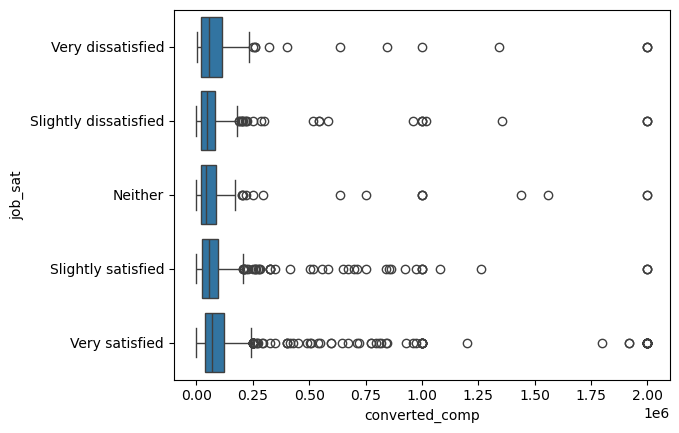

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x="converted_comp" , y="job_sat" , data=df_stck)

ANOVA (Analysis of Variance), bir veya daha fazla bağımsız değişkenin, bir bağımlı değişken üzerindeki etkilerini test etmek için kullanılan istatistiksel bir yöntemdir. ANOVA'nın amacı, gruplar arasındaki ortalamaların birbirinden anlamlı bir şekilde farklı olup olmadığını belirlemektir. Bu test, özellikle çoklu gruplar arasında karşılaştırmalar yapmak için kullanılır.

ANOVA Testi ve p-Değeri
ANOVA testinin temel amacı, bağımsız değişkenin gruplar arasındaki farklılıklara etkisini test etmektir. Bunun için testin sonucunda bir p-değeri elde edilir:

p-değeri: Hipotez testlerinde elde edilen bu değer, null hipotezinin doğru olduğu varsayımı altında gözlemlenen verinin ne kadar olasılıkla ortaya çıkabileceğini gösterir. Eğer p-değeri anlamlılık düzeyinden (α) küçükse, null hipotezi reddedilir.

Null Hipotezi (H₀): Gruplar arasında anlamlı bir fark yoktur (yani, grupların ortalamaları aynıdır).

Alternatif Hipotezi (H₁): Gruplar arasında anlamlı bir fark vardır (yani, grupların ortalamaları farklıdır).

Bir anlamlılık testi genellikle 0.05 (yüzde 5) veya 0.01 (yüzde 1) anlamlılık düzeyi ile yapılır. Eğer p-değeri < 0.05 ise, gruplar arasında anlamlı bir fark olduğu kabul edilir.

### Analysis of variance(ANOVA)  
ANOVA testleri gruplar arasında farklılık olup olmadığını belirler. Anlamlılık düzeyi 0.2 olarak belirlendi. Bu değer birçok durumda olduğundan daha büyüktür, ancak daha sonra farklı sayıdaki grupları karşılaştırmanın sonuçlarını anlamaya yardımcı olacaktır. Birden fazla gruptaki değerleri karşılaştırmak için pingouin anova yöntemi kullanılacak. Verileri stack_overflow , bağımlı değişken olan dv'yi converted_comp ve aralarında hesaplama yapılacak grup sütunu job_sat olarak belirlenir. p-değeri , p-unc sütununda saklanır, bu sütun , alfa değerinden yüzde 20 daha küçük olan 0.0013 noktasıdır. Bu, iş tatmini kategorilerinden en az ikisinin ücret düzeyleri arasında önemli farklılıklar olduğu anlamına gelir, ancak bu bize hangi iki kategori olduğunu söylemez.

In [8]:
import pingouin
pingouin.anova(data=df_stck , dv = "converted_comp" , between = "job_sat")


,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


#Bu test, "job_sat" (iş tatmini) gibi bağımsız bir değişkenin, "converted_comp" (ücret düzeyi) gibi bağımlı değişken üzerindeki etkilerini incelemeye yarar.
#Bu p-değeri, 0.2'lik anlamlılık düzeyinden çok küçüktür (0.2 > 0.001315). Yani, null hipotezi reddedilir. Null hipotezi, gruplar arasında fark olmadığı yönündeydi. Bu durumda, iş tatmini kategorileri arasında ücret düzeyinde anlamlı farklar olduğu sonucuna varıyoruz.

## Pairwise tests  
Hangi kategorilerin farklı olduğunu belirlemek için, beş iş memnuniyeti kategorisinin tamamını karşılaştırarak her bir çift sırayla test edilmelidir. Beş maddelik bir setten iki madde seçmenin on yolu vardır, dolayısıyla gerçekleştirilmesi gereken on test vardır. Anlamlılık düzeyi 0.2'dir.

In [11]:
import pingouin
pingouin.pairwise_tests(data=df_stck , dv="converted_comp" , between = "job_sat" , padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


1.Contrast: Very dissatisfied vs Slightly dissatisfied

p-unc = 0.259590: Bu p-değeri 0.2'den büyük olduğu için, bu iki grup arasındaki fark anlamlı değildir. Yani, "Çok memnuniyetsiz" ve "Biraz memnuniyetsiz" kategorileri arasında anlamlı bir fark yoktur.

2.Contrast: Very dissatisfied vs Neither

p-unc = 0.585481: Yine, p-değeri 0.2'den büyük olduğu için, "Çok memnuniyetsiz" ile "Ne memnun ne de memnuniyetsiz" kategorileri arasındaki fark anlamlı değildir.

3.Contrast: Very dissatisfied vs Slightly satisfied

p-unc = 0.215179: Bu p-değeri 0.2'den küçük olmadığı için, bu iki grup arasındaki fark anlamlı değildir.

4.Contrast: Very dissatisfied vs Very satisfied

p-unc = 0.455627: Bu p-değeri de 0.2'den büyük ve dolayısıyla bu iki grup arasındaki fark anlamlı değildir.

5.Contrast: Slightly dissatisfied vs Neither

p-unc = 0.547406: "Biraz memnuniyetsiz" ile "Ne memnun ne de memnuniyetsiz" arasındaki fark anlamlı değildir (p > 0.2).

6.Contrast: Slightly dissatisfied vs Slightly satisfied

p-unc = 0.969491: Burada p-değeri çok büyük, dolayısıyla fark anlamlı değildir.

7.Contrast: Slightly dissatisfied vs Very satisfied

p-unc = 0.002166: Bu p-değeri 0.2'den küçük olduğu için, "Biraz memnuniyetsiz" ile "Çok memnun" arasında anlamlı bir fark vardır.

8.Contrast: Neither vs Slightly satisfied

p-unc = 0.484088: Bu p-değeri 0.2'den büyük olduğu için, bu iki grup arasındaki fark anlamlı değildir.

9.Contrast: Neither vs Very satisfied

p-unc = 0.097286: Bu p-değeri 0.2'den küçük olduğu için, "Ne memnun ne de memnuniyetsiz" ile "Çok memnun" arasında anlamlı bir fark vardır.

10.Contrast: Slightly satisfied vs Very satisfied

p-unc = 0.000064: Bu p-değeri çok küçük (0.2'den çok daha küçük) olduğu için, "Biraz memnun" ile "Çok memnun" arasında anlamlı bir fark vardır.

Genel Sonuç ve Yorum:
Anlamlılık Düzeyi (α) = 0.2 olduğu için, p-değeri 0.2'den küçük olan her fark anlamlı kabul edilir.
Anlamlı Farklar:
"Biraz memnuniyetsiz" ile "Çok memnun" arasında (p = 0.002166).
"Ne memnun ne de memnuniyetsiz" ile "Çok memnun" arasında (p = 0.097286).
"Biraz memnun" ile "Çok memnun" arasında (p = 0.000064).
Diğer tüm karşılaştırmaların p-değerleri 0.2'den büyük olduğu için anlamlı fark yoktur.
Bu testin amacı, iş tatmini seviyeleri arasında ücret düzeyleri bakımından hangi kategorilerin birbirinden anlamlı şekilde farklı olduğunu belirlemektir. Bu sonuçlar, özellikle iş tatmini seviyelerinin "Çok memnun" kategorisi ile diğer kategorilere göre ücret düzeyi farklarının anlamlı olduğunu göstermektedir.

Çoklu karşılaştırmalar yapıldığında, her bir testin p-değeri %5 anlamlılık düzeyiyle değerlendirilirse, bu testlerin toplamda yanlış pozitif sonuçlar verme olasılığı artar.
Bonferroni düzeltmesi, çoklu karşılaştırmalar yaparken bu olasılığı azaltmak için p-değerlerini daha katı bir şekilde ayarlar.
Testin sonunda p-corr (düzeltilmiş p-değeri) kullanılarak, hangi farkların gerçekten anlamlı olduğunu belirleriz.


### Bonferroni correction  
Bunun çözümü, p-değerlerini arttırmak için bir ayarlama uygulamak ve yanlış pozitif alma şansını azaltmaktır. Yaygın bir ayarlama Bonferroni düzeltmesidir. Düzeltilmemiş p-unc sütununun aksine, düzeltilmiş p-değerlerine karşılık gelen p-corr sütununa bakıldığında, çiftlerden yalnızca ikisinin önemli farklılıklara sahip olduğu görülmektedir.

Bonferroni düzeltmesi, birden fazla karşılaştırma yapılırken, yanlış pozitif sonuçları azaltmak amacıyla p-değerlerini düzeltmek için kullanılan yaygın bir yöntemdir. Bonferroni düzeltmesi, yapılan test sayısına göre p-değerini küçültür, böylece daha güvenilir bir sonuç elde edilir.

In [9]:
pingouin.pairwise_tests(data=df_stck , dv="converted_comp" , between = "job_sat" , padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


Contrast: Very dissatisfied vs Slightly dissatisfied

p-unc = 0.259590: Bu p-değeri 0.2'den büyük olduğu için, bu iki kategori arasında anlamlı bir fark bulunmamaktadır.
p-corr = 1.000000: Bonferroni düzeltmesi ile bu p-değeri 1.0000 olarak düzeltilmiştir, ki bu da hala anlamlı bir fark olmadığı anlamına gelir.
Contrast: Very dissatisfied vs Neither

p-unc = 0.585481: Bu p-değeri de 0.2'den büyük olduğu için, "Çok memnuniyetsiz" ile "Ne memnun ne de memnuniyetsiz" arasındaki fark anlamlı değildir.
p-corr = 1.000000: Yine, düzeltilmiş p-değeri anlamlı fark olmadığını gösteriyor.
Contrast: Very dissatisfied vs Slightly satisfied

p-unc = 0.215179: Bu p-değeri de 0.2'den büyük, yani bu iki kategori arasında anlamlı bir fark yoktur.
p-corr = 1.000000: Bonferroni düzeltmesi, p-değerini 1.0000'a çıkarmış, bu da anlamlı bir fark olmadığını teyit eder.
Contrast: Very dissatisfied vs Very satisfied

p-unc = 0.455627: Bu p-değeri 0.2'den büyük olduğu için, bu iki grup arasındaki fark anlamlı değildir.
p-corr = 1.000000: Bonferroni düzeltmesi sonucu, p-değeri hala anlamlı fark olmadığını göstermektedir.
Contrast: Slightly dissatisfied vs Very satisfied

p-unc = 0.002166: Bu p-değeri 0.2'den küçük olduğu için, "Biraz memnuniyetsiz" ile "Çok memnun" arasında anlamlı bir fark vardır.
p-corr = 0.021659: Bonferroni düzeltmesi sonrası bu fark hâlâ anlamlıdır, çünkü düzeltme sonrası p-değeri hala 0.05'ten küçüktür.
Contrast: Slightly satisfied vs Very satisfied

p-unc = 0.000064: Bu p-değeri çok küçük (0.000064), yani bu iki grup arasındaki fark çok anlamlıdır.
p-corr = 0.000063: Bonferroni düzeltmesi sonrası da bu fark hala çok anlamlıdır, çünkü p-değeri 0.05'ten çok küçük.

1. ANOVA (Analysis of Variance)
Amacı: Birden fazla grup arasındaki genel farkı test etmek için kullanılır. Örneğin, iş tatmini (job satisfaction) seviyeleri arasındaki farkların ücret düzeyi (converted_comp) üzerindeki etkisini inceler.
Çalışma Şekli: Gruplar arasındaki genel farkı ölçer. Sonuçta, gruplar arasında fark olup olmadığını anlamaya çalışır. Ancak hangi grupların birbirinden farklı olduğunu göstermez.
Sonuç: ANOVA testi, gruplar arasındaki farkların istatistiksel olarak anlamlı olup olmadığını belirler. Eğer p-değeri belirli bir anlamlılık seviyesinden küçükse (genellikle 0.05), null hipotezi reddedilir ve gruplar arasında anlamlı farklar olduğu kabul edilir.
Özet: ANOVA, genel anlamda gruplar arasında fark olup olmadığını belirler, ancak hangi grupların birbirinden farklı olduğuna dair bilgi vermez.

3. Pairwise Testler (İkili Karşılaştırmalar)
Amacı: ANOVA ile tespit edilen genel farkın nedenini bulmak için, gruplar arasındaki ikili farkları test eder. Yani, hangi iki grup arasında fark olduğunu belirlemek için kullanılır.
Çalışma Şekli: ANOVA'dan sonra yapılır ve her ikili karşılaştırma için bir p-değeri hesaplanır. Bu testler, gruplar arasında hangi spesifik farkların olduğunu gösterir.
Sonuç: P-değeri hesaplanır ve bu değeri 0.2'lik anlamlılık düzeyine göre değerlendirilir. Eğer p-değeri 0.2'den küçükse, gruplar arasında anlamlı bir fark vardır. Bu testlerde, tüm ikili karşılaştırmaların sonucu dikkate alınarak, hangi grupların anlamlı farklar gösterdiği belirlenir.
Özet: Pairwise testler, ANOVA'dan sonra yapılır ve hangi iki grup arasında anlamlı farklar olduğunu belirler.

4. Bonferroni Düzeltmesi
Amacı: Yanlış pozitif sonuçları engellemek için yapılan bir düzeltmedir. Özellikle çoklu karşılaştırma yapıldığında, p-değerlerinin yanlış pozitif sonuçlar vermesi olasılığı artar. Bonferroni düzeltmesi, bu durumu engellemek için p-değerlerini daha katı hale getirir.
Çalışma Şekli: Eğer 10 test yapılıyorsa, her bir test için p-değeri 0.05'ten küçük olduğunda anlamlı kabul edilir. Ancak Bonferroni düzeltmesi ile her p-değerini 0.05/test sayısı ile bölerek, yanlış pozitifleri engellemeye çalışır.
Sonuç: Bonferroni düzeltmesi ile p-değerleri daha katı hale getirilir. Bu düzeltme, çoklu karşılaştırmalarda yanlış pozitif hataların önlenmesine yardımcı olur.
Özet: Bonferroni düzeltmesi, çoklu karşılaştırmalar yapıldığında yanlış pozitif sonuçları engellemek için kullanılır ve p-değerlerini katılaştırarak güvenilir sonuçlar sağlar.

**One-sample proportion tests** (tek örneklem oranı testleri), belirli bir popülasyon oranının **beklenen bir değere** eşit olup olmadığını test etmek için kullanılan istatistiksel bir yöntemdir. Bu test, örneklemdeki oranı kullanarak, popülasyon oranının belirli bir değere sahip olup olmadığını anlamaya çalışır.

### **One-Sample Proportion Testi**
Bu testin temel amacı, örneklemdeki oranın **popülasyon oranıyla** karşılaştırılmasıdır. Örneğin, bir şirketin çalışanlarının %70'inin memnun olduğunu biliyoruz (popülasyon oranı). Ancak yeni bir örneklem alıp, bu örneklemdeki oranı %70 ile karşılaştırmak istiyoruz.

- **Null Hipotez (H₀)**: Popülasyon oranı belirli bir değere eşittir (örneğin, %70).
- **Alternatif Hipotez (H₁)**: Popülasyon oranı belirli bir değere eşit değildir.

### **Test İstatistiği ve z-Skoru**
Bu testte genellikle **z-skoru** kullanılır. **Z-skoru**, örneklem oranı ile popülasyon oranı arasındaki farkı, örneklem oranının standart hatasıyla karşılaştırarak hesaplanır. Bu z-skoru, **test istatistiği** olarak kullanılır.

Z-skoru şu şekilde hesaplanır:
$$
z = \frac{\hat{p} - p_0}{\text{SE}}
$$
- \(\hat{p}\): Örneklemdeki oran
- \(p_0\): Popülasyondaki beklenen oran (null hipotezdeki oran)
- **SE** (Standart Hata): Örneklem oranının standart hatası

Standart hata (SE), örneklem büyüklüğüne ve popülasyon oranına bağlı olarak hesaplanır:
$$
SE = \sqrt{\frac{p_0(1 - p_0)}{n}}
$$
- \(p_0\): Popülasyon oranı (null hipotezdeki oran)
- \(n\): Örneklem büyüklüğü

### **P-değeri ve Karar Verme**
Z-skoru elde edildikten sonra, bu değeri kullanarak **p-değeri** hesaplanır. P-değeri, null hipotezinin doğru olduğu varsayımı altında gözlemlenen z-skoruna eşit veya daha aşırı bir değer elde etme olasılığını ifade eder.

- **P-değeri**: Eğer p-değeri, belirli bir anlamlılık seviyesinden (örneğin, 0.05) küçükse, **null hipotezini reddederiz** ve popülasyon oranının beklenen değere eşit olmadığı sonucuna varırız.

### **Bootstrap Yöntemi**
- **Bootstrap**, örneklemler üzerinde tekrar tekrar hesaplama yaparak, örneklem istatistiklerinin dağılımını tahmin etmeye yönelik bir yöntemdir. Bu yöntem, özellikle küçük örneklemler için faydalıdır.
- Ancak, bootstrap hesaplamaları **hesaplama açısından yoğun** olabilir ve **z-skoru** gibi daha basit bir yöntemle bu tür testler yapılabilir. Bu durumda **bootstrap yerine doğrudan z-skoru hesaplanır**.

### **Özetle:**
1. **One-sample proportion test**: Tek bir örneklemdeki oranı, popülasyon oranı ile karşılaştırmak için kullanılır.
2. **Z-skoru** hesaplanarak test istatistiği bulunur.
3. Z-skoru ile **p-değeri** hesaplanır ve null hipotezi reddedilip reddedilmeyeceğine karar verilir.
4. **Bootstrap** yöntemi kullanılabilir, ancak hesaplama yoğunluğundan kaçınılmak için bazen **doğrudan z-skoru hesaplanır**.

Eğer bootstrap kullanılmazsa, daha basit bir hesaplama yapılır ve **z-skoru ve p-değeri** doğrudan hesaplanır.


### Stack Overflow age categories  
#Stackoverflow veri setindeki popülasyondaki kullanıcıların yarısının otuz yaşın altında olduğunu varsayalım ve bir fark olup olmadığını kontrol edelim. Anlamlılık düzeyini 0.01 olarak belirleyelim. Örneklemde , kullanıcıların yarısından biraz fazlası otuz yaşın altındadır.  
H0 = 0.5  
Ha != 0.5

In [11]:
alpha = 0.01
df_stck["age_cat"].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [17]:
# z için değişkenler
p_hat = (df_stck["age_cat"] == "Under 30").mean()
p_hat

0.5356037151702786

In [19]:
p_0 = 0.5

In [21]:
n = len(df_stck)

In [23]:
import numpy as np
pay= p_hat - p_0
payda= np.sqrt(p_0 * (1-p_0)/n)
z_score = pay/payda
z_score

3.385911440783663

### Calculating the p-value  
Sol kuyruklu alternatif hipotezler için norm.cdf kullanarak z-skoru p-değerine dönüştürülür. Sağ kuyruklu alternatif hipotezler için norm.cdf sonucu birden çıkarılır. İki kuyruklu alternatif hipotezler için, test istatistiğinin her iki kuyrukta da yer alıp almadığı kontrol edilir, dolayısıyla p-değeri bu iki değerin toplamıdır: biri z-skoruna, diğeri de dağılımın diğer tarafındaki negatifine karşılık gelir. Normal dağılım PDF'si simetrik olduğundan, z-skoru pozitif olduğu için bu , sağ kuyruklu p-değerinin iki katı olarak basitleştirilir. Burada , p-değeri sıfır-bir noktasının anlamlılık düzeyinden küçüktür, bu nedenle sıfır hipotezini reddererek otuz yaşın altındaki kullanıcıların oranının beş noktasına eşit olmadığı sonucuna varılır.

In [33]:
from scipy.stats import norm
#sol kuyruk
p_value = norm.cdf(z_score)
p_value

0.999645288631595

In [35]:
#sağ kuyruk
p_value = 1- norm.cdf(z_score)
p_value

0.00035471136840503625

In [37]:
#iki kuyruk
p_value= norm.cdf(-z_score) + 1-norm.cdf(z_score)
p_value

0.0007094227368100725

In [39]:
p_value = 2* (1-norm.cdf(z_score))
p_value

0.0007094227368100725

In [41]:
p_value<alpha

True

Eğer p-değeri anlamlılık seviyesinden küçükse, null hipotez reddedilir. !!!!!

# Two-sample proportion test  
ortalamalarda oldugu gibi iki popülasyondaki oranlar arasındaki farklar da test edilebilir.

İki Örneklem Oranı Testi (Two-Sample Proportion Test)
İki örneklem oranı testi, iki farklı popülasyondan alınan örneklemlerdeki oranların birbirinden anlamlı derecede farklı olup olmadığını test etmek için kullanılır. Bu tür testler genellikle hipotez testi şeklinde yapılır.

### Comparing two proportions  
Stack Overflow anketi bir hobbyist değişkeni içermektedir. "Evet" değeri kullanıcının kendisini hobici olarak tanımladığı, "Hayır" değeri ise kendisini profesyonel olarak tanımladığı anlamına gelmektedir. Hobi sahibi kullanıcıların oranının otuz yaş altı kategorisi ile otuz yaş ve üstü kategorisi için aynı olduğu varsayılabilir, bu da iki kuyruklu bir testtir. Daha açık bir ifadeyle , boş hipotez her bir grup için popülasyon parametreleri arasındaki farkın sıfır olduğudur. Anlamlılık düzeyini 0.05 olarak belirleyelim.  
H0 : p>=30 - p<30 =0  
Ha : ? p>=30- p<30=! 0

**Two-sample proportion test** (iki örneklem oranı testi), iki popülasyondaki oranlar arasındaki farkı test etmek için kullanılan istatistiksel bir yöntemdir. Bu test, örneklem oranlarının karşılaştırılması ile popülasyonlar arasındaki oran farklarını değerlendirir.

### **İki Oran Arasındaki Farkı Karşılaştırma**
Örneğin, Stack Overflow anketinde "hobbyist" değişkeni bulunmaktadır. "Evet" değeri, kullanıcının kendisini hobi olarak tanımladığı, "Hayır" değeri ise kendisini profesyonel olarak tanımladığı anlamına gelmektedir. Hobi sahibi kullanıcıların oranının **otuz yaş altı** kategorisi ile **otuz yaş ve üstü** kategorisinde aynı olduğu varsayılmaktadır, bu da **iki kuyruklu bir test** gerektirir. 

Boş hipotez, her iki grup için popülasyon parametreleri arasındaki farkın sıfır olduğudur. Anlamlılık düzeyini **0.05** olarak belirleyelim.

- **Null Hipotez (H₀)**: 
$$ 
p_{\geq 30} - p_{\text{altı 30}} = 0 
$$
- **Alternatif Hipotez (H₁)**: 
$$ 
p_{\geq 30} - p_{\text{altı 30}} \neq 0 
$$

Bu bir **iki kuyruklu test** olduğu için, hem pozitif hem de negatif uçlardaki farklar dikkate alınır.

### **Test İstatistiği ve Z-Skoru**
Z-skoru şu şekilde hesaplanır:
$$
z = \frac{p_{\geq 30} - p_{\text{altı 30}}}{\text{SE}}
$$
- \( p_{\geq 30} \): Otuz yaş ve üstü kullanıcıların hobi sahibi olma oranı.
- \( p_{\text{altı 30}} \): Otuz yaş altı kullanıcıların hobi sahibi olma oranı.
- **SE** (Standart Hata): İki oran arasındaki farkın standart hatasıdır.

Standart hata (SE) şu şekilde hesaplanır:
$$
SE = \sqrt{\frac{p_{\geq 30}(1 - p_{\geq 30})}{n_{\geq 30}} + \frac{p_{\text{altı 30}}(1 - p_{\text{altı 30}})}{n_{\text{altı 30}}}}
$$
- \( p_{\geq 30} \): Otuz yaş ve üstü oranı.
- \( p_{\text{altı 30}} \): Otuz yaş altı oranı.
- \( n_{\geq 30} \): Otuz yaş ve üstü kullanıcı sayısı.
- \( n_{\text{altı 30}} \): Otuz yaş altı kullanıcı sayısı.

### **P-değeri Hesaplama**
Z-skoru elde edildikten sonra, bu değeri kullanarak **p-değeri** hesaplanır. P-değeri, **null hipotezinin** doğru olduğu varsayımı altında gözlemlenen z-skoruna eşit veya daha aşırı bir değerin elde edilme olasılığını ifade eder.

- **P-değeri**:
  Eğer p-değeri, belirli bir anlamlılık seviyesinden (örneğin, 0.05) küçükse, **null hipotezini reddederiz** ve popülasyon oranının beklenen değere eşit olmadığı sonucuna varırız.

### **Sonuç ve Karar Verme**
Z-skoru ve p-değeri hesaplandıktan sonra, elde edilen p-değeri anlamlılık seviyesi ile karşılaştırılır. Eğer p-değeri **0.05**'ten küçükse, **null hipotezi reddedilir** ve iki grup arasındaki oran farklarının anlamlı olduğu kabul edilir. Eğer p-değeri **0.05** veya daha büyükse, **null hipotezi reddedilmez** ve iki grup arasındaki oran farklarının anlamlı olmadığı kabul edilir.


In [51]:
alpha= 0.05

In [53]:
p_hat = df_stck.groupby("age_cat")["hobbyist"].value_counts(normalize=True)
p_hat

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64

In [55]:
n = df_stck.groupby("age_cat")["hobbyist"].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [57]:
p_hat_at_least_30 = p_hat[('At least 30', 'Yes')]
p_hat_at_under_30 = p_hat[('Under 30', 'Yes')]

(p_hat_at_least_30, p_hat_at_under_30)

(0.7733333333333333, 0.8431048720066061)

In [59]:
n_at_least_30 = n['At least 30']
n_at_under_30 = n['Under 30']
(n_at_least_30, n_at_under_30)

(1050, 1211)

In [61]:
import numpy as np
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_at_under_30 * p_hat_at_under_30) / (n_at_least_30 + n_at_under_30)

std_error = np.sqrt(p_hat * (1 - p_hat) / n_at_least_30 +
                    p_hat * (1 - p_hat) / n_at_under_30)

z_score = (p_hat_at_least_30 - p_hat_at_under_30) / std_error

z_score

-4.223691463320559

In [63]:
n_hobbyist = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest

z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, 
                                     alternative='two-sided')

(z_score, p_value)

# h0 red 

(-4.223691463320559, 2.4033301426850675e-05)

Tabii, verdiğiniz ekrandaki **Python kodunu** adım adım açıklayayım. Bu kod, iki popülasyon oranı arasındaki farkı test etmek amacıyla bir **iki örneklem oranı testi (two-sample proportion test)** yapmaktadır. Şimdi her satırda ne yapıldığını görelim:

---

### **1. Anlamlılık Düzeyi Belirleniyor**
```python
alpha = 0.05
```
Bu satırda, **alpha (α)** değeri belirleniyor. Bu, **anlamlılık düzeyi** olarak bilinir ve genellikle **%5 (0.05)** olarak alınır. Bu durumda, testin **%5 hata payı** ile yapılacağı belirtiliyor. Eğer **p-değeri** 0.05'ten küçükse, null hipotezini reddederiz.

---

### **2. Hobi Sahibi Kullanıcı Oranları Hesaplanıyor**
```python
p_hat = df_stck.groupby("age_cat")["hobbyist"].value_counts(normalize=True)
```
Bu satırda, **`df_stck`** adlı veri çerçevesinde, **"age_cat"** (yaş kategorisi) ve **"hobbyist"** (hobi sahibi) sütunlarına göre oranlar hesaplanıyor:
- **`groupby("age_cat")`**: Yaş kategorilerine göre gruplama yapılıyor.
- **`["hobbyist"]`**: Hobi sahibi olan kullanıcılar dikkate alınıyor.
- **`value_counts(normalize=True)`**: Her grup için **hobi sahibi olma oranlarını** normalize ederek hesaplıyor. Yani, her yaş kategorisinde hobi sahibi olma oranını elde ediyoruz.

---

### **3. Hobi Sahibi Kullanıcıların Oranı**
```python
p_hat_at_least_30 = p_hat["At least 30"]["Yes"]
p_hat_at_under_30 = p_hat["Under 30"]["Yes"]
```
Bu satırlarda:
- **`p_hat_at_least_30`**: 30 yaş ve üstü kullanıcıların **hobi sahibi olma oranı** hesaplanıyor.
- **`p_hat_at_under_30`**: 30 yaş altı kullanıcıların **hobi sahibi olma oranı** hesaplanıyor.
- **`"At least 30"`** ve **`"Under 30"`** gruplarındaki **"Yes"** (hobi sahibi olma) oranları alınır.

---

### **4. Örneklem Sayıları Hesaplanıyor**
```python
n_at_least_30 = n["At least 30"]
n_at_under_30 = n["Under 30"]
```
Burada, yaş gruplarına göre kullanıcı sayıları hesaplanıyor:
- **`n_at_least_30`**: 30 yaş ve üstü kullanıcı sayısı.
- **`n_at_under_30`**: 30 yaş altı kullanıcı sayısı.
Bu, daha önceki satırda gruplama ile elde edilen veri çerçevesinden alınır.

---

### **5. Standart Hata Hesaplama**
```python
import numpy as np
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_at_under_30 * p_hat_at_under_30) / (n_at_least_30 + n_at_under_30)
std_error = np.sqrt(p_hat * (1 - p_hat) * (1 / n_at_least_30 + 1 / n_at_under_30))
```
Burada:
- **`p_hat`**: İki grubun birleşik oranı hesaplanıyor.
- **`std_error`**: Bu, oranlar arasındaki farkın standart hatasını hesaplamak için kullanılan formüldür. Standart hata, popülasyon oranlarının varyanslarının birleştirilmiş halini kullanarak hesaplanır.

Formül şu şekildedir:
$$
\text{SE} = \sqrt{\frac{p \cdot (1 - p)}{n_1} + \frac{p \cdot (1 - p)}{n_2}}
$$
Burada:
- \( p \) birleştirilmiş oran,
- \( n_1 \) ve \( n_2 \) sırasıyla her grubun örneklem büyüklüğüdür.

---

### **6. Z-skoru Hesaplama**
```python
z_score = (p_hat_at_least_30 - p_hat_at_under_30) / std_error
```
Burada, **z-skoru** hesaplanıyor. Z-skoru, iki oran arasındaki farkın **standart hata** ile bölünmesiyle bulunur. Bu, iki oran arasındaki farkın ne kadar anlamlı olduğunu ölçen bir test istatistiğidir. 

---

### **7. Z-değeri ve p-değeri Hesaplama**
```python
n_hobbyist = np.array([182, 1021])
n_rows = np.array([182 + 230, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, alternative='two-sided')
```
Bu satırlarda:
- **`n_hobbyist`**: Her yaş grubundaki **hobi sahibi kullanıcıların sayısı**.
- **`n_rows`**: Her yaş grubundaki **toplam kullanıcı sayısı**.
  
Sonrasında, **`proportions_ztest`** fonksiyonu ile **z-test** yapılır:
- **`count`**: Her gruptaki hobi sahibi kullanıcı sayıları.
- **`nobs`**: Her gruptaki toplam kullanıcı sayıları.
- **`alternative='two-sided'`**: İki kuyruklu test yapıldığı belirtiliyor.

Testin sonucu olarak, **z-skoru** ve **p-değeri** hesaplanır.

---

### **8. Hipotez Sonucu**
```python
# h0 red
```
Burada, **null hipotezinin reddedilip reddedilmeyeceği** değerlendirilir. Elde edilen **p-değeri** ile **α = 0.05** karşılaştırılır:
- Eğer **p-değeri** 0.05'ten küçükse, **null hipotezi reddedilir**.
- Bu durumda, hobi sahibi kullanıcı oranları ile yaş grubu arasında **anlamlı bir fark olduğu** sonucuna varılır.

---

### **Sonuç**
Bu kod, **iki yaş grubu arasındaki hobi sahibi kullanıcı oranları** arasındaki farkı test etmek için bir **iki örneklem oranı testi** uygular. Hesaplanan **z-skoru** ve **p-değeri**, null hipotezinin reddedilip reddedilmeyeceğine karar verir. Bu testin sonucunda, eğer p-değeri belirli bir anlamlılık seviyesinden küçükse, yaş gruplarındaki oranlar arasında anlamlı bir fark olduğu sonucuna varılır.

Bu satırları açıklayalım:

### **Kodun Amacı**
Bu satırlar, **iki örneklem oranı testi** (two-sample proportion test) yapmak için kullanılır. Testin amacı, iki farklı grup arasındaki **hobi sahibi olma oranlarının** farklarını test etmektir. Bu durumda, yaş gruplarındaki (otuz yaş altı ve otuz yaş üstü) hobi sahibi olma oranları karşılaştırılmaktadır.

### **Değişkenler:**

1. **`n_hobbyist = np.array([182, 1021])`**:
   - Burada, **hobi sahibi kullanıcıların sayıları** belirtiliyor:
     - **182**: Otuz yaş ve altındaki hobi sahibi kullanıcı sayısı.
     - **1021**: Otuz yaş ve üstündeki hobi sahibi kullanıcı sayısı.
   - Bu, her grup için "hobi sahibi olan" kullanıcı sayılarının bir array (dizi) olarak saklanmasıdır.

2. **`n_rows = np.array([182 + 230, 1021 + 190])`**:
   - Bu satırda, her grup için **toplam kullanıcı sayıları** hesaplanıyor:
     - **182 + 230 = 412**: Otuz yaş altındaki toplam kullanıcı sayısı (hobi sahibi + hobi sahibi olmayan).
     - **1021 + 190 = 1211**: Otuz yaş üstündeki toplam kullanıcı sayısı (hobi sahibi + hobi sahibi olmayan).
   - Bu array, her yaş grubundaki toplam kullanıcı sayısını içerir.

### **Proportions Z-Testi:**
```python
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, alternative='two-sided')
```

- **`proportions_ztest()`**: Bu fonksiyon, **iki popülasyon arasındaki oran farkını** test etmek için kullanılır. Test, bir **z-test**'idir ve iki grup arasındaki oran farkının **istatistiksel olarak anlamlı olup olmadığını** kontrol eder.
  
  Parametreler:
  - **`count=n_hobbyist`**: Bu, her grup için **hobi sahibi olan kullanıcıların sayısını** içerir. Burada, **[182, 1021]**.
  - **`nobs=n_rows`**: Bu, her grup için **toplam kullanıcı sayısını** içerir. Burada, **[412, 1211]**.
  - **`alternative='two-sided'`**: Bu, **iki kuyruklu test** yapıldığını belirtir. Yani, iki oran arasında herhangi bir fark olup olmadığı test edilir (hem pozitif hem de negatif farklar).

### **Sonuçlar:**
- **`z_score`**: **Z-skoru**, iki oran arasındaki farkın, örneklemdeki standart hata ile bölünmesi sonucu elde edilen değeri temsil eder. Bu, **test istatistiği** olarak kullanılır.
- **`p_value`**: **P-değeri**, **z-skoruna** dayalı olarak hesaplanan değeri ifade eder. P-değeri, null hipotezinin doğru olduğu varsayımı altında gözlemlenen değerin veya daha aşırı bir değerin elde edilme olasılığını gösterir.

### **Yorum ve Karar:**
- Eğer **p-değeri** 0.05'ten küçükse, **null hipotezi reddedilir** ve iki grup arasındaki oranların **anlamlı derecede farklı** olduğu kabul edilir.
- Eğer **p-değeri** 0.05 veya daha büyükse, **null hipotezi reddedilmez** ve oranlar arasında **anlamlı fark** olmadığı sonucuna varılır.

---

### **Özetle:**
Bu kod, **otuz yaş altı ve otuz yaş üstü kullanıcılar arasında hobi sahibi olma oranları farkını test etmek için iki örneklem oranı testi** uygular. **Z-skoru** ve **p-değeri** hesaplanarak, bu iki grubun oranları arasındaki farkın **istatistiksel olarak anlamlı olup olmadığına** karar verilir.

### Job satisfaction and age category  
Başka bir örnek deneyelim. Stack Overflow örnekleminin iki kategorili bir yaş kategorisi değişkenine ve beş kategorili bir iş memnuniyeti değişkenine sahip olduğunu hatırlayın.

In [70]:
df_stck["age_cat"].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [72]:
df_stck["job_sat"].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

### Hipotezlerin Beyan Edilmesi  
Bu değişkenlerin bağımsızlığını test etmek için hipotezler beyan edebiliriz. Burada yaş kategorisi yanıt değişkeni, iş tatmini ise açıklayıcı değişkendir: Boş hipotez, bağımsızlığın gerçekleştiğidir. 0.1'lik anlamlılık düzeyi kullanalım.Test istatistiği ki-kare(χ²) olarak gösterilir. Bağımsızlığın doğru olması durumunda gözlenen sonuçların beklenen değerlerden ne kadar uzak olduğunu ölçer.  
H0 : Yaş kategorileri iş tatmini düzeylerinden bağımsızdır.  
Ha : Yaş kategorileri iş tatmini düzeylerinden bağımsız değildir.

Bu açıklamaya göre, **ki-kare testi** (chi-square test) kullanarak, iki kategorik değişkenin birbirleriyle **bağımsız olup olmadığını** test etmek istiyoruz. Burada, **yaş kategorisi** ve **iş tatmini düzeyleri** gibi kategorik değişkenler arasında bir ilişki olup olmadığını test edeceğiz.

### **Hipotezlerin Beyanı:**

- **Boş Hipotez (H₀)**:  
  **Yaş kategorileri ile iş tatmini düzeyleri bağımsızdır.** Yani, yaş kategorileri ile iş tatmini düzeyleri arasında bir ilişki yoktur. Bu, yaş grubu ile iş tatmininin birbirinden etkilenmediğini ifade eder.

- **Alternatif Hipotez (H₁)**:  
  **Yaş kategorileri ile iş tatmini düzeyleri bağımsız değildir.** Yani, yaş kategorileri ile iş tatmini düzeyleri arasında bir ilişki vardır. Bu durumda, yaş grubundaki değişim, iş tatmini düzeyini etkileyebilir.

### **Bağımsızlık Testi: Ki-Kare Testi (χ² Testi)**

**Ki-kare testi**, iki kategorik değişkenin bağımsız olup olmadığını test etmek için kullanılır. Bu testin amacı, **gözlemlenen frekanslarla** beklenen frekanslar arasındaki farkı ölçmektir. Eğer gözlemlenen ve beklenen frekanslar arasında **büyük bir fark varsa**, bağımsızlık hipotezini reddederiz.

#### **Ki-Kare Testinin Temel Adımları:**

1. **Gözlemlenen frekansları** (veri setindeki gerçek değerler) belirleriz.
2. **Beklenen frekansları** hesaplarız. Bu, her kategori için, **bağımsızlık varsayımı** altında beklenen değerleri gösterir.
3. **Ki-kare istatistiğini** hesaplarız:
  $$ \[
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   \]
   $$
   - **O_i**: Gözlemlenen frekans (gerçek değerler).
   - **E_i**: Beklenen frekans (bağımsızlık hipotezi altında hesaplanan değerler).

5. **P-değeri** hesaplanarak, **ki-kare dağılımı** üzerinden sonuca varılır.
   - Eğer **p-değeri** belirlenen anlamlılık seviyesinden (örneğin, **0.1**) küçükse, **null hipotezi reddedilir**. Bu durumda, **yaş kategorileri ile iş tatmini düzeyleri arasında anlamlı bir ilişki vardır**.

#### **Örnek:**

**H0**: Yaş kategorileri ile iş tatmini düzeyleri bağımsızdır.

**Ha**: Yaş kategorileri ile iş tatmini düzeyleri bağımsız değildir.

- Eğer **p-değeri** 0.1'den küçükse, **null hipotezi reddedilir** ve **yaş kategorileri ile iş tatmini düzeyleri arasında bir ilişki** olduğu sonucuna varılır.
- Eğer **p-değeri** 0.1'den büyükse, **null hipotezi kabul edilir** ve **yaş kategorileri ile iş tatmini düzeyleri arasında bağımsızlık olduğu** sonucuna varılır.

### **Özetle:**
- **Boş Hipotez (H₀)**: Yaş kategorileri ile iş tatmini düzeyleri bağımsızdır.
- **Alternatif Hipotez (H₁)**: Yaş kategorileri ile iş tatmini düzeyleri bağımsız değildir.
- **Ki-kare testi** kullanarak bu hipotezleri test ederiz ve **p-değeri** ile bağımsızlık olup olmadığına karar veririz.

### **Hipotezlerin Beyanı**

Bu değişkenlerin bağımsızlığını test etmek için hipotezler beyan edebiliriz. Burada **yaş kategorisi** yanıt değişkeni, **iş tatmini** ise açıklayıcı değişkendir. Boş hipotez, **bağımsızlığın** gerçekleştiğidir. Anlamlılık düzeyini **0.1** olarak kullanalım.

- **Null Hipotez (H₀)**:  
  **Yaş kategorileri ile iş tatmini düzeyleri bağımsızdır.**  
  Yani, yaş kategorileri ile iş tatmini düzeyleri arasında bir ilişki yoktur.
  
  $$ H_0: p_{\text{yaş kategorisi}} - p_{\text{iș tatmini}} = 0 $$

- **Alternatif Hipotez (H₁)**:  
  **Yaş kategorileri ile iş tatmini düzeyleri bağımsız değildir.**  
  Yani, yaş kategorileri ile iş tatmini düzeyleri arasında bir ilişki vardır.
  
  $$ H_1: p_{\text{yaş kategorisi}} - p_{\text{iș tatmini}} \neq 0 $$

### **Ki-Kare Testi (χ² Testi)**

**Ki-kare testi**, iki kategorik değişkenin bağımsız olup olmadığını test etmek için kullanılan bir istatistiksel testtir. Bu test, gözlemlenen frekanslar ile beklenen frekanslar arasındaki farkı ölçer.

#### **Ki-Kare Testinin Temel Adımları:**

1. **Gözlemlenen frekansları** belirleriz (veri setindeki gerçek değerler).
2. **Beklenen frekansları** hesaplarız. Bağımsızlık hipotezini varsayarak her kategori için beklenen değerleri hesaplarız.
3. **Ki-Kare İstatistiği** şu şekilde hesaplanır:
   $$
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   $$
   - **Oₖ**: Gözlemlenen frekans (gerçek değerler).
   - **Eₖ**: Beklenen frekans (bağımsızlık hipotezi altında hesaplanan değerler).
   
4. **P-değeri** hesaplanarak, **ki-kare dağılımı** üzerinden sonuca varılır. Eğer **p-değeri** belirlenen anlamlılık seviyesinden (örneğin **0.1**) küçükse, **null hipotezini reddederiz**.

### **Sonuç ve Karar Verme**

- **p-değeri** eğer **0.1'den küçükse**, **null hipotezini reddederiz** ve yaş kategorileri ile iş tatmini düzeyleri arasında bir ilişki olduğunu kabul ederiz.
- Eğer **p-değeri** 0.1'den büyükse, **null hipotezini reddetmeyiz** ve yaş kategorileri ile iş tatmini düzeyleri arasında bağımsızlık olduğu sonucuna varırız.


### Exploratory visualization : proportional stacked bar plot( Keşifsel görselleştirme : orantılı yığılmış çubuk grafiği)  
Orantılı yığılmış çubuk grafiği kullanarak verileri inceleyelim. Her yaş grubundaki oranlar hesaplanarak başlanır. Ardından , bu tabloyu geniş biçime dönüştürmek için unstack yöntemi kullanılır. Çizim yöntemini kullanıp kind bar ve stacked True olarak ayarlandığında orantılı yığınlanmış bir çubuk çizimi elde edilir.

In [86]:
props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

/var/folders/zf/gnk755n14rj48wl97n0lv_0w0000gn/T/ipykernel_8951/384739958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)


job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [88]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


unstack(): unstack() fonksiyonu, pandas serisini geniş bir formatta (yani DataFrame formatında) yeniden düzenler. Bu, age_cat değerlerinin iş tatmini kategorilerine göre sütunlara dönüştürülmesini sağlar. Bu işlem, Seri'yi DataFrame'e dönüştürür.
wide_props:

Bu değişken, yaş kategorileri için her iş tatmini kategorisinde bulunan oranları görsel olarak düzenlenmiş bir tablo olarak içerir.

<Axes: xlabel='job_sat'>

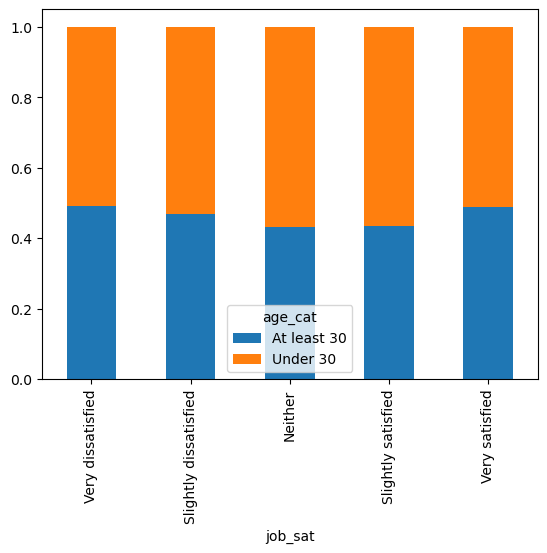

In [91]:
wide_props.plot(kind='bar', stacked=True)

In [93]:
expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='job_sat', 
                                                       y='age_cat')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


### **Bağımsızlık Testi - Ki-Kare Testi**

Bu fonksiyon, iki kategorik değişken arasındaki **bağımsızlık ilişkisini** test etmek için **ki-kare testi** (chi-square test) yapar. Burada, **x** ve **y** parametreleri sırasıyla **iş tatmini (job_sat)** ve **yaş kategorisi (age_cat)** sütunlarını belirtmektedir.

### **Bağımsızlık Testinin Temel Adımları:**

1. **Null Hipotez (H₀)**:  
   İki değişken (iş tatmini ve yaş kategorisi) arasında **bağımsızlık** vardır; yani, bir değişkenin değerinin diğerini etkilemediğini kabul ederiz.

2. **Alternatif Hipotez (H₁)**:  
   İki değişken arasında **bağımsızlık yoktur**; yani, bir değişkenin değeri, diğerini etkiler.

Bu test, **ki-kare istatistiği** kullanarak, gözlemlenen veriler ile beklenen veriler arasındaki farkı ölçer. Eğer fark büyükse, **null hipotezini reddederiz**.

---

### **Fonksiyonun Çıktısı:**

Fonksiyon 3 çıktıyı döndürür:
1. **expected**: **Beklenen frekanslar**. Bu, **bağımsızlık hipotezi** altında, her kategori kombinasyonu için beklenen frekansların bir tablosudur.
2. **observed**: **Gözlemlenen frekanslar**. Bu, **gerçek verilerdeki** her kategori kombinasyonu için gözlemlenen frekansların bir tablosudur.
3. **stats**: **Ki-kare testinin sonuçlarını** içeren istatistiksel bir sonuç.

---

### **`stats` İçeriği:**

**`stats`** değişkeni genellikle aşağıdaki **istatistiksel sonuçları** içerir:

1. **chi2**: **Ki-kare istatistiği (χ²)** değeri, gözlemlenen ve beklenen frekanslar arasındaki farkın **standardize edilmiş** bir ölçüsüdür. Bu değerin büyüklüğü, **bağımsızlık hipotezinin ne kadar reddedileceği** hakkında bilgi verir.
   - **Büyük χ² değeri**: İki değişkenin **bağımsız olmadığını** gösterir.
   - **Küçük χ² değeri**: İki değişkenin **bağımsız olduğunu** gösterir.

2. **p-unc**: **P-değeri**, ki-kare istatistiğinin doğruluğunu test eder. Eğer **p-değeri** anlamlılık seviyesinden küçükse (örneğin, **0.05** gibi), **null hipotezini reddederiz**.
   - Eğer **p-değeri** küçükse (örneğin 0.01), bu, **bağımsızlık hipotezini reddetmemiz gerektiği** anlamına gelir ve değişkenler arasında **anlamlı bir ilişki** olduğunu kabul ederiz.

3. **dof**: **Serbestlik derecesi (degrees of freedom)**, ki-kare testinin hesaplanmasında kullanılan bir değerdir. Bu değer, veri setindeki **kategorilerin sayısına** ve **kategori kombinasyonlarına** bağlıdır.
   - **Serbestlik derecesi** genellikle şu şekilde hesaplanır:
     $$
     \text{df} = (r - 1) \times (c - 1)
     $$
     Burada:
     - **r**: Satır sayısı (kategorilerin sayısı),
     - **c**: Sütun sayısını ifade eder.

4. **cramer**: **Cramér's V** testi, ki-kare testi ile birlikte kullanılan bir **etki büyüklüğü ölçütü** olarak çıkabilir. Bu, **bağımsızlık durumunun gücünü** değerlendirir.


Bu tablo, **pingouin** kütüphanesinin **`chi2_independence()`** fonksiyonunun sonucudur. Fonksiyon, **ki-kare testi** (chi-square test) kullanarak, **iş tatmini (job_sat)** ve **yaş kategorisi (age_cat)** arasındaki bağımsızlığı test etmektedir. Tabloyu adım adım inceleyelim:

### **Tablonun İçeriği**:
- **test**: Kullanılan test türü. Burada, **pearson**, **cressie-read**, **log-likelihood**, **freeman-tukey**, **mod-log-likelihood**, ve **neyman** gibi farklı ki-kare testleri uygulanmış. Bu testlerin her biri, farklı yöntemler kullanarak **bağımsızlık testi** yapmaktadır.
  
- **lambda**: **Lambda** değeri, testin parametrelerinden biridir. Burada her bir test için **lambda** değeri belirtilmiş, bazıları sıfır, bazıları ise farklı küçük değerler alıyor.

- **chi2**: **Ki-kare istatistiği (χ²)** değeri, gözlemlenen ve beklenen frekanslar arasındaki farkın **standardize edilmiş** bir ölçüsüdür. Bu değerin büyüklüğü, bağımsızlık hipotezinin ne kadar reddedileceği hakkında bilgi verir. Her test için **ki-kare değeri** hesaplanmış.
  
- **dof**: **Serbestlik derecesi (degrees of freedom)**, testin hesaplanmasında kullanılan bir değerdir. Burada her bir test için **4** serbestlik derecesi verilmiş. Bu, testin her kategorinin kombinasyonlarına göre hesaplanan serbestlik derecesini ifade eder.

- **pval**: **P-değeri**, testin anlamlılık düzeyini gösterir. **P-değeri**, null hipotezinin doğru olduğu varsayımı altında gözlemlenen z-skoruna eşit veya daha aşırı bir değerin elde edilme olasılığını gösterir. Eğer p-değeri 0.05'ten küçükse, **null hipotezini reddederiz**. Bu değer, her bir test için hesaplanmış.

- **cramer**: **Cramér's V** testi, ki-kare testi ile birlikte kullanılan bir **etki büyüklüğü ölçütü** olarak çıkabilir. Bu, **bağımsızlık durumunun gücünü** değerlendirir. **Cramér's V** değeri genellikle **0-1** arası bir değer alır; daha büyük değerler, daha güçlü bir ilişkiyi ifade eder.

- **power**: **Testin gücü** (power), testin doğru bir şekilde **null hipotezini reddetme olasılığıdır**. Yüksek güç, testin doğru sonuç verme olasılığının yüksek olduğunu gösterir.

---

### **Sonuçların Yorumlanması**:

1. **Ki-Kare Testi Sonuçları**:
   - **p-değerleri** tüm testlerde **0.05'ten büyük**. Bu durumda, **null hipotezi reddedilemiyor**. Yani, yaş kategorileri ile iş tatmini düzeyleri arasında **bağımsızlık** olduğu sonucuna varılır.
   
   - **p-değeri** çok küçük olsaydı (örneğin **0.01** veya daha küçük), **null hipotezini reddederdik** ve yaş kategorileri ile iş tatmini düzeyleri arasında **anlamlı bir ilişki** olduğunu kabul ederdik.

2. **Test Türleri ve Farklar**:
   - Farklı ki-kare testlerinin sonuçları arasında çok küçük farklar var (özellikle **chi2** değerlerinde). Bu, her testin benzer sonuçlar verdiğini ve verilerin genel yapısının çok değişmediğini gösterir.

3. **Cramér's V ve Testin Gücü**:
   - **Cramér's V** değeri genellikle **0.04** civarında. Bu, **zayıf bir ilişki** olduğunu gösterir. Yani, yaş kategorileri ile iş tatmini düzeyleri arasında **çok güçlü bir ilişki** yoktur.
   - **Power** değeri **0.43** civarlarında. Bu, testin **doğru sonuç verme olasılığının** orta derecede olduğunu gösterir. Yüksek test gücü, null hipotezini doğru şekilde reddetme olasılığının yüksek olduğunu belirtir.

### **Sonuç**:
- **P-değeri** tüm testlerde **0.05'ten büyük** olduğu için **null hipotezini reddedemeyiz** ve **yaş kategorileri ile iş tatmini düzeyleri arasında bağımsızlık** olduğu sonucuna varırız.
- **Cramér's V** ve **power** değerleri, testin zayıf bir ilişki tespit ettiğini ve testin gücünün orta düzeyde olduğunu gösteriyor. Bu, ilişkiyi doğru şekilde tespit etmek için daha güçlü bir test veya daha fazla veri gerekebileceğini düşündürmektedir.

### Degress of freedom:  
(No, of response categories-1) x (no , of explanatory categories-1)  
(2-1) * (5-1) =4

### Değişkenleri değiştirilirse?  
Değişkenler yer değiştirdiğinde yaş kategorisi yanıt , iş tatmini ise açıklayıcı değişken olur

### **Serbestlik Derecesi (Degrees of Freedom, dof)** Hesaplama

Serbestlik derecesi, **ki-kare testi** gibi bazı istatistiksel testlerin hesaplanmasında kullanılan bir değerdir ve şu şekilde hesaplanır:

$$
\text{dof} = (r - 1) \times (c - 1)
$$

- **r**: Yanıt değişkenindeki **kategorilerin sayısı**.
- **c**: Açıklayıcı değişkendeki **kategorilerin sayısı**.

---

### **Örnek Hesaplama:**

Örneğin, **yaş kategorisi (age_cat)** ve **iş tatmini (job_sat)** değişkenlerinin ki-kare testi ile bağımsızlık testi yapılacaksa:

- **Yaş kategorisi (age_cat)**: 2 kategori olabilir (örneğin, **"At least 30"** ve **"Under 30"**), bu durumda **r = 2**.
- **İş tatmini (job_sat)**: 5 kategori olabilir (örneğin, **"Very satisfied"**, **"Slightly satisfied"**, **"Neither"**, **"Slightly dissatisfied"**, **"Very dissatisfied"**), bu durumda **c = 5**.

Serbestlik derecesi şu şekilde hesaplanır:
$$
\text{dof} = (2 - 1) \times (5 - 1) = 1 \times 4 = 4
$$
Bu durumda **serbestlik derecesi (dof)** **4** olacaktır.

---

### **Değişkenlerin Yer Değiştirilmesi Durumu**

Serbestlik derecesi hesaplamasında **değişkenlerin yer değiştirilmesi** (yani, yanıt ve açıklayıcı değişkenlerin rol değiştirmesi) **hesaplamayı etkilemez**. Ancak, değişkenlerin yer değiştirmesi, her bir değişkenin rolünü ve veri setindeki anlamını değiştirir.

#### **Yaş Kategorisi Yanıt, İş Tatmini Açıklayıcı Olursa**:
Eğer **yaş kategorisi** (age_cat) yanıt değişkeni, **iş tatmini** (job_sat) ise açıklayıcı değişken olursa, **serbestlik derecesi** yine aynı formülle hesaplanır:

1. **Yaş kategorisi (age_cat)**: 2 kategori olduğundan **r = 2**.
2. **İş tatmini (job_sat)**: 5 kategori olduğundan **c = 5**.

Bu durumda **dof** yine aynı şekilde hesaplanır:
$$
\text{dof} = (2 - 1) \times (5 - 1) = 1 \times 4 = 4
$$

**Özetle**:
- Değişkenlerin yer değiştirilmesi, **serbestlik derecesi hesaplamasında** bir değişiklik yapmaz.
- **Yaş kategorisi** ve **iş tatmini** değişkenlerinin **rol değiştirmesi** sadece hangi değişkenin **yanıt** (dependent variable) ve hangisinin **açıklayıcı** (independent variable) olduğu konusunda farklılık yaratır. Ancak, **serbestlik derecesi** her iki durumda da aynı kalır.


<Axes: xlabel='age_cat'>

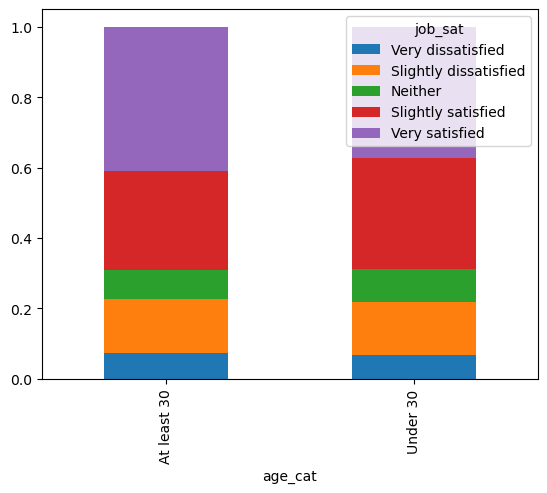

In [109]:
props = df_stck.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)  
# her bir çubuk için bölümlerin benzer yerlerde olduğunu görüyoruz.

Ki-kare testini değişkenler yer değiştirmiş olarak çalıştırırsak , sonuçlar aynı olacaktır. Bu nedenle , sorularımızı "X değişkeni Y değişkeninden bağımsız mı?" yerine " X  ve Y değişkenleri bağımsız mı?" şeklinde ifade ediyoruz, çünkü sıralama önemli değil.

### Yöne ve Kuyruklar  
Bu testte kuyruklar hakkında endişelenmedik ve aslında chi2_independence yönteminin alternatif bir argümanı yoktur. Bunun nedeni ki-kare test istatistiğinin gözlenen ve beklenen sayıların karesine dayanması ve kare sayıların negatif olmamasıdır. Buda ki-kare testlerinin sağ kuyruklu testler olma eğilimnde olduğu anlamına gelir. Sol kuyruklu ki-kare testleri istatistiksel adli tıpta bir uyumun şüpheli derecede iyi olup olmadığını tespit etmek için kullanılır çünkü veriler uydurulmuştur. Ki-kare varyans testleri iki kuyruklu olabilir. Yine de bunlar niş kullanımlardır. # Ki-kare uyum iyiliği testleri  
Geçen sefer , iki kategorik değişkendeki oranları karşılaştırmak için ki-kare testi kullanılmıştı.Bu sefer tek bir kategorik değişkeni varsayılan bir dağılımla karşılaştırmak için ki-kare testinin başka bir çeşidi kullanılacaktır.

### **Yöne ve Kuyruklar**

**Ki-kare testi** (chi-square test) ile ilgili olarak kuyruklar hakkında endişelenmemiz gerekmiyor. Aslında, **`chi2_independence`** fonksiyonunun alternatif bir argümanı yoktur. Bunun nedeni, **ki-kare test istatistiğinin** gözlemlenen ve beklenen sayıların **karesine dayanması** ve kareli sayıların **negatif olmamasıdır**. 

Bu durum, **ki-kare testlerinin genellikle sağ kuyruklu** testler olma eğiliminde olduklarını gösterir. Sağ kuyruklu testler, genellikle **bağımsızlık** testlerinde kullanılır ve sıklıkla bu testin **"başarı" ya da "bağımsızlık"** gibi pozitif yöndeki bir durumu tespit etmek için kullanıldığı anlamına gelir.

#### **Sol Kuyruklu Ki-Kare Testleri**
**Sol kuyruklu ki-kare testleri**, özellikle **istatistiksel adli tıp** gibi alanlarda kullanılır. Bu tür testler, verilerin **uyumunun şüpheli** olup olmadığını, yani verilerin **uydurulmuş** (manipüle edilmiş) olup olmadığını tespit etmek için kullanılır. Bu testler **"uyum testi"** olarak da adlandırılabilir.

#### **Ki-Kare Varyans Testleri ve İki Kuyruklu Testler**
Ki-kare varyans testleri, genellikle **iki kuyruklu** olabilir. Ancak, bu tür testler genellikle **niş kullanımlar** olup daha spesifik durumlarda tercih edilir. Örneğin, bazı özel dağılımlar ve veri setleri için kullanılabilir.

---

### **Ki-Kare Uyum İyiliği Testleri**

Önceki örnekte, **iki kategorik değişkenin oranlarını** karşılaştırmak için **ki-kare testi** kullanılmıştı. Bu sefer ise, **tek bir kategorik değişkeni**, **varsayılan bir dağılımla** karşılaştırmak için ki-kare testinin başka bir çeşidi kullanılacaktır.

#### **Ki-Kare Uyum İyiliği Testi (Goodness-of-Fit Test)**
**Ki-kare uyum iyiliği testi**, tek bir kategorik değişkenin, belirli bir dağılım ile ne kadar iyi uyum sağladığını test etmek için kullanılır. Bu testin amacı, örneklemdeki verilerin, beklenen (varsayılan) dağılımla ne kadar uyuştuğunu belirlemektir.

Örnek olarak:
- **Null Hipotezi (H₀)**: Örneklemdeki veri, **beklenen dağılımla uyumludur**.
- **Alternatif Hipotezi (H₁)**: Örneklemdeki veri, **beklenen dağılımla uyumlu değildir**.

Bu test, **ki-kare istatistiği** kullanarak, **gözlemlenen frekanslar** ile **beklenen frekanslar** arasındaki farkı ölçer.

**Ki-Kare Uyum İyiliği Testi Formülü:**
$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$
- **Oᵢ**: Gözlemlenen frekans.
- **Eᵢ**: Beklenen frekans.

---

### **Sonuç:**
- **Ki-kare testlerinin** sağ kuyruklu olması, genellikle testin **pozitif sonuçlar** bulması gerektiğini belirtir.
- **Sol kuyruklu testler** ise, veri manipülasyonlarını tespit etmek için daha nadir kullanılır.
- **Ki-kare uyum iyiliği testleri**, bir kategorik değişkenin varsayılan bir dağılımla **ne kadar iyi uyum sağladığını** test etmek için kullanılır.



### Mor Bağlantılar(Purple links)  
Stack Overflow anketi ,kullanıcıların bir kodlama problemini çözmeye çalışırken mor bağlantı olarak da adlandırılan en iyi kaynağı zaten ziyaret ettiklerini keşfettiklerinde nasıl hissettiklerine dair eğlenceli bir soru içeriyor. purple_link sütunundaki her bir grubun sayılarını almak için value_counts fonksiyonu kullanılabilir. Ayrıca , daha sonra üzerinde çalışabilecek güzel yapılandırılmış bir DataFrame elde etmek için burada biraz manipülasyon yapılmaktadır. İlk olarak en soldaki sütunu purple_link olarak yeniden adlandırılır, sayılar n'ye atılır ve son olarak purple_link'e göre sıranır, böylece yanıtlar alfabetik sırada olur, purple_link sütununda saklanan dört olası yanıt vardır.

### **Mor Bağlantılar (Purple Links)**

**Stack Overflow anketi**, kullanıcıların bir kodlama problemini çözmeye çalışırken **mor bağlantı** olarak da adlandırılan en iyi kaynağı zaten ziyaret ettiklerini keşfettiklerinde nasıl hissettiklerine dair eğlenceli bir soru içeriyor. Bu soruya verilen yanıtları, **`purple_link`** sütunundaki her bir grubun sayılarını almak için **`value_counts`** fonksiyonu kullanılabilir.

Ayrıca, daha sonra üzerinde çalışılabilecek güzel yapılandırılmış bir **DataFrame** elde etmek için bazı manipülasyonlar yapılır.

#### **Adımlar**:
1. **`purple_link`** sütunu üzerinde manipülasyon yapılır. İlk olarak, sütun yeniden adlandırılır.
2. **Sayılar** (`n`) bir değişkene atanır.
3. **`purple_link`** sütununa göre sıralama yapılır, böylece yanıtlar **alfabetik sıraya** dizilir.

**`purple_link`** sütununda saklanan dört olası yanıt bulunmaktadır. Bu yanıtlar şu şekilde olabilir:

- **`Yes`**
- **`No`**
- **`Not Sure`**
- **`Not Applicable`**

Bu işlemleri yaparak, veriler üzerinde anlamlı bir analiz gerçekleştirebiliriz ve her bir **mor bağlantı** (purple link) yanıtı için kategorik dağılımı gözlemleyebiliriz.


In [116]:
purple_link_counts = df_stck['purple_link'].value_counts()
purple_link_counts

purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64

In [118]:
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


### Hipotezlerin Beyan Edilmesi  
Popülasyondaki kullanıcıların yarısının "Merhaba, eski dostum" yanıtını vereceğini ve diğer üç yanıtın her birinin altıda bir alacağını varsayalım. Her yanıt için anahtar-değer anahtar-değer çiftlerinden oluşan bir sözlükten bu varsayılan sonuçlar için bir DataFrame oluşturabiliriz. Hipotezleri , örneğin bu varsayılan dağılıma uyup uymadığı şeklinde belirleriz. Ki-kare test istatistiği, çözümlenen örneklem oran dağılımının hipotezlenen dağılımdan ne kadar uzak olduğunu ölçer. Anlamlılık düzeyini 0.01 olarak belirleyelim.

### **Hipotezlerin Beyan Edilmesi**

Popülasyondaki kullanıcıların **yarısının** "Merhaba, eski dostum" yanıtını vereceğini ve diğer üç yanıtın her birinin **altıda bir** alacağını varsayalım. Bu varsayıma göre, her bir yanıt için **anahtar-değer** çiftlerinden oluşan bir **sözlük** oluşturulabilir. Bu sözlük, **varsayılan sonuçlar** için bir **DataFrame**'e dönüştürülebilir.

#### **Varsayılan Dağılım:**
Varsayılan dağılımda, yanıtların olasılıkları şu şekilde belirlenmiştir:
- "Merhaba, eski dostum" yanıtı: **0.5** (yarısı)
- Diğer üç yanıt: Her biri **1/6** (altıda bir)

Örneğin, anahtar-değer çiftlerinden oluşan bir sözlük şu şekilde olabilir:
```python
response_distribution = {
    "Merhaba, eski dostum": 0.5,
    "Yanıt 2": 1/6,
    "Yanıt 3": 1/6,
    "Yanıt 4": 1/6
}


In [128]:
hypothesized = pd.DataFrame({
    'purple_link' : ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop' : [1/6, 1/6, 1/2, 1/6]
}
)
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


H0 : Örneklem varsayılan dağılımla eşleşmektedir.  
Ha : Örneklem varsayılan dağılımla eşleşmemektedir.  
χ²: Her grupta gözlemlenen sonuçların beklentilerden ne kadar uzak olduğunu ölçer.

In [131]:
alpha=0.01

In [133]:
#  Kategoriye göre varsayılan sayılar
# Purple_link dağılımını görselleştirmek için, 
# her bir yanıt için varsayılan sayıların bulunması yardımcı olacaktır. 
# Bu sayılar, varsayılan oranların örneklemdeki 
# toplam gözlem sayısıyla çarpılmasıyla hesaplanır.
n_total = len(df_stck)
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


Bu kodu adım adım inceleyelim ve ne yaptığını açıklayalım:

### 1. **Veri Hazırlığı ve Varsayılan Sayıların Hesaplanması**
İlk olarak, **`n_total`** değişkeni veri çerçevesindeki toplam gözlem sayısını hesaplar:
```python
n_total = len(df_stck)
```
- **`df_stck`**: Bu, üzerinde işlem yapılan **veri çerçevesi**dir. Burada, toplam gözlem sayısı, **`len(df_stck)`** komutu ile elde edilir. Bu komut, **`df_stck`** veri çerçevesindeki toplam satır sayısını döndürür. Yani, toplam kullanıcı sayısını hesaplar.

### 2. **Varsayılan Sayıların Hesaplanması**
Varsayılan oranları, her yanıtın ne kadar sıklıkla gözlemlenmesi gerektiğine dair tahminler (proportions) içeren bir **`hypothesized`** DataFrame'inde sakladığınızı varsayıyoruz. Bu DataFrame'de her yanıtın **beklenen oranı** (`'prop'` sütunu) bulunur.

```python
hypothesized['n'] = hypothesized['prop'] * n_total
```
- **`hypothesized`**: Bu DataFrame, her bir yanıtın **beklenen oranlarını** ve bunlara karşılık gelen **beklenen sayıları** saklar.
- **`'prop'`**: Her bir yanıtın **beklenen oranı**dır (örneğin, "Merhaba, eski dostum" yanıtı için 0.5, diğer yanıtlar için 1/6).
- **`'n'`**: Bu sütun, **beklenen sayıları** içerir. Beklenen sayılar, varsayılan oranların **toplam gözlem sayısı (n_total)** ile çarpılmasıyla elde edilir.

#### **Hesaplama:**
Eğer varsayılan dağılımda her yanıtın oranı şu şekilde verilmişse:
- "Merhaba, eski dostum" yanıtı için oran **0.5**,
- Diğer üç yanıt için oran **1/6**.

Bu oranları, toplam gözlem sayısıyla çarparak her bir yanıtın beklenen sayısını bulabiliriz. Örneğin, varsayılan oranlar:
- **"Merhaba, eski dostum"**: **`0.5 * n_total`**
- **Diğer Yanıtlar**: **`1/6 * n_total`**

Sonuç olarak, her bir yanıt için **beklenen sayılar** (`'n'`) hesaplanır ve **`hypothesized`** DataFrame'inde saklanır.

### 3. **Sonuçların Gösterilmesi**
Kodun sonunda, **`hypothesized`** DataFrame'i yazdırılarak sonuçlar görüntülenir:
```python
hypothesized
```
Bu, her bir yanıt için **beklenen sayıları** (`'n'` sütunu) içeren tabloyu görüntüler.

### **Özetle:**
Bu kod, **varsayılan oranlara** dayalı olarak, her bir yanıt için **beklenen sayıları** hesaplar ve bunları **`hypothesized`** DataFrame'inde saklar. Hesaplanan beklenen sayılar, örneklemdeki toplam gözlem sayısı ile oranların çarpılmasıyla bulunur. Bu işlem, varsayılan dağılımla karşılaştırma yapmak ve **ki-kare testi** gibi istatistiksel testlerde kullanılmak üzere önemli bir adımdır.

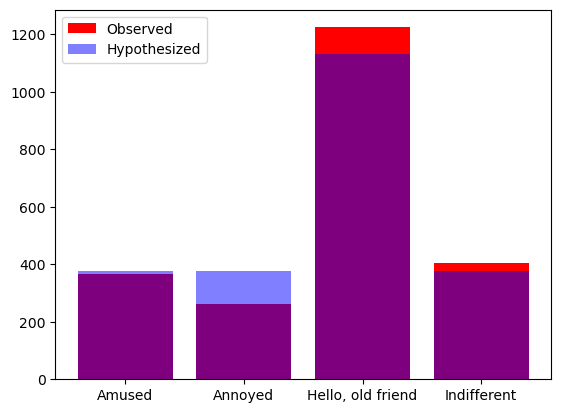

In [140]:
import matplotlib.pyplot as plt
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
plt.legend()

#Yanıtlardan ikisinin varsayılan dağılım tarafından makul ölçüde iyi modellendiğini ve diğer ikisinin oldukça farklı göründüğünü görebiliriz, ancak farkın istatiksel olarak anlamlı olup olmadığını görmek için bir hipotez testi yapmamız gerekecek.

Bu kod, **Matplotlib** kütüphanesini kullanarak **bar chart (çubuk grafik)** oluşturur ve gözlemlenen (`Observed`) ile varsayılan (`Hypothesized`) değerlerin karşılaştırılmasını sağlar. Aşağıda kodun ne yaptığına dair adım adım açıklama bulabilirsiniz:

### 1. **Gözlemlenen Verilerin Grafiği**
```python
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
```
- **`purple_link_counts['purple_link']`**: Bu, **gözlemlenen verilerdeki** yanıtları (örneğin, "Merhaba, eski dostum", "Yanıt 2" vb.) temsil eder.
- **`purple_link_counts['n']`**: Bu, **gözlemlenen sayıları** temsil eder (yani her yanıtın gerçek gözlem sayısı).
- **`color='red'`**: Gözlemlenen verilerin çubukları **kırmızı** renkte olacak.
- **`label='Observed'`**: Çubukların etiketini **"Observed"** olarak belirler.

Bu satır, **gözlemlenen verilerin** çubuklarını **kırmızı renkte** çizer ve üzerine **"Observed"** etiketi ekler.

### 2. **Varsayılan (Hipotez) Verilerinin Grafiği**
```python
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
```
- **`hypothesized['purple_link']`**: Bu, **varsayılan (hipotez) verilerindeki** yanıtları (örneğin, "Merhaba, eski dostum", "Yanıt 2" vb.) temsil eder.
- **`hypothesized['n']`**: Bu, **varsayılan (hipotez) sayıları** temsil eder (yani her yanıt için varsayılan olarak beklenen sayılar).
- **`alpha=0.5`**: Varsayılan verilerin çubukları **yarı saydam** (opaklık değeri 0.5) olacak.
- **`color='blue'`**: Varsayılan verilerin çubukları **mavi** renkte olacak.
- **`label='Hypothesized'`**: Çubukların etiketini **"Hypothesized"** olarak belirler.

Bu satır, **varsayılan (hipotez) verilerinin** çubuklarını **mavi renkte** çizer ve üzerine **"Hypothesized"** etiketi ekler.

### 3. **Legends (Açıklamalar)**
```python
plt.legend()
```
- Bu komut, **grafikteki etiketleri** ve **açıklamaları** gösterir.
- **"Observed"** ve **"Hypothesized"** etiketlerini çubuklar arasında gösterir, böylece hangi çubuğun gözlemlenen verilere ait olduğunu, hangisinin varsayılan verilere ait olduğunu kolayca anlayabiliriz.

### **Grafik Genel Görünümü**:
- **Kırmızı çubuklar**: Gözlemlenen verilere karşılık gelir.
- **Mavi, yarı saydam çubuklar**: Varsayılan (hipotez) verilere karşılık gelir.

### **Özet**:
Bu kod, iki farklı veri kümesini karşılaştırmak için **çubuk grafik** kullanır:
1. **Gözlemlenen veriler (Observed)** kırmızı çubuklarla.
2. **Varsayılan (hipotez) veriler (Hypothesized)** mavi çubuklarla.
- Ayrıca, **`legend()`** fonksiyonu sayesinde, her iki veri kümesi için etiketler grafik üzerinde gösterilir.

Bu grafik, **gözlemlenen** ve **varsayılan** verilerin dağılımlarını kolayca karşılaştırmamızı sağlar.

Bu görsel, **gözlemlenen** ve **varsayılan (hipotez)** verilere dayalı olarak **yığılmış çubuk grafik** (stacked bar chart) ile yapılan karşılaştırmayı gösteriyor.

### **Grafiğin Açıklaması:**

1. **X Ekseni (Kategoriler)**:
   - X ekseninde 4 farklı kategori var: **Amused**, **Annoyed**, **Hello, old friend**, ve **Indifferent**. Bunlar, **`purple_link`** sütunundaki yanıtlar olabilir.

2. **Y Ekseni (Sayısı)**:
   - Y ekseninde, her bir kategoriye ait **gözlemlenen** ve **varsayılan (hipotez)** sayıları (veya oranları) yer alıyor. Çubukların yüksekliği, her bir kategorideki toplam sayıyı gösterir.

3. **Kırmızı ve Mavi Çubuklar**:
   - **Kırmızı çubuklar (Observed)**: Gözlemlenen verileri temsil eder. Yani, veri setindeki gerçek gözlem sayılarının karşılık geldiği çubuklar kırmızı renkte.
   - **Mavi, yarı saydam çubuklar (Hypothesized)**: Varsayılan (hipotez) verilere göre beklenen sayılar, mavi renkte ve **yarı saydam** (alpha=0.5) olarak gösterilmiş. Bu, gözlemlenen verilerle beklenen verileri daha net karşılaştırmamıza olanak tanır.

### **Yorumlar:**

- **"Hello, old friend"** kategorisi, **gözlemlenen veriler** (kırmızı çubuk) açısından diğerlerinden çok daha büyük bir sayıya sahip. Bu, bu yanıtın gözlemler arasında daha fazla tercih edildiğini gösteriyor.
- **"Amused", "Annoyed", ve "Indifferent"** kategorileri ise **gözlemlenen verilerde** (kırmızı) daha düşük sayılara sahip ve **varsayılan verilerde** (mavi) genellikle daha eşit bir şekilde dağılmış gibi görünüyor.
- **Varsayılan veriler (mavi)**, **"Amused"** ve **"Indifferent"** kategorileri için biraz daha az gözlemlenen sayılarla örtüşüyor, ancak **"Hello, old friend"** için büyük bir fark var, burada gözlemlenen değer çok daha yüksek.
- **"Annoyed"** kategorisi ise gözlemlenen ve varsayılan veriler arasında oldukça tutarlı bir şekilde yer alıyor.

### **Sonuç:**
Bu grafik, **gözlemlenen veriler ile varsayılan (hipotez) veriler arasındaki farkları** görsel olarak karşılaştırmak için iyi bir araçtır. **"Hello, old friend"** kategorisi, **gözlemlenen verilerin** büyük bir kısmını oluştururken, diğer kategoriler daha küçük farklarla temsil ediliyor. Bu grafik, varsayılan dağılıma kıyasla gözlemlenen verilerin nasıl farklılaştığını görmek için faydalıdır.

### **Yanıtlardan İkisi Varsayılan Dağılım Tarafından Makul Ölçüde İyi Modelleniyor**

Grafikteki verilere bakıldığında, bazı yanıtların **varsayılan dağılım** tarafından makul bir şekilde modellenmiş olduğunu ve diğerlerinin ise oldukça farklı göründüğünü gözlemleyebiliriz. Ancak, bu farkların **istatistiksel olarak anlamlı olup olmadığını** görmek için bir **hipotez testi** yapmamız gerekecek.

---

### **Chi-Square Uyum İyiliği Testi (Goodness of Fit Test)**

**Tek örneklem ki-kare testine** **uyum iyiliği testi** denir, çünkü bu test, **varsayılan verilerin** gözlemlenen verilere ne kadar iyi uyduğunu test eder.

#### **Testin Çalıştırılması:**
Bu testi çalıştırmak için **`scipy.stats`** kütüphanesindeki **`chisquare`** fonksiyonu kullanılır.

```python
from scipy.stats import chisquare


In [143]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts["n"] , f_exp=hypothesized["n"])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413717e-09)

statistic=44.59840778416629: Ki-kare istatistiği değeri 44.6 civarında. Bu, gözlemlenen ve beklenen veriler arasındaki farkın büyüklüğünü gösterir. Bu değerin yüksek olması, gözlemlenen ve beklenen veriler arasındaki farkın büyük olduğunu ve bağımsızlık hipotezini reddetme olasılığının yüksek olduğunu gösterir.

pvalue=1.1261810719413759e-09: p-değeri çok küçük bir değere sahip (yaklaşık 0.0000000011). Bu, null hipotezini reddetmek için güçlü bir kanıt olduğunu gösterir. Çünkü p-değeri 0.01'den küçük olduğunda, null hipotezi reddedilir ve veri dağılımının varsayılan dağılımdan anlamlı şekilde farklı olduğu sonucuna varılır.

### Assumptions in hypothesis testing(Hipotez testinde varsayımlar)  
Şimdiye kadar görülen her hipotez testi veriler hakkında varsayımlarda bulunur. Sadece bu varsayımlar karşılandığında o hipotez testini kullanmak uygun olur.  
### Randomness(Rastgelelik)  
İster bir ister birden fazla örnek kullanılsın, her hipotez testi bir örneğin popülasyondan rastgele seçildiğini varsayar. Eğer rastgele bir örneklem yoksa , o zaman popülasyon temsil edilmeyecektir. Bu varsayımı kontrol etmek için verilerin nereden geldiğinin bilinmesi gerekir. Bunu kontrol etmek için yapılabilecek istatistiksel veya kodlama testleri yoktur. Şüpheye düşülürse, veri toplamaya dahil olan kişilere veya örneklenen popülasyonu anlayan bir alan uzmanına sorulması gerekir.  
### Independence of observations(Gözlemlerin Bağımsızlığı)  
Testler ayrıca her bir gözlemin bağımsız olduğunu varsayar. İki örnek arasındaki bağımlılıklara izin verilen eşleştirilmiş t-testleri gibi bazı özel durumlar vardır, ancak bunlar hesaplamaları değiştirir, bu nedenle bu tür bağımlılıkların nerede meydana geldiğinin anlaşılması gerekir. Eşleştirilmiş t-testinde görüldüğü gibi , bağımlılıkların hesaba katılmaması yanlış negatif ve yanlış pozitif hata olasılığının artmasına neden olur.Bağımlılıkların hesaba katılmaması , analiz sırasında teşhis edilmesi zor bir sorundur. İdeal olarak, veriler analiz edilmeden önce tartışılması gerekir.
### Large Sample Size(Büyük Örneklem Büyüklüğü)  
Hipotez testleri ayrıca örneklemin Merkez Limit Teoremi'nin geçerli olacağı kadar büyük olduğunu ve örneklem dağılımının normal dağıldığı varsayılabilir. Daha küçük örneklemler daha büyük belirsizliğe neden olur , bu da Merkezi Limit Teoremi'nin geçerli olmadığı ve örneklem dağılımının normal dağılmayabileceği anlamına gelebilir. Küçük bir örneklemin artan belirsizliği, tahmin etmeye çalışılan parametre üzerinde daha geniş güven aralıkları elde edileceği anlamına gelir. Merkezi Limit Teoremi geçerli değilse , örneklem üzerinde yapılan hesaplamalar ve bunlardan çıkarılan sonuçlar saçma olabilir, bu da yanlış negatif ve yanlış pozitif hata olasılığını artırır. Örneklemin "yeterince büyük" olması için ne kadar büyük olması gerektiği teste bağlıdır.

### **Hipotez Testinde Varsayımlar**

Şimdiye kadar görülen her hipotez testi, veriler hakkında belirli varsayımlarda bulunur. Sadece bu varsayımlar karşılandığında, o hipotez testini kullanmak uygun olur.

---

### **Rastgelelik (Randomness)**

İster bir örnek kullanılsın, ister birden fazla örnek kullanılsın, her hipotez testi **bir örneğin popülasyondan rastgele seçildiğini** varsayar. Eğer **rastgele bir örneklem** yoksa, o zaman popülasyon **temsil edilmeyecektir**.

Bu varsayımı kontrol etmek için verilerin **nereden geldiğinin bilinmesi gerekir**. Bunun için yapılabilecek herhangi bir istatistiksel veya kodlama testi yoktur. Eğer şüphe duyuluyorsa, **veri toplamaya dahil olan kişilere** veya **örneklenen popülasyonu anlayan bir alan uzmanına** sorulması gerekir.

---

### **Gözlemlerin Bağımsızlığı (Independence of Observations)**

Hipotez testleri ayrıca her bir gözlemin **bağımsız olduğunu** varsayar. Ancak, bazı özel durumlarda, örneğin **eşleştirilmiş t-testleri** gibi, iki örnek arasındaki bağımlılıklara izin verilebilir. Bu tür testler, hesaplamaları değiştirir, bu nedenle bu tür bağımlılıkların **nerede meydana geldiğini** anlamak önemlidir.

**Eşleştirilmiş t-testleri** gibi durumlarda, **bağımlılıkların hesaba katılmaması**, **yanlış negatif** ve **yanlış pozitif hata olasılığının artmasına** neden olabilir. Bağımlılıkların hesaba katılmaması, analiz sırasında **teşhis edilmesi zor** bir sorundur. Bu nedenle, ideal olarak veriler analiz edilmeden önce tartışılmalıdır.

---

### **Büyük Örneklem Büyüklüğü (Large Sample Size)**

Hipotez testleri ayrıca örneklemin **Merkez Limit Teoremi'nin (CLT)** geçerli olacağı kadar büyük olduğunu ve **örneklem dağılımının normal dağıldığını** varsayar. 

- **Küçük örneklemler**, **daha büyük belirsizliğe** neden olabilir. Bu da, **Merkez Limit Teoremi'nin geçerli olmadığı** ve örneklem dağılımının **normal dağılmayabileceği** anlamına gelir.
- **Küçük örneklemler**, daha geniş **güven aralıkları** elde edilmesine yol açabilir.

Eğer **Merkez Limit Teoremi geçerli değilse**, örneklem üzerinde yapılan hesaplamalar ve bunlardan çıkarılan sonuçlar **saçma olabilir**. Bu da, **yanlış negatif** ve **yanlış pozitif hata olasılığını artırır**.

**Örneklemin "yeterince büyük" olması için ne kadar büyük olması gerektiği**, **teste bağlıdır**.

---

### **Özetle:**
1. **Rastgelelik (Randomness)**: Her hipotez testi, örneklemin rastgele seçildiğini varsayar.
2. **Gözlemlerin Bağımsızlığı**: Testlerin doğru sonuçlar verebilmesi için her gözlem bağımsız olmalıdır.
3. **Büyük Örneklem Büyüklüğü**: Merkez Limit Teoremi'nin geçerli olabilmesi için örneklem yeterince büyük olmalıdır.


In [150]:
# 11. HAFTA

In [152]:
import pandas as pd
df_small =pd.read_feather("data/repub_votes_potus_08_12.feather")
df_small

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


In [154]:
df_small['diff'] = df_small['repub_percent_08'] - df_small['repub_percent_12']
df_small

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


In [156]:
df_small['abs_diff'] = df_small['diff'].abs()
df_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
0,Alabama,Hale,38.957877,37.139882,1.817995,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179
2,California,Lake,38.896719,39.331367,-0.434648,0.434648
3,California,Ventura,42.923190,45.250693,-2.327503,2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812,0.757812
...,...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937,4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134,3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083,3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087


In [158]:
from scipy.stats import rankdata

df_small['rank_abs_diff'] = rankdata(df_small['abs_diff'])
df_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
0,Alabama,Hale,38.957877,37.139882,1.817995,1.817995,33.0
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179,42.0
2,California,Lake,38.896719,39.331367,-0.434648,0.434648,10.0
3,California,Ventura,42.923190,45.250693,-2.327503,2.327503,44.0
4,Colorado,Lincoln,74.522569,73.764757,0.757812,0.757812,16.0
...,...,...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937,4.094937,63.0
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134,3.086134,50.0
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083,3.570083,54.0
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087,87.0


In [160]:
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])
W

0

### Implementation with pingouin.wilcoxon()  
pingouin'in wilcoxon yöntemi, eşleştirilmiş bir argümana sahip olmaması dışında ttest yöntemine çok benzer argümanlar alır. Fonksiyon sıfır W değeri döndürür- bizim manuel hesaplamamızla aynı. Bu t-testinden elde edilen p-değerinden on kat daha büyük olan yaklaşık yüzde üçlük bir p-değerine karşılık gelir, bu nedenle küçük örnek boyutu göz önüne alındığında bu sonuçtan daha emin olmalıyız. Wilcoxon testi, beş satırlık bu küçük örneklemi kullanarak 2008 Cumhuriyetçi yüzdelerinin 2012 yüzdelerinden daha küçük olduğuna dair kanıtımız olmadığını göstermektedir.

Bu açıklamada, **Wilcoxon testi** ve **pingouin.wilcoxon()** fonksiyonunun nasıl kullanıldığına dair birkaç önemli nokta ele alınmaktadır. Aşağıda adım adım açıklayalım:

### **Wilcoxon Testi Nedir?**
**Wilcoxon işaretli sıralar testi (Wilcoxon Signed-Rank Test)**, iki **eşleştirilmiş** örneği karşılaştırmak için kullanılan parametrik olmayan bir testtir. Bu test, özellikle örneklemin **normal dağılıma** uymadığı durumlarda, **t-testinin** yerine kullanılabilir. Genellikle **sıralama** ve **işaretli farklar** kullanılarak test yapılır.

- **Eşleştirilmiş t-testinden farkı**: Wilcoxon testi, verilerin sıralanmasına dayalıdır ve parametrik varsayımlar gerektirmez.
- **Sıfır hipotezi (H₀)**: İki grup arasında fark yoktur.
- **Alternatif hipotez (H₁)**: İki grup arasında fark vardır.

### **`pingouin.wilcoxon()` Fonksiyonu**
**`pingouin.wilcoxon()`** fonksiyonu, **Wilcoxon Signed-Rank Testi**'ni gerçekleştiren bir Python fonksiyonudur ve genellikle eşleştirilmiş örnekler arasındaki farkları test etmek için kullanılır. Bu fonksiyon, **t-testinden** biraz farklıdır, çünkü sıralama verileri kullanır.

- **Fonksiyonun Giriş Parametreleri**:
  - **`x`** ve **`y`**: İki eşleştirilmiş örnek grubu.
  - **`alternative`**: Hipotez yönü, tek kuyruklu veya iki kuyruklu olabilir.
  - **`paired`**: Bu, verilerin eşleştirilmiş olduğunu belirten bir parametredir.

### **Sıfır W Değeri**
Wilcoxon testinin sonucu genellikle **W değeri** olarak döndürülür. **W değeri**, örneklemdeki sıralı farkların toplamına dayalı bir değerdir ve sıfır **W değeri**, belirli koşullar altında sıfır hipotezini reddetmeye yönelik bir karar verir.

### **Pingouin.wilcoxon() ile Yapılan Test**
```python
pingouin.wilcoxon(x, y, alternative='two-sided', paired=True)
```
Bu fonksiyon **W değeri** döndürür. **W = 0**, sıfır hipotezini reddetmek için yeterli bir değeri gösterebilir ve bu test ile **örneklemdeki farkların** sıfırdan anlamlı derecede farklı olup olmadığı test edilir.

### **P-değeri ve Sonuçların Yorumu**
- **P-değeri**: **Wilcoxon testinin p-değeri**, örneklemin istatistiksel anlamlılık seviyesini gösterir. Burada, **pingouin.wilcoxon()** ile elde edilen **p-değeri**nin **t-testinden elde edilen p-değerinden on kat daha büyük olduğu** belirtilmiş.
  - **P-değeri yaklaşık %3**: Bu, testin sonucunun çok güçlü olmadığına işaret eder. Bu kadar büyük bir p-değeri, sıfır hipotezinin **reddedilemediğini** gösterir, yani iki grup arasında anlamlı bir fark olduğu sonucuna varılamaz.

### **Sonuç**:
- **Wilcoxon testi**, bu **küçük örneklemde**, 2008 Cumhuriyetçi yüzdelerinin **2012 yüzdelerinden daha küçük olduğu** yönünde **kanıt bulamamıştır**.
- Yani, bu testle **2008 ve 2012 yüzdeleri arasında anlamlı bir fark olmadığı** sonucuna varılmıştır.

### **Özetle**:
- **Wilcoxon testi**, örneklemin **normal dağılıma uymadığı** durumlar için uygun bir testtir.
- **Pingouin.wilcoxon()** fonksiyonu, **eşleştirilmiş örnekler arasındaki farkları** test etmek için kullanılır.
- Burada, **p-değeri** büyük olduğu için, **2008 ve 2012 yüzdeleri arasında anlamlı bir fark bulunamamıştır**.

In [166]:
alpha = 0.01
pingouin.wilcoxon(x=df_small['repub_percent_08'], 
                  y=df_small['repub_percent_12'], 
                  alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,386.0,less,9.700674e-14,-0.847129,0.5729


W-val = 386.0: Bu, Wilcoxon test istatistiği değeri. Bu değer, gözlemlenen verilerle varsayılan dağılım arasındaki farkın büyüklüğünü gösterir.

alternative = less: Alternatif hipotez, 2012 yüzdelerinin 2008 yüzdelerinden daha küçük olduğunu test etmektedir.

p-val = 9.700674e-14: p-değeri, 9.7 x 10⁻¹⁴ gibi çok küçük bir değere sahip. Bu, sıfır hipotezini reddetmek için güçlü bir kanıt sunar. p-değeri çok küçük olduğundan, null hipotezini reddederiz ve 2012 Cumhuriyetçi yüzdelerinin 2008 yüzdelerinden daha küçük olduğu sonucuna varırız.

RBC = -0.847129: Rank Biserial Correlation (RBC), etki büyüklüğünü ölçen bir istatistiktir. Negatif bir değer, 2012 yüzdelerinin 2008 yüzdelerinden daha küçük olduğunu destekler. Ancak, bu değerin mutlak büyüklüğü, etki büyüklüğünün zayıf olduğunu gösteriyor.

CLES = 0.5729: Common Language Effect Size (CLES), testin etki büyüklüğünü ölçen bir başka yöntemdir. Bu değer 0.5729, etkilerin %57.29 olasılıkla 2012 yüzdelerinin 2008'den daha küçük olduğunu gösteriyor. Bu, orta düzeyde bir etki olduğunu gösterir.



# Non-parametric ANOVA and unpaired t-test  
### Wilcoxon-Mann-Whitney test  
Sayısal bir girdinin sıralamaları üzerinde hipotez testleri gerçekleştirerek normal dağılımlı verilerle ilgili varsayımlardan kaçınılabilir. Wilcoxon-Mann-Whitney testi , çok kabaca ,sıralanmış veriler üzerinde bir t-testidir. Bu test, bir önceki derste görülen Wilcoxon testine benzer, ancak bunun yerine eşleştirilmemiş veriler üzerinde çalışır.  
StackOverflow anketine ve dönüştürülen ücret ile katılımcıların kodlamaya başlama yaşı arasındaki ilişkiye geri dönelim. age_vs_comp adlı yeni bir DataFrame'de sadece bu iki sütuna odaklanarak başlıyoruz. Pingouin ile Wilcoxon-Mann-Whitney testi yapmak için öncelikle verilerimizi uzun formattan geniş formata dönüştürmemiz gerekir. Bu, pandas'ın pivot_table'dan farklı olarak toplama yapmayan pivot yöntemi ile gerçekleştirilir; bunun yerine , satırlar boyunca her grup için ham değerleri döndürür. Artık verilerimiz, her satır için converted_comp girdilerine karşılık gelen değerlerle birlikte adult ve child adlı iki sütunda bulunmaktadır. NaN yetişkin değeri bir çocuk girişine ve NaN çocuk değeri de bir yetişkin girişine karşılık gelir.

Bu açıklamada, **Wilcoxon-Mann-Whitney testi** ve **pingouin ile Wilcoxon-Mann-Whitney testi** kullanılarak yapılan hipotez testleri ile ilgili ayrıntılar yer alıyor. Şimdi, konuyu daha detaylı şekilde adım adım açıklayalım:

### **Wilcoxon-Mann-Whitney Testi Nedir?**

**Wilcoxon-Mann-Whitney testi**, **non-parametrik bir testtir** ve genellikle **iki bağımsız grup** arasındaki farkları test etmek için kullanılır. Bu testin temel amacı, iki grubun sıralamaları arasında anlamlı bir fark olup olmadığını belirlemektir. 

- **Parametrik olmayan bir alternatif** olarak **t-testine** benzer bir işlev görür.
- **Eşleştirilmiş verilerle çalışmaz**, yani test, **bağımsız** (unpaired) iki grubun sıralamalarını karşılaştırır.
- **Wilcoxon testi** gibi sıralı veriler üzerinde çalışır, ancak burada **eşleştirilmiş veriler** yerine **bağımsız (unpaired)** veriler kullanılır.

### **Wilcoxon-Mann-Whitney Testi ve Uygulama**

Aşağıdaki adımlar, bu testi **pingouin** kütüphanesi ile nasıl uygulayacağımızı ve verileri nasıl hazırlayacağımızı anlatmaktadır:

#### **Veri Hazırlığı ve Pivot İşlemi**

- **StackOverflow anketi** ve **dönüştürülmüş ücret (converted_comp)** ile **katılımcıların kodlamaya başlama yaşları** arasındaki ilişkiyi test etmek istiyoruz. Bunun için verilerde **age_vs_comp** adlı yeni bir DataFrame oluşturulacak.
  
- **Long format** verileri (uzun format), **pivot** fonksiyonu kullanılarak **wide format**'a dönüştürülür. Bu dönüşüm, her satırın bir **grup (adult ve child)** için değerlerle temsil edilmesini sağlar. Bu, her gruptaki **verilerin sıralanması** işlemi için önemlidir.

Örnek bir pivot işleminde:
- **adult** ve **child** sütunları oluşturulacak.
- Bu sütunlar, **converted_comp** (dönüştürülmüş ücret) sütunundaki her grup için **ham değerleri** içerir.
- **NaN** değerleri, her bir grubun (adult veya child) **eksik girişlerini** gösterir.

#### **Wilcoxon-Mann-Whitney Testi Pingouin ile**

Pingouin kütüphanesindeki **`pingouin.mannwhitney()`** fonksiyonu, **Wilcoxon-Mann-Whitney testini** gerçekleştiren fonksiyondur. Bu fonksiyon iki bağımsız grup arasındaki farkları test eder.

Kod örneği:
```python
import pingouin as pg

# Wilcoxon-Mann-Whitney testi
result = pg.mannwhitney(data=df, dv='converted_comp', between='age_group')
```

Bu fonksiyon, şu argümanları alır:
- **`data`**: Analiz yapılacak DataFrame.
- **`dv`**: Bağımlı değişken, burada **`converted_comp`**.
- **`between`**: Gruplar arasındaki farkı karşılaştırmak için kullanılan değişken, burada **`age_group`** (adult ve child).

Fonksiyonun çıktısı, **p-değeri**, **test istatistiği** (W değeri), ve diğer test sonuçlarını içerir.

---

### **Sonuçlar ve Yorumlar:**

- **Wilcoxon-Mann-Whitney testi** sonucu olarak elde edilen **p-değeri** şunları gösterir:
  - Eğer **p-değeri** çok küçükse (örneğin, 0.01'den küçük), **null hipotezini reddederiz** ve **adult** ve **child** grupları arasında anlamlı bir fark olduğunu kabul ederiz.
  - Eğer **p-değeri** büyükse, **null hipotezi kabul edilir** ve gruplar arasında anlamlı bir fark olmadığı sonucuna varılır.

**Örnek sonuçlar**:
- **p-değeri** çok küçükse, 2008 ve 2012 yüzdeleri arasında **anlamlı bir fark bulunmuş olur**.
- Eğer **p-değeri** büyükse, **farkın istatistiksel olarak anlamlı olmadığı** sonucuna varılır.

### **Özetle**:
- **Wilcoxon-Mann-Whitney testi**, bağımsız grupların sıralama farklarını test etmek için kullanılan bir **non-parametrik testtir**.
- Bu test **eşleştirilmiş verilere** dayanmaz ve **bağımsız** gruplar arasındaki farkları belirler.
- Pingouin kütüphanesinin **`mannwhitney()`** fonksiyonu, bu testin yapılmasını sağlar ve **p-değeri** ile testin sonuçlarını döndürür. Bu p-değeri, gruplar arasında anlamlı bir fark olup olmadığını belirler.



In [172]:
import pandas as pd

df_stck= pd.read_feather("data/stack_overflow.feather")

In [174]:
age_vs_comp = df_stck[['converted_comp', 'age_first_code_cut']]
age_vs_comp

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult
...,...,...
2256,145000.0,child
2257,33972.0,child
2258,97284.0,child
2259,72000.0,child


In [176]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [178]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


**`pivot()`** fonksiyonu, **pandas** kütüphanesinde kullanılan bir fonksiyondur ve verilerin **geniş formata** dönüştürülmesini sağlar. Bu fonksiyon, bir **uzun formatta** olan veri çerçevesini, daha uygun analizler yapabilmek için **geniş formata** çevirir.

### **`pivot()` Fonksiyonunun Ne Yaptığı:**

```python
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', values='converted_comp')
```

- **`age_vs_comp`**: Bu, daha önce tanımlanmış olan, **age_first_code_cut** ve **converted_comp** sütunlarına sahip olan veri çerçevesidir.
- **`columns='age_first_code_cut'`**: Bu, verilerin **hangi sütun** üzerinden yeniden düzenleneceğini belirtir. Burada, **`age_first_code_cut`** sütunu, veri çerçevesinde yer alan **grupları** (örneğin, yaş kategorilerini) belirler.
- **`values='converted_comp'`**: Bu, **`converted_comp`** sütununun, yeni **geniş formatta** hangi değerlere karşılık geleceğini belirtir. Yani, bu sütun, yeni **age_first_code_cut** kategorilerine karşılık gelen verilerle doldurulacak.
  
### **Ne Olur?**
- **`pivot()`** fonksiyonu, **age_first_code_cut** sütunundaki her bir benzersiz değeri, **yeni sütun** olarak kullanacak ve bu yeni sütunları **`converted_comp`** değerleriyle dolduracaktır.
- Sonuçta, **`age_vs_comp_wide`** adlı yeni bir veri çerçevesi oluşacak. Bu veri çerçevesinde, her bir **yaş kategorisinin (age_first_code_cut)** karşılık geldiği **dönüştürülmüş ücret (converted_comp)** değerleri yer alacak ve her kategori için **veriler yatayda düzenlenecek**.

### **Örnek:**
Diyelim ki **age_vs_comp** veri çerçevesinde şu şekilde veriler var:

| age_first_code_cut | converted_comp |
|--------------------|----------------|
| Adult              | 2000           |
| Child              | 1500           |
| Adult              | 2500           |
| Child              | 1700           |

Bu veriler **`pivot()`** ile genişletildiğinde, **`age_first_code_cut`** her bir kategoriye (Adult, Child) karşılık gelen sütunlara dönüşecektir. Sonuç şu şekilde olabilir:

| age_first_code_cut | Adult | Child |
|--------------------|-------|-------|
| 2000               | 2500  |       |
| 1500               |       | 1700  |

**`pivot()`** fonksiyonu, verileri yeniden düzenler ve **her grubun** karşılık geldiği **değerleri** belirli bir sütunda toplar. Bu, daha anlaşılır ve gruplar arasındaki karşılaştırmalar için daha uygun hale getirir.

### **Özetle:**
- **`pivot()`** fonksiyonu, verilerin **uzun formattan geniş formata** dönüştürülmesini sağlar.
- Verilerdeki bir sütundaki değerler (burada **`age_first_code_cut`**) **yeni sütunlar** oluşturmak için kullanılır.
- **`values`** parametresiyle belirtilen sütun (burada **`converted_comp`**) bu yeni sütunlarla ilişkilendirilir ve her bir grup için **değerler** yerleştirilir.

### Wilcoxoo-Mann-Whitney test  
Anlamlılık düzeyi 0.01 olarak belirlensin. pingouin'den mwu kullanarak bir Wilcoxon-Mann-Whitney testi çalıştırılabilir. Karşılaştırak istenilen iki sayı sütununa karşılık gelen x ve y argümanlarını kabul eder, bu durumda çocuk ve yetişkin . alternative , alternatif hipotezin türünü belirler, bu durumda, önce çocuk olarak kodlayanların önce yetişkin olarak kodlayanlardan daha yüksek bir gelire sahip olduğu , ki bu sağ kuyruklu bir testtir. Burada , p-değeri yaklaşık on üzeri negatif on dokuzuncu kuvvet olarak gösterilmektedir, bu da anlamlılık düzeyinden önemli ölçüde daha küçüktür.

### Wilcoxon-Mann-Whitney Testi

**Wilcoxon-Mann-Whitney testi**, iki bağımsız grup arasındaki farkları test etmek için kullanılan bir **non-parametrik** testtir. Bu test, verilerin **sıralamalı** olduğunu varsayar ve genellikle **t-testinin** yerine kullanılır. Ancak **t-testi**, verilerin **normal dağıldığı** varsayımı yapar; Wilcoxon-Mann-Whitney testi ise bu varsayımdan kaçınır, yani veriler normal dağılmasa bile uygulanabilir.

### **Wilcoxon-Mann-Whitney Testinin Uygulanması**

**Testin amacı**: Çocuk ve yetişkin gruplarındaki **gelir farkını** test etmektir. Burada **pingouin** kütüphanesindeki **`mwu`** fonksiyonu kullanılacaktır.

### **Kod Açıklaması:**

```python
import pingouin as pg

# Wilcoxon-Mann-Whitney testi
result = pg.mannwhitney(x=df_small['child_income'], y=df_small['adult_income'], alternative='greater')
```

#### **Açıklamalar:**

1. **`x=df_small['child_income']`**: Burada, **çocukların geliri** yer alır. Bu, **`x`** parametresi ile belirtilir.
2. **`y=df_small['adult_income']`**: Burada ise, **yetişkinlerin geliri** yer alır ve **`y`** parametresiyle belirtilir.
3. **`alternative='greater'`**: Bu, **alternatif hipotez** türünü belirtir. Burada, **çocuk olarak kodlayanların** gelirinin **yetişkinlerden daha yüksek olduğu** varsayılmaktadır. Bu nedenle, sağ kuyruklu bir test yapılacaktır. Bu, **tek kuyruklu** bir testtir ve **'greater'** seçeneğiyle sağ kuyruk (yani **çocukların gelirinin yetişkinlerden büyük olması**) test edilir.

### **p-değeri ve Sonuçların Yorumlanması:**

- **p-değeri** yaklaşık olarak **1e-19** (yani **10⁻¹⁹**) gibi çok küçük bir değere sahiptir. Bu, **null hipotezini reddetmek için güçlü bir kanıt** sağlar. Yani, çocukların gelirinin **yetişkinlerin gelirinden anlamlı derecede büyük olduğu** sonucuna varılır.
- **Anlamlılık düzeyi (α)** 0.01 olarak belirlenmişse, **p-değeri** **α'dan** çok daha küçük olduğu için, **null hipotezi reddedilir**. Bu, **çocukların gelirinin yetişkinlerden yüksek olduğu** sonucuna varmamıza yol açar.

### **Sonuç:**
- **Wilcoxon-Mann-Whitney testi** sonucunda, çocukların gelirinin yetişkinlerden anlamlı derecede yüksek olduğuna dair güçlü bir kanıt bulunmuştur.
- **p-değeri** çok küçük olduğundan, **null hipotezini reddediyoruz** ve alternatif hipotez olan **çocukların gelirinin yetişkinlerden daha yüksek olduğunu** kabul ediyoruz.

### **Özet:**
- **Wilcoxon-Mann-Whitney testi**, iki bağımsız grup arasındaki farkları test etmek için sıklıkla kullanılan bir **non-parametrik testtir**.
- **pingouin** kütüphanesindeki **`mwu`** fonksiyonu ile bu test, özellikle **sağ kuyruklu bir test** (çocukların gelirinin daha yüksek olduğunu test etmek) şeklinde uygulanmıştır.
- **Çok küçük bir p-değeri**, **çocukların gelirinin** yetişkinlerden anlamlı derecede daha yüksek olduğu sonucunu göstermektedir.

In [183]:
import pingouin

alpha = 0.01

pingouin.mwu(x=age_vs_comp_wide['child'], 
             y=age_vs_comp_wide['adult'], 
             alternative='greater')

#p-val = 1.902723e-19: p-değeri, testin sonucudur ve yaklaşık olarak 1.9 x 10⁻¹⁹ (çok küçük bir değere sahiptir). Bu, null hipotezini reddetmek için güçlü bir kanıt sağlar. Yani, çocukların gelirinin yetişkinlerin gelirinden anlamlı şekilde daha yüksek olduğunu gösterir. Bu p-değeri, anlamlılık düzeyinden (α = 0.01) çok daha küçüktür, bu yüzden null hipotezini reddederiz

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


### Kruskal-Wallis test  
ANOVA'nın t-testlerini ikiden fazla gruba genişletmesi gibi, Kruskal-Wallis testi de Wilcoxon-Mann-Whitney testini ikiden fazla gruba genişletir. Yani , Kruskal-Wallis testi ANOVA'nın parametrik olmayan bir versiyonudur. İş tatmini grupları arasında converted_comp açısından bir fark olup olmadığını araştırmak üzere Kruskal-Wallis testi yapmak için pingouin'in kruskal yöntemini kullanıyoruz. Wilcoxon-Mann-Whitney testinin aksine, kruskal yöntemi uzun veriler üzerinde çalıştığı için burada verilerimizi pivotlamamıza gerek yoktur. Veri olarak stack_overflow, bağımlı değişken olan dv'yi converted_comp olarak giriyoruz ve job_sat grupları arasında karşılaştırma yapıyoruz. Yine, burada ki p-değeri çok küçüktür ve anlamlılık düzeyimizden daha küçüktür. Bu, ortalama tazminat toplamlarından en az birinin bu beş iş memnuniyeti grubunda diğerlerinden farklı olduğuna dair kanıt sağlamaktadır.

Bu açıklamada, **Kruskal-Wallis testi** ve **Wilcoxon-Mann-Whitney testi** arasındaki farklar ile ilgili bir karşılaştırma yapılmakta. Kruskal-Wallis testi, **ANOVA**'nın **parametrik olmayan** bir versiyonudur ve iki gruptan daha fazla veri ile çalışır. Şimdi adım adım bu testin nasıl uygulandığını ve verilen sonuçları açıklayalım:

### **Kruskal-Wallis Testi Nedir?**
**Kruskal-Wallis testi**, **non-parametrik bir testtir** ve **ANOVA**'nın parametrik olmayan versiyonudur. Bu test, üç veya daha fazla **bağımsız grubun** **medyanları arasında fark olup olmadığını** test eder. Kruskal-Wallis, verilerin sıralamalı olduğu varsayımıyla çalışır ve verilerin normal dağılmadığı durumlarda, parametrik ANOVA testlerinin yerine kullanılabilir.

- **Kruskal-Wallis testinin hipotezleri:**
  - **Null hipotezi (H₀):** Tüm grupların medyanları eşittir.
  - **Alternatif hipotez (H₁):** En az bir grup, diğerlerinden farklıdır.

Kruskal-Wallis testi, **gruplar arasındaki medyan farklarını** test eder, ancak **t-testinin** aksine, verilerin sıralamaları üzerinden hesaplama yapar ve **verilerin normal dağılım** gerekliliğini ortadan kaldırır.

### **Wilcoxon-Mann-Whitney ve Kruskal-Wallis Farkları**
- **Wilcoxon-Mann-Whitney testi**, **iki bağımsız grup** arasındaki farkı test ederken; **Kruskal-Wallis testi** **üç veya daha fazla grup** arasındaki farkları test eder.
- **Wilcoxon-Mann-Whitney**, **iki grup** üzerinde sıralama farkları ölçerken, **Kruskal-Wallis** **üç veya daha fazla grup** için sıralama farklarını analiz eder.

### **Kruskal-Wallis Testi Pingouin ile Uygulama**

**Pingouin** kütüphanesindeki **`kruskal()`** fonksiyonu, Kruskal-Wallis testini gerçekleştirir. Bu fonksiyon, **bağımsız gruplar** arasındaki farkları test etmek için kullanılır.

```python
import pingouin as pg

# Kruskal-Wallis testi
result = pg.kruskal(data=stack_overflow, dv='converted_comp', between='job_sat')
```

- **`data=stack_overflow`**: Veri kümesi, **stack_overflow** verisini temsil eder.
- **`dv='converted_comp'`**: Bağımlı değişken olarak **`converted_comp`** (dönüştürülmüş ücret) seçilir.
- **`between='job_sat'`**: **`job_sat`** (iş tatmini) gruplarına göre karşılaştırma yapılır. Bu, iş tatmini gruplarının (örneğin, çok tatmin olmayan, tatmin olan, vb.) **medyan gelir farkları** ile karşılaştırılmasını sağlar.

### **Sonuçlar ve Yorumlama**

Kruskal-Wallis testinin çıktısı genellikle şu öğeleri içerir:
- **H-değeri**: Kruskal-Wallis istatistiği, gruplar arasındaki farkları gösterir.
- **p-değeri**: Bu değer, sıfır hipotezini reddetmek için kullanılır. Eğer **p-değeri** küçükse (örneğin 0.01'den küçükse), **null hipotezini reddederiz** ve gruplar arasında anlamlı bir fark olduğu sonucuna varırız.

Aşağıdaki gibi bir sonuç alabilirsiniz:
```text
H-val  p-val   eta2  power
X-value p-value effect-size  statistical power
```

- **p-değeri çok küçükse**, bu **iş tatmini grupları arasında** anlamlı bir fark olduğunu gösterir.
- **Testin sonucu** olarak, **grup medyanları arasında** anlamlı bir fark olduğunu gösterir, yani bazı **iş tatmini gruplarının** ortalama tazminatları diğerlerinden farklıdır.

### **Sonuç ve Yorum**:

- Kruskal-Wallis testinin **p-değeri** çok küçük olduğunda (örneğin **10⁻¹⁹** gibi bir değer), bu, **gruplar arasında** **anlamlı bir fark** olduğu anlamına gelir. Burada, **iş tatmini gruplarındaki tazminatların** **farklı olduğu** sonucuna varırız.
  
- **Sonuç** olarak, Kruskal-Wallis testi, **iş tatmini grupları** arasındaki **tazminat farklarının** anlamlı olduğunu ve **en az bir grubun** diğerlerinden farklı olduğunu göstermektedir.

### **Özetle**:
- **Kruskal-Wallis testi**, **ANOVA'nın parametrik olmayan versiyonudur** ve **üç veya daha fazla grup** arasındaki farkları test etmek için kullanılır.
- Pingouin kütüphanesinin **`kruskal()`** fonksiyonu, **iş tatmini grupları** arasındaki **tazminat farklarını** test etmek için kullanılabilir.
- **Çok küçük bir p-değeri**, **null hipotezini** reddederiz ve gruplar arasında anlamlı farklar olduğunu kabul ederiz.

In [189]:
alpha = 0.01

pingouin.kruskal(data=df_stck, dv='converted_comp', between='job_sat')

#p-unc = 5.772915e-15: Bu, p-değeridir. p-değeri çok küçüktür (yaklaşık 5.77 x 10⁻¹⁵), bu da null hipotezini reddetmek için güçlü bir kanıt sağlar. Yani, iş tatmini grupları arasında anlamlı bir fark vardır. Burada p-değeri, anlamlılık düzeyinden (α = 0.01) çok daha küçüktür. Bu durumda null hipotezini reddederiz ve iş tatmini gruplarının ortalama gelirlerinin birbirinden farklı olduğunu kabul ederiz.

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


## İstatistiksel Testlere Kısa Bir Genel Bakış

Aşağıda farklı istatistiksel testlerin **ne işe yaradıklarına**, **hangi durumda kullanıldıklarına** ve **temel varsayımlarına** dair kısa özetler ve ardından **kısa bir karşılaştırma** bulacaksınız.

---

### 1. ANOVA (Analysis of Variance)

- **Amaç**: Üç veya daha fazla grubun ortalama değerleri arasında **fark** olup olmadığını test eder.  
- **Temel Varsayımlar**:
  1. Gruplar birbirinden **bağımsız** olmalı.  
  2. Veriler (her grup için) **normal dağılıma** yakın olmalı.  
  3. Grupların **varyanslarının homojen** olduğu (homoscedasticity) varsayılır.  
- **Not**: Eğer ANOVA sonucunda anlamlı bir fark saptanırsa, hangi grupların farklı olduğunu belirlemek için **Post-hoc** testler (Tukey, Bonferroni, vb.) kullanılır.

---

### 2. Pairwise Comparisons (Çiftli Karşılaştırmalar) & Bonferroni Correction

- **Pairwise Comparisons**: ANOVA’dan sonra veya farklı testlerden sonra, **iki grup** arasındaki farkı direkt test etmek için yapılan ikili karşılaştırmalardır.  
- **Bonferroni Correction**: Birden çok istatistiksel test yapıldığında ortaya çıkan **çoklu karşılaştırma (multiple comparisons)** problemine karşı **yanlış-pozitif** (Type I error) olasılığını kontrol altına almak için kullanılan bir düzeltme yöntemidir.  
  - Basit formülü, her test için **\(\alpha\)** anlamlılık seviyesini test sayısına bölmektir. (Örneğin, 3 test yapılıyorsa, \(\alpha_\text{yeni} = \alpha / 3\).)
  - Diyelim ki, 3 bağımsız hipotez testi yapıyorsunuz ve her biri için anlamlılık seviyenizi (alpha) 0.05 olarak belirliyorsunuz.
Bonferroni düzeltmesini uyguladığınızda, her bir test için yeni anlamlılık seviyesi şu şekilde hesaplanır:
𝛼 yeni = 0.05 / 3 = 0.0167
Bu durumda, her testin anlamlı olup olmadığını 0.0167'lik bir anlamlılık seviyesi ile değerlendirirsiniz, bu da daha katı bir kriter oluşturur.

Eğer testin p-değeri 0.0167'den küçükse, o test anlamlı olarak kabul edilir.
Eğer p-değeri 0.0167'den büyükse, test anlamlı değildir.


---

### 3. One-Sample Proportion Test (Tek Örneklem Oran Testi)

- **Amaç**: Tek bir örneklemde gözlenen oranın (örneğin bir ankette “Evet” diyenlerin yüzdesi) belirli bir **teorik/popülasyon** oranından (örneğin %50) farklı olup olmadığını test eder.  
- **Kullanım Durumu**: Bir popülasyonda belirli bir oranın sabit veya belirli bir değer olup olmadığını anlamak.  
- **Temel Varsayımlar**:  
  - Büyük örneklem boyutu (normal yaklaşım) veya binom dağılımı yaklaşımı kullanılabilir.  
  - Örnekte “Evet/Hayır” gibi iki kategorili sonuçlar vardır.  

---

### 4. Two-Sample Proportion Test (İki Örneklem Oran Testi)

- **Amaç**: İki farklı gruptaki **oransal** değerlerin (örneğin iki farklı şehirdeki “Evet” oranları) eşit olup olmadığını test eder.  
- **Kullanım Durumu**: İki bağımsız örnekteki kategorik sonuçların oranlarını (örneğin başarı oranı, hastalık prevalansı vb.) karşılaştırma.  
- **Temel Varsayımlar**:  
  - Gruplar **bağımsız** olmalı.  
  - Her bir grupta gözlemlenen başarı/pozitif sayısı yeterince büyük olmalı (genellikle 5 gibi bir alt sınır, normal yaklaşım gerekçesiyle).

---

### 5. Ki-Kare Testi (Chi-Square Test)

- **Amaç**: Kategorik verilerde, iki ya da daha fazla kategorik değişkenin **bağımsız** olup olmadığını veya bir kategorik dağılımın teorik dağılıma uyup uymadığını test eder. En yaygın biçimi **ki-kare bağımsızlık testi**dir.  
- **Kullanım Durumu**: İki (veya daha fazla) kategorik değişken arasındaki ilişkiyi analiz etmek (örneğin cinsiyet ile oy tercihi ilişkisi).  
- **Temel Varsayımlar**:  
  - Gözlemler birbirinden **bağımsız** olmalı.  
  - Her bir hücredeki (kontenjandaki) beklenen frekansın 5’ten büyük olması önerilir (örneklem yeterince büyük olmalı).  

---

### 6. Wilcoxon Signed-Rank Test (İşaretli Sıralar Testi)

- **Amaç**: İki eşleştirilmiş (bağımlı) örneklemin **medyan** değerlerini karşılaştırmak için kullanılan **parametrik olmayan** bir testtir.  
- **Kullanım Durumu**: Örneğin, aynı katılımcıların bir müdahaleden **önce** ve **sonraki** ölçümlerini karşılaştırmak ancak verilerin normal dağılmadığı durumlarda.  
- **Temel Özellik**: Normal dağılım varsayımı yoktur; sıralar üzerinde çalışır.  
- **Parametrik Karşılığı**: Paired t-test.

---

### 7. Mann-Whitney U Test (Wilcoxon-Mann-Whitney Test)

- **Amaç**: İki bağımsız örneklemin **medyan** değerleri (ya da dağılımları) farklı mı diye bakmak için kullanılan **parametrik olmayan** bir testtir.  
- **Kullanım Durumu**: İki bağımsız grubun (örneğin tedavi vs. kontrol) ölçümlerinde, normal dağılım varsayımı sağlanmadığında veya veriler **ordinal** (sıralı) olduğunda.  
- **Temel Özellik**: Bağımsız iki örneklem t-testinin parametrik olmayan muadilidir.

---

### 8. Kruskal-Wallis Test

- **Amaç**: Üç veya daha fazla bağımsız grubun **medyan** değerlerinin farklı olup olmadığını test eder (parametrik olmayan **ANOVA** alternatifi).  
- **Kullanım Durumu**: Veriler normal dağılmıyorsa, ya da ordinal ölçekliyse ve üçten fazla grup karşılaştırılacaksa.  
- **Varsayımlar**:  
  - Gruplar birbirinden bağımsızdır.  
  - Veriler sıralanabilir (en az ordinal).  
- **Not**: Anlamlı sonuç elde edilirse hangi ikili grupların farklı olduğunu anlamak için post-hoc **Dunn’s Test** vb. kullanılabilir.

---

## Kıyaslama Tablosu

Aşağıdaki tabloda her testin **kullanım alanları**, **parametrik / parametrik olmayan**, **bağımsız / bağımlı** vb. durumları kısaca özetlenmiştir:

| Test                        | Parametrik / Non-Parametrik | Bağımsız / Bağımlı    | Karşılaştırılan Değer | Varsayım / Kullanım                           |
|-----------------------------|-----------------------------|-----------------------|------------------------|-----------------------------------------------|
| **ANOVA**                   | Parametrik                  | Bağımsız (3+ grup)    | Ortalamalar (3+ grup) | Normal dağılım, homojen varyans, bağımsız     |
| **Pairwise + Bonferroni**   | Parametrik / Non-parametrik | Bağımlı/Bağımsız (duruma göre) | Ortalamalar veya median farkı (ikili) | Çoklu testlerde alpha düzeltmesi             |
| **One-Sample Proportion**   | Parametrik (z-approx) / Binom | Tek örneklem         | Oran (p)              | Tek kategorik oranın belirli bir değerden farkı |
| **Two-Sample Proportion**   | Parametrik (z-approx)       | Bağımsız (2 grup)     | Oranlar (p1 vs p2)    | İki bağımsız kategorik oranın eşitliği        |
| **Ki-Kare (Chi-Square)**    | Non-Parametrik (ancak frekansa dayalı) | Bağımsız (2+ kategori) | Frekans dağılımı     | Kategorik veri, yeterli gözlem sıklığı (≥5)   |
| **Wilcoxon Signed-Rank**    | Non-Parametrik              | Bağımlı (2 ölçüm)     | Medyan (fark)         | Bağımlı örnekler, normal varsayım gerekmez    |
| **Mann-Whitney U (WMW)**    | Non-Parametrik              | Bağımsız (2 grup)     | Medyan farkı (sıralar)| Normal varsayım yok; bağımsız iki grup        |
| **Kruskal-Wallis**          | Non-Parametrik              | Bağımsız (3+ grup)    | Medyan (3+ grup)      | Parametrik olmayan ANOVA alternatifi          |

- **Parametrik Testler**: Normal dağılım gibi güçlü varsayımlar ister, genellikle **ortalamaları** kıyaslar.  
- **Non-parametrik Testler**: Normal dağılıma ihtiyaç duymaz, **sıralar** veya **median** üzerinde çalışır.

---

### Hangi Durumda Hangi Test?

1. **Üç veya Daha Fazla Bağımsız Grubun Ortalamaları**:  
   - **ANOVA** (varsayımlar uygun)  
   - **Kruskal-Wallis** (varsayımlar uygun değil)  
2. **İki Bağımsız Grubun Ortalamaları**:  
   - **Bağımsız t-testi** (varsayımlar uygun)  
   - **Mann-Whitney U** (varsayımlar uygun değil)  
3. **İki Bağımlı (Eşleştirilmiş) Grubun Ortalamaları**:  
   - **Paired t-testi** (varsayımlar uygun)  
   - **Wilcoxon Signed-Rank** (varsayımlar uygun değil)  
4. **Oran Karşılaştırması**:  
   - **One-Sample Proportion Test** (tek oran)  
   - **Two-Sample Proportion Test** (iki oran)  
5. **Kategorik Bağımlılık**:  
   - **Ki-Kare Testi** (çapraz tablolar, kategorik değişken bağımsız mı?)  

---

## Sonuç

- **ANOVA** ve **t-testi** gibi **parametrik** testler, **normal dağılım** ve **homojen varyans** gibi varsayımlara dayalıdır.  
- **Kruskal-Wallis**, **Mann-Whitney U**, ve **Wilcoxon Signed-Rank** gibi **non-parametrik** testler ise sıralar veya median farkı üzerinden çalışır ve daha hafif varsayımlarla uygulanabilir.  
- **Ki-kare testi**, kategorik verilerdeki **frekans dağılımını** inceleyerek değişkenler arasında **bağımsızlık** ya da belirli bir teorik dağılıma **uyum** testini yapar.  
- **Proportion Testler** (tek örneklem veya iki örneklem), **kategorik** verilerde **tek bir oranın** veya **iki oranın** belirli bir değerden ya da birbirinden farklı olup olmadığını test eder.  
- **Pairwise Comparisons** ve **Bonferroni Correction** ise çoklu testlerde anlamlılık seviyesini korumak için sıklıkla kullanılır.

# Machine Learning

##### Unsupervied Learning: Elimizdeki verilerde etiket yoksa bunu bu kullanilir. -> Clustering (etiketsiz veriler)
  - Musterileri ortak ozelliklere gore gruplara ayirma (Clustering)
##### Supervised Learning: Elinzideki verilerin etiketleri vardir. -> Classification (etiketli veriler)
  - Etiketli verilere gore tahmin
  - Binary Classification


#### Veriler
- Input Data = Predictor Variable = Indepented Variable  ==== (X)
- Output Variable = Target Variable = Dependet Variable = Response Variable ==== (y)


Elimizdeki veriler => Data Frame, Pandas Series, Numpy Array olmali

##### Data 
###### 1- Train (Model olusturur 
###### 2- Test (Modelin Basarisi Olculur, modelin basarisi olculurken uygun metrikler kullanilir)


## Makine Öğrenmesi: Temel Kavramlar ve Süreçler

Makine öğrenmesi, verilerden otomatik olarak öğrenme ve tahmin yapma sürecidir. Genellikle iki ana türü vardır: **Denetimli Öğrenme (Supervised Learning)** ve **Denetimsiz Öğrenme (Unsupervised Learning)**. Her iki öğrenme türü, farklı veri türleri ve problemler için kullanılır.

---

### **Denetimsiz Öğrenme (Unsupervised Learning)**

- **Tanım**: Elimizdeki verilerde **etiketler** yoktur, yani her bir örneğin doğru cevabı (etiketi) bilinmemektedir. Bu türdeki öğrenme, verilerdeki örüntüleri veya yapıları keşfetmeye yöneliktir.
- **Kullanım Alanı**: Etiketlenmemiş verilerle çalışırken, verilerdeki gizli yapıları veya grupları keşfetmek için kullanılır.
  - **Clustering (Kümeleme)**: Verilerde benzer özelliklere sahip örneklerin kümeler halinde gruplanmasıdır. Örneğin, müşteri segmentasyonu gibi bir uygulamada, benzer alışveriş alışkanlıklarına sahip müşteriler bir araya getirilir.

#### **Örnek**:
- Müşteri verilerini, benzer satın alma alışkanlıklarına göre gruplandırmak. Bu işlem, müşterileri farklı kümelere ayırarak, her küme için özel pazarlama stratejileri geliştirmeyi sağlar.

---

### **Denetimli Öğrenme (Supervised Learning)**

- **Tanım**: Elimizde **etiketli veriler** vardır, yani her bir örneğin doğru cevabı (etiketi) bilinir ve model bu etiketleri öğrenerek tahmin yapar.
- **Kullanım Alanı**: Bu tür öğrenme, etiketli verilerle model oluşturmak için kullanılır. Model, etiketli verilerle öğrenir ve ardından yeni verilere dayanarak tahminlerde bulunur.

#### **Türler**:
1. **Classification (Sınıflandırma)**: Verileri belirli kategorilere (etiketlere) ayırma işlemidir.
   - **Binary Classification**: Veriler, iki farklı sınıf veya kategoriye ayrılır. Örneğin, bir e-posta'nın **spam** veya **spam olmayan** olduğunu tahmin etmek.
   - **Multi-class Classification**: Veriler, birden fazla sınıfa ayrılabilir. Örneğin, bir meyvenin **elma**, **portakal**, **muz** gibi sınıflara ait olup olmadığını tahmin etmek.

#### **Örnek**:
- **Binary Classification**: Bir e-postanın **spam** olup olmadığını tahmin etmek.
- **Multi-class Classification**: Bir meyve türünün **elma**, **portakal**, veya **muz** olduğunu tahmin etmek.

---

### **Veriler**

Makine öğrenmesi modelleri, farklı türde verilerle çalışır. Bu veriler genellikle şunlardan oluşur:

- **Input Data** (Girdi Verisi) = **Predictor Variable** (Tahmin Edici Değişken) = **Independent Variable** (Bağımsız Değişken) = **X**
  - **X**, modelin tahmin yapabilmesi için kullanılan girdi verilerini ifade eder. Bu veriler genellikle özellikler (features) veya bağımsız değişkenlerdir.
  
- **Output Variable** (Çıktı Verisi) = **Target Variable** (Hedef Değişken) = **Dependent Variable** (Bağımlı Değişken) = **y**
  - **y**, modelin tahmin etmeye çalıştığı hedef değişkendir. Bu veriler, etiketli verilerde doğrulanmış sonuçlardır.

---

### **Makine Öğrenmesi Süreci**

Makine öğrenmesi süreci genellikle şu adımlardan oluşur:

1. **Model Eğitimi (Training)**
   - **Amaç**: Verilen eğitim verilerini kullanarak bir model oluşturulur. Bu model, girdi verileri ile çıktı verileri arasındaki ilişkiyi öğrenir.
   - Eğitim sırasında model, verilerden örüntüleri ve ilişkileri öğrenir, ardından bu öğrenilen bilgiyi kullanarak tahminler yapar.

   #### **Python Kodu (Model Eğitimi)**:
   ```python
   from sklearn.model_selection import train_test_split
   from sklearn.ensemble import RandomForestClassifier

   # Veriyi yükleyin (X ve y'yi ayırın)
   X = data.drop(columns='target')  # Bağımsız değişkenler
   y = data['target']  # Bağımlı değişken (etiketler)

   # Eğitim ve test verilerine ayırma
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Model oluşturma (Random Forest örneği)
   model = RandomForestClassifier()

   # Modeli eğitim verisi ile eğitme
   model.fit(X_train, y_train)

2. **Model Testi (Testing)**

Amaç: Eğitilen modelin başarısını ölçmek için test verisi kullanılır. Bu aşamada, modelin genelleme yeteneği değerlendirilir, yani eğitim verisi dışında ne kadar iyi performans gösterdiği kontrol edilir.
Test aşamasında, modelin doğru tahmin yapma yeteneği çeşitli metriklerle (örneğin, doğruluk, F1 skoru, AUC, vb.) ölçülür.


### KNN SEZGİSİ

In [7]:
#  Using scikit-learn to fit a classifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

(X.shape, y.shape)

((3333, 2), (3333,))

In [9]:
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X,y) # şu anda veri tahmini yapmaya hazır geldi, model eğitildi!

KNeighborsClassifier(n_neighbors=15)

## KNN Sezgisi ve Scikit-Learn ile Model Uygulaması

### KNN (K-Nearest Neighbors) Algoritması:

**KNN (K-Nearest Neighbors)**, gözetimsiz bir öğrenme algoritmasıdır. Bu algoritma, bir örneğin sınıfını belirlemek için en yakın komşularının sınıflarını gözlemler ve çoğunluğa göre tahmin yapar. 

- **Nasıl çalışır?**: 
  - Eğitim verilerinden belirli bir özellik kümesine sahip **veri noktaları** (örneğin, `total_day_charge`, `total_eve_charge` gibi) kullanılır.
  - Test verisi verildiğinde, **test noktası** ile en yakın **K komşu** (genellikle Euclidean mesafesi ile) bulunur.
  - Bu komşuların çoğunluğuna göre test noktasının sınıfı belirlenir.

---

### Kodu Açıklamak:

#### Kod Parçası:

```python
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Veriyi yükleme
df_churn = pd.read_csv("data/telecom_churn_clean.csv")

# Özelliklerin ve etiketlerin belirlenmesi
X = df_churn[['total_day_charge', 'total_eve_charge']].values  # Bağımsız değişkenler (özellikler)
y = df_churn['churn'].values  # Bağımlı değişken (etiketler)

(X.shape, y.shape)  # Özellik ve etiketlerin boyutları

# Modeli oluşturma ve eğitim verisiyle fit etme
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X, y)


### KNN Modeli ile Görmediği Veriler Üzerinde Tahmin Yapma

KNN (K-Nearest Neighbors) algoritması, **görmediği veriler** üzerinde tahmin yapmak için, **eğitim verisinde öğrendiği ilişkileri** kullanır. Bu işlem için yeni bir veri kümesi (`X_new`) ile, modelin tahmin yapmasını sağlarız.

---

In [1]:
# Predicting on unlabeled data
import numpy as np
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
X_new.shape

(3, 2)

In [11]:
# bu verileri modelden tahmin etmesini isteyebilirm 
predictions = model_knn.predict(X_new)
predictions

array([1, 0, 0])

X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
X_new: Bu, modelin görmediği yeni verilerdir. Burada, her satır yeni bir müşteri örneğini temsil eder. Örneğin:

İlk müşteri: 56.8 günlük harcama, 17.5 akşam harcaması
İkinci müşteri: 24.4 günlük harcama, 24.1 akşam harcaması
Üçüncü müşteri: 50.1 günlük harcama, 10.9 akşam harcaması
Bu veriler, modelin eğitim verisiyle aynı özelliklere sahip olmalıdır (yani, total_day_charge ve total_eve_charge gibi sütunlar).

X_new.shape: Bu satır, yeni veri kümesinin boyutunu kontrol eder. Bu, X_new içindeki satır ve sütun sayısını gösterir. Örneğin, X_new.shape değeri (3, 2) olacak, çünkü 3 örnek ve 2 özellik (total_day_charge ve total_eve_charge) var.

2. Tahmin Yapma (Prediction):
python
Kodu kopyala
predictions = model_knn.predict(X_new)
model_knn.predict(X_new): Bu satırda, model görmediği veriler üzerinde tahmin yapmaktadır.
KNN algoritması: Yeni veriler için tahmin yapmak amacıyla, her bir yeni müşteri verisini eğitim verisindeki en yakın 15 komşusuyla karşılaştırır.
Bu komşu sınıflarına bakarak, her bir yeni müşteri için "churn" (hizmet iptali) olup olmadığını tahmin eder.
Model, K=15 en yakın komşusunun çoğunluk oyunu ile tahmin yapar. Yani, 15 komşunun hangi sınıfta yoğunlaşıyorsa, yeni veriyi o sınıfa atar.
3. Tahmin Sonuçlarını Görüntüleme:
python
Kodu kopyala
print(predictions)
predictions: Bu, modelin yaptığı tahminleri içerir. Bu tahminler genellikle etiketli veriler (örneğin, 0 veya 1 gibi) olacaktır. Örneğin:

0 -> Churn (iptal etmeyen) müşteri
1 -> Churn (iptal eden) müşteri
Eğer predictions çıktısı [1, 0, 1] gibi bir şeyse:

müşteri iptal etti (churn).
müşteri iptal etmedi (no churn).
müşteri iptal etti (churn).


### Model Performansinin Olculmesi 

Siniflandirmada, accuracy bulmamiz lazim.

correct predictions / total predictions

score(Xtest, ytest)

## Model Performansının Ölçülmesi ve KNN Doğruluk Analizi

### 1. **Model Performansını Ölçme (Accuracy)**

- **Doğruluk (Accuracy)**, sınıflandırma modellerinin performansını değerlendirmek için en yaygın kullanılan metriklerden biridir. **Accuracy**, doğru tahminlerin toplam tahminlere oranı olarak hesaplanır:
  $$ 
  \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
  $$

### 2. **Eğitim ve Test Verisine Bölme (Train/Test Split)**

Makine öğrenmesi modelinin performansını doğru değerlendirebilmek için, genellikle veriler **eğitim** ve **test** olmak üzere ikiye ayrılır. Eğitim verisi modelin öğrenmesi için, test verisi ise modelin genelleme gücünü (yeni, görülmemiş verilere olan başarı oranını) test etmek için kullanılır.


In [31]:
# Train/test split
# Verilerimizi nasil ikiye boluyoruz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#sonucu 0.8605697151424287 olarak verilmiş, bu da modelin test seti üzerindeki doğruluğunun yaklaşık %86 olduğunu gösterir.

0.8605697151424287

# Train/Test Split ve Model Değerlendirmesi

Makine öğrenmesi modelinin doğru bir şekilde değerlendirilmesi için verilerin **eğitim** ve **test** setlerine ayrılması gerekmektedir. Bu işlem, modelin **genelleme yeteneğini** ölçmeyi sağlar.

---

### 1. **Verilerin Eğitim ve Test Setlerine Bölünmesi (Train/Test Split)**

Makine öğrenmesi algoritmalarının eğitilmesi için veriler, genellikle **eğitim seti (training set)** ve **test seti (test set)** olmak üzere ikiye ayrılır. Eğitim seti modelin öğrenmesi için, test seti ise modelin doğruluğunu ve genelleme yeteneğini ölçmek için kullanılır.

#### **Kod Açıklaması**:

```python
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)


                                                   
train_test_split(X, y, ...) fonksiyonu, verilen özellikler (X) ve etiketler (y) ile veriyi ikiye ayırır.
X: Bağımsız değişkenler veya özellikler (örneğin, müşteri verileri).
y: Bağımlı değişken veya etiketler (örneğin, müşteri hizmeti iptal etti mi?)

test_size=0.2: Verilerin yüzde20lik kısmı test seti için, kalan yüzde80lik kısmı ise eğitim seti için ayrılır.
random_state=42: Bu parametre, verilerin her seferinde aynı şekilde bölünmesini sağlar. Bu, deneylerin tekrarlanabilir olmasını sağlar.
stratify=y: Bu, etiketlerin (y) dağılımına göre verilerin eğitim ve test setlerine orantılı olarak dağılmasını sağlar. Yani, sınıflar arasındaki dağılım eğitim ve test setlerinde benzer olur.
    
2. KNN Modelinin Eğitilmesi ve Performansının Değerlendirilmesi
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

Modelin Oluşturulması:
knn = KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=6): Bu satırda, K-Nearest Neighbors (KNN) sınıflandırma algoritması, 6 komşu ile oluşturuluyor. KNN algoritması, sınıf tahminlerini yapmak için en yakın komşularını kullanır. Burada, her tahmin yaparken 6 en yakın komşu göz önünde bulundurulacaktır.


Modelin Eğitilmesi:
knn.fit(X_train, y_train)
fit(X_train, y_train): Bu satırda, model eğitim verisi (X_train ve y_train) ile eğitilmektedir. Eğitim verisi, modelin özellikler (X_train) ile etiketler (y_train) arasındaki ilişkiyi öğrenmesini sağlar.


Model Performansının Ölçülmesi:
knn.score(X_test, y_test)
score(X_test, y_test): Modelin performansını test verisi ile değerlendirir. Test verisi, eğitim sırasında kullanılmadığı için modelin genelleme yeteneğini ölçmek için kullanılır.
Bu fonksiyon, modelin test verisi üzerindeki doğruluğunu döndürür. Doğruluk (accuracy), modelin doğru tahmin ettiği örneklerin oranıdır

3. Sonuç:
Bu işlem, modelin test setindeki doğruluğunu ölçer. Yüksek doğruluk, modelin yeni verilere ne kadar iyi uyum sağladığını gösterir. Aksi takdirde, düşük doğruluk, modelin eğitim verilerine fazla uyum sağladığını ve yeni verilere genelleme yapamadığını gösterebilir.

Özet:
Train/Test Split: Veriyi eğitim ve test setlerine ayırarak, modelin genelleme yeteneği ölçülür.
KNN Modeli: Model, eğitim verileriyle eğitildikten sonra test verileri üzerinde tahmin yaparak doğruluğu hesaplar.
Accuracy: Modelin başarısını ölçmek için en yaygın kullanılan metriktir ve doğru tahminlerin oranını ifade eder.

Text(0, 0.5, 'Doğruluk')

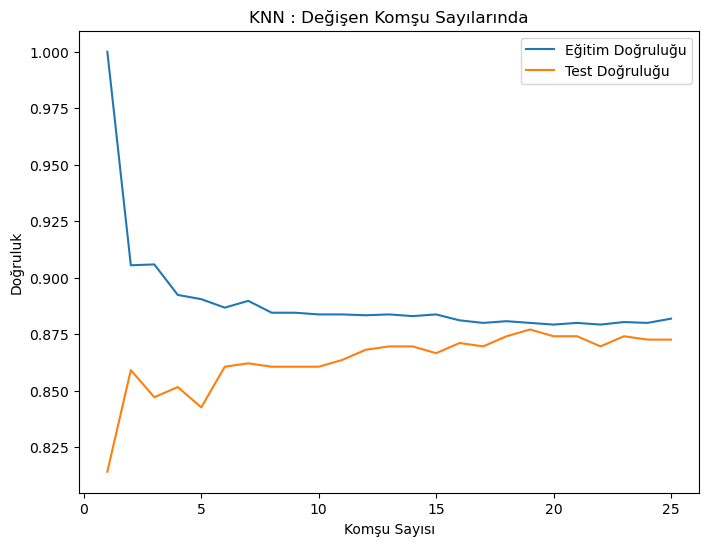

In [20]:
import matplotlib.pyplot as plt

train_accuracies = {}
test_accuracies = {}

neighbours = np.arange(1, 26)

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    train_accuracies[neighbour] = knn.score(X_train, y_train)
    test_accuracies[neighbour] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title('KNN : Değişen Komşu Sayılarında')
plt.plot(neighbours, train_accuracies.values(), label='Eğitim Doğruluğu')
plt.plot(neighbours, test_accuracies.values(), label='Test Doğruluğu')
plt.legend()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')

Bu kod, K-Nearest Neighbors (KNN) modelinin farklı komşu sayıları (k) için eğitim ve test doğruluklarını hesaplayarak görselleştiriyor. Kodun amacı, farklı komşu sayılarının modelin performansı üzerindeki etkisini incelemektir.

Adım Adım Açıklamalar:
KNN Modelinin Eğitilmesi ve Doğrulukların Hesaplanması:

train_accuracies = {}
test_accuracies = {}
neighbours = np.arange(1, 26)  # Komşu sayıları 1 ile 25 arasında

train_accuracies ve test_accuracies: Eğitim ve test verileri üzerindeki doğrulukları saklayacak boş sözlükler.
neighbours = np.arange(1, 26): Komşu sayıları 1'den 25'e kadar oluşturuluyor. Bu sayılar modelin komşu sayısı parametresini temsil eder. Her bir komşu sayısı için eğitim ve test doğruluğu hesaplanacak.

Her Komşu Sayısı İçin Modeli Eğitme ve Doğruluğu Hesaplama:
for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)  # KNN modelini oluşturuyor
    knn.fit(X_train, y_train)  # Modeli eğitim verisiyle eğitiyor
    train_accuracies[neighbour] = knn.score(X_train, y_train)  # Eğitim doğruluğu hesaplanıyor
    test_accuracies[neighbour] = knn.score(X_test, y_test)  # Test doğruluğu hesaplanıyor

Bu döngüde, 1'den 25'e kadar her komşu sayısı için KNN modeli oluşturuluyor ve eğitim verisi ile eğitiliyor.
knn.score(X_train, y_train): Modelin eğitim verisi üzerindeki doğruluğu hesaplanıyor.
knn.score(X_test, y_test): Modelin test verisi üzerindeki doğruluğu hesaplanıyor.
Bu doğruluklar, train_accuracies ve test_accuracies sözlüklerine kaydediliyor.

Doğrulukların Görselleştirilmesi:
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarlıyoruz
plt.title('KNN : Değişen Komşu Sayılarında')  # Grafik başlığı
plt.plot(neighbours, train_accuracies.values(), label='Eğitim Doğruluğu')  # Eğitim doğruluğunu çiziyor
plt.plot(neighbours, test_accuracies.values(), label='Test Doğruluğu')  # Test doğruluğunu çiziyor
plt.legend()  # Grafik üzerindeki etiketleri gösteriyor
plt.xlabel('Komşu Sayısı')  # X eksenine etiket
plt.ylabel('Doğruluk')  # Y eksenine etiket
plt.figure(figsize=(8, 6)): Grafik boyutunu ayarlıyoruz.
plt.title('KNN : Değişen Komşu Sayılarında'): Grafiğe bir başlık ekliyoruz.
plt.plot(neighbours, train_accuracies.values(), label='Eğitim Doğruluğu'): Komşu sayısına göre eğitim doğruluğunu çiziyor.
plt.plot(neighbours, test_accuracies.values(), label='Test Doğruluğu'): Komşu sayısına göre test doğruluğunu çiziyor.
plt.legend(): Grafikteki etiketleri gösteriyor.
plt.xlabel('Komşu Sayısı'): X eksenini "Komşu Sayısı" olarak etiketliyoruz.
plt.ylabel('Doğruluk'): Y eksenini "Doğruluk" olarak etiketliyoruz.
Sonuç:

Bu kodun sonucunda, komşu sayısının (k) modelin doğruluğu üzerindeki etkisini görselleştiren bir grafik elde edersiniz.
Eğitim doğruluğu genellikle komşu sayısı arttıkça artar çünkü model daha fazla komşuyu dikkate alır ve daha kesin sonuçlar elde etmeye çalışır.
Test doğruluğu ise başlangıçta artabilir, ancak çok yüksek komşu sayıları ile modelin overfitting (aşırı uyum) yapmaya başlaması olasılığı vardır. Yani, model eğitim verisine aşırı uyum sağlayarak test verisi üzerinde başarısını kaybedebilir.
Özet:
Komşu sayısı (k), KNN modelinin başarısı için önemli bir parametredir. Bu kod, farklı k değerleri ile modelin eğitim ve test doğruluklarını inceleyerek, doğru k değerinin bulunmasına yardımcı olur.


Az komşu sayısı (1-3) genellikle eğitim verilerine çok fazla uyum sağlar ve aşırı öğrenme (overfitting) sorunu yaratır. Bu durumda eğitim doğruluğu çok yüksek olsa da test doğruluğu düşük olabilir.
Yüksek komşu sayıları (yaklaşık 15 ve sonrası), modelin genelleme yeteneğini artırır, ancak eğitim doğruluğu daha düşük olabilir. Bu durum underfitting riskini azaltır.
Sonuç olarak, test doğruluğunun arttığı ve eğitim doğruluğunun stabilize olduğu komşu sayısı, model için en iyi genelleme performansını sağlar.

In [40]:
## Regression
#Regresyon, bir veya daha fazla bağımsız değişken kullanarak bir bağımlı değişkeni tahmin etmeye yönelik bir istatistiksel yöntemdir. Regresyon analizi, iki değişken arasındaki ilişkiyi modellemek için kullanılır ve genellikle sürekli veri üzerinde çalışır. Başka bir deyişle, bir değişkenin (bağımlı değişken) bir veya daha fazla başka değişkenin (bağımsız değişkenler) fonksiyonu olarak tahmin edilmesini amaçlar.

import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')
df_diabets.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_filtered

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
75,1,0,48,20,0,24.7,0.140,22,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
371,0,118,64,23,89,0.0,1.731,21,0


In [44]:
df_diabets.drop(df_filtered.index, inplace=True)
df_diabets

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
X = df_diabets.drop('glucose', axis=1).values #: Bu satırda, df_diabets DataFrame'inden glucose sütunu hariç diğer tüm sütunlar seçilir. drop('glucose', axis=1) ifadesi, glucose sütununu kaldırır. axis=1 parametresi, sütunları ifade eder (satırları ifade etmek için axis=0 kullanılır). Sonuçta X'te, glucose haricindeki bağımsız değişkenlerin verileri saklanır.
y = df_diabets['glucose'].values #Bu satırda ise glucose sütunu bağımlı değişken olarak seçilir. Bu, modelin tahmin etmeye çalışacağı hedef değişkendir.

(type(X), type(y))

(numpy.ndarray, numpy.ndarray)

In [ ]:
### Regression
 
#### Simple Lineer Regression: Tek input varsa  y = ax + b
#### multiple Lineer Regression: Birden fazla input varsa  y = ax + bx + cx + ..... + nx


**Lineer Regresyon**, istatistiksel bir modelleme tekniğidir ve bağımlı bir değişkenin (y) bağımsız değişkenler (x1, x2, ..., xn) ile olan doğrusal ilişkisini modellemeye çalışır. Genellikle, bir hedef değişkenin (y) tahmin edilmesinde kullanılır ve bu hedef değişkenin diğer değişkenlerle (özellikler) ilişkisini anlamak için çok yaygın olarak kullanılır.

### **Temel Kavramlar:**
- **Bağımlı Değişken (y):** Modelin tahmin etmeye çalıştığı hedef değeri temsil eder. Genellikle **sonuç değişkeni** olarak adlandırılır.
- **Bağımsız Değişkenler (x1, x2, ..., xn):** Modelin, bağımlı değişkeni tahmin etmek için kullandığı özelliklerdir. **Girdi değişkenleri** veya **özellikler** olarak da bilinir.
  
### **Lineer Regresyon Denklemi:**
Lineer regresyon, bir doğrusal ilişkiyi şu denkleme dayanarak modellemeyi amaçlar:
$$
\[
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
\]
$$
Buradaki bileşenler şunlardır:
- **\( y \)**: Bağımlı değişken (hedef değişken)
- **\( x_1, x_2, ..., x_n \)**: Bağımsız değişkenler
- **\( \beta_0 \)**: Y-intercept (başlangıç noktası veya sabit terim)
- **\( \beta_1, \beta_2, ..., \beta_n \)**: Bağımsız değişkenlerin katsayıları, yani her bir bağımsız değişkenin y'ye etkisi
- **\( \epsilon \)**: Hata terimi, modelin doğrusal ilişkiyi tam olarak yansıtamadığı kısımlarını temsil eder.

### **Lineer Regresyonun Amaçları:**
1. **Tahmin:** Bağımsız değişkenlerin değerlerine göre bağımlı değişkenin (y) değerini tahmin etmek.
2. **İlişkiyi Anlama:** Bağımsız değişkenlerin, bağımlı değişken üzerindeki etkilerini anlamak. Özellikle, her bir bağımsız değişkenin y'ye olan etkisini belirlemek için regresyon katsayıları (\( \beta_1, \beta_2, ..., \beta_n \)) kullanılır.

### **Lineer Regresyon Çeşitleri:**

1. **Basit Lineer Regresyon (Simple Linear Regression):**
   - **Tek bir bağımsız değişken** (x) ile bağımlı değişken (y) arasındaki ilişkiyi modelleyen regresyondur.
   - **Denklem:**
     $$
     \[
     y = \beta_0 + \beta_1 x + \epsilon
     \]
     $$
   - Örnek: Bir evin fiyatını tahmin etmek için sadece evin büyüklüğünü (m2) kullanmak.

2. **Çoklu Lineer Regresyon (Multiple Linear Regression):**
   - **Birden fazla bağımsız değişken** ile bağımlı değişken (y) arasındaki ilişkiyi modelleyen regresyondur.
   - **Denklem:**
     $$
     \[
     y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
     \]
     $$
   - Örnek: Bir evin fiyatını tahmin etmek için hem evin büyüklüğünü, hem oda sayısını, hem de yaşını kullanmak.

### **Modelin Kurulması:**
Modelin kurulmasında kullanılan temel adımlar şunlardır:
1. **Veri Toplama ve Hazırlama:** Girdi ve hedef değişkenler (bağımsız ve bağımlı değişkenler) toplanır ve temizlenir.
2. **Modelin Eğitilmesi (Fitting):** Veriler kullanılarak modelin katsayıları (\( \beta_0, \beta_1, ..., \beta_n \)) hesaplanır.
3. **Tahmin:** Yeni verilerle modelin tahmin yapması sağlanır.
4. **Değerlendirme:** Modelin doğruluğu çeşitli metriklerle (örneğin, **R^2**, **MSE** - Ortalama Kare Hata) değerlendirilir.

### **Modelin Performansını Ölçme:**
1. **R-kare (\( R^2 \))**: Modelin açıklayabildiği varyansın oranıdır. 0 ile 1 arasında bir değere sahiptir. 1, modelin tüm veriyi mükemmel bir şekilde açıkladığını gösterir.
   $$
   \[
   R^2 = 1 - \frac{\text{Toplam kareler hatası}}{\text{Toplam kareler toplamı}}
   \]
   $$
3. **Ortalama Kare Hata (MSE - Mean Squared Error)**: Tahminlerin gerçek değerlerden ne kadar uzak olduğunu ölçen bir metriktir.
   $$
   \[
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   \]
   $$
   Burada \( y_i \) gerçek değer, \( \hat{y}_i \) ise tahmin edilen değeri ifade eder.

### **Modelin Avantajları:**
- **Basitlik**: Lineer regresyon, karmaşık olmayan ve anlaşılması kolay bir modeldir.
- **Yorumlanabilirlik**: Katsayılar, her bir bağımsız değişkenin bağımlı değişken üzerindeki etkisini doğrudan gösterir.
- **Hızlı Eğitim**: Diğer karmaşık modellerle karşılaştırıldığında, eğitimi hızlıdır.

### **Modelin Sınırlamaları:**
- **Lineerlik Varsayımı**: Lineer regresyon, bağımlı ve bağımsız değişkenler arasındaki ilişkinin doğrusal olduğunu varsayar. Gerçek dünyada her zaman doğrusal ilişki olmayabilir.
- **Outlier'lara Duyarlılık**: Aykırı değerler (outliers), modelin performansını olumsuz etkileyebilir.
- **Çoklu Doğrusal Bağlantı (Multicollinearity)**: Bağımsız değişkenler arasında yüksek korelasyon varsa, modelin doğruluğu düşebilir.

### **Özet:**
**Lineer regresyon**, bağımsız değişkenler ile bağımlı değişken arasındaki ilişkiyi modellemek için kullanılan güçlü ve basit bir tekniktir. Özellikle ilişkilerin doğrusal olduğunu düşündüğümüzde ve modelin hızlıca eğitilmesi gerektiğinde etkili bir yöntemdir. Ancak, doğrusal olmayan ilişkiler ve aykırı değerlere duyarlı olduğundan, bu durumlar için daha gelişmiş modeller gerekebilir.

In [49]:
X_bmi = X[:, 4] #X[:, 4]: Bu komut, X veri setinin 4. sütununu seçer. 0 tabanlı indekslemeye dikkat edilmelidir. Bu satırda, BMI sütunu X veri setinin 4. sütunu olarak seçilmiştir.
(X_bmi.shape, y.shape)

((752,), (752,))

In [51]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

#: Bu komut, X_bmi'yi yeniden şekillendirir. -1 otomatik olarak satır sayısını belirler, ve 1 ise her satırda sadece 1 sütun olduğunu belirtir. X_bmi'nin daha önce seçilen sütunları şu an 2D bir array'e dönüştürülmüş olur.
#Bu işlem, makine öğrenmesi algoritmalarında kullanılan veri şekli gereksinimlerine uygun olarak X_bmi'yi yeniden yapılandırır.


#X_bmi.reshape(-1, 1): Bu satırda, X_bmi vektörü bir matris haline getirilir. Bu işlem, scikit-learn'ün doğrusal regresyon modeli gibi bazı algoritmaların 2D array (matris) girişi beklemesinden dolayı gereklidir. Burada:

# -1: Bu parametre, Python'a verinin boyutunu otomatik olarak hesaplaması talimatı verir.
# 1: Bu parametre, her bir örneği tek bir sütun halinde düzenler.
# sonuç olarak, X_bmi bir sütunlu bir vektöre dönüşür.



(752, 1)

`X_bmi`'yi yeniden şekillendirmek, özellikle **scikit-learn** gibi makine öğrenmesi kütüphanelerinin gereksinimlerinden kaynaklanmaktadır. Bu kütüphaneler, verilerin belirli bir formatta olmasını beklerler. İşte `X_bmi`'yi yeniden şekillendirmenin sebepleri:

### 1. **Veri Formatı Gereksinimleri**

- **scikit-learn** ve benzeri makine öğrenmesi kütüphaneleri, özellikleri (bağımsız değişkenler) **2D array** formatında alır. Yani, her bir örnek (satır) için bir veya birden fazla özellik (sütun) gerekir.
- Eğer `X_bmi` tek bir sütundan oluşuyorsa, bu veri `1D array` olarak kabul edilir, ancak scikit-learn 2D array bekler. Bu yüzden, verinin doğru şekilde işlenebilmesi için yeniden şekillendirilmesi gerekir.

### 2. **Tek Özellikli Veri (Single Feature Data)**

- `X_bmi` yalnızca tek bir özellik (sütun) içeriyor: `bmi` (Body Mass Index). Ancak bu özellik, makine öğrenmesi algoritmalarına **özelliklerin 2D formatta** verilmesini gerektirir.
- Bu nedenle, `X_bmi.reshape(-1, 1)` komutu ile **1D array**'i **2D array**'e dönüştürerek, her bir satırın tek bir özelliği olduğu bir array elde etmiş oluruz. Bu, scikit-learn için uygun bir format sağlar.

### 3. **Neden `-1` Kullanılır?**

- **`X_bmi.reshape(-1, 1)`** ifadesinde **`-1`** Python'a, satır sayısını otomatik olarak belirlemesini söyler. Yani, elimizdeki veri setinin satır sayısını hesaplayıp, her satırda bir özellik olacak şekilde 2D formata dönüştürür.
- **`1`** kısmı, her satırda yalnızca 1 özellik (BMI) olacağını belirtir.

### 4. **Sonuç**

- **`X_bmi`** başlangıçta tek bir sütunlu (1D array) bir veri seti olduğu için, scikit-learn'un beklediği formatta çalışabilmesi için **2D** formata çevrilmesi gerekir.
- Bu nedenle, `X_bmi.reshape(-1, 1)` komutuyla veriyi şekillendiriyoruz.

### Örnek:

Eğer `X_bmi` şöyleyse:
```
[1.8, 2.3, 3.1, 1.5, 2.9]
```

Bu, **1D array**'dir. `reshape(-1, 1)` komutuyla şuna dönüşür:
```
[[1.8],
 [2.3],
 [3.1],
 [1.5],
 [2.9]]
```

Bu şimdi, **2D array**'dir ve her bir satırda sadece 1 özellik vardır. Bu format, scikit-learn için geçerli ve doğru bir formattır.

### Sonuç:
**`reshape(-1, 1)`** işlemi, modelin doğru şekilde çalışabilmesi için gereklidir ve veriyi 2D formatta sunar, böylece makine öğrenmesi algoritmaları düzgün çalışır.

Text(0.5, 0, 'Body Mass Index')

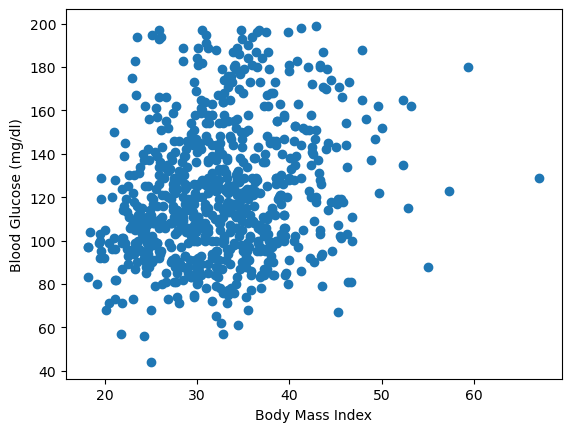

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi,y)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

Bu grafik, **Body Mass Index (BMI)** ile **Blood Glucose (Kan Şekeri)** arasındaki ilişkiyi göstermektedir. Her bir nokta, bir **BMI** değeri ile o değere karşılık gelen **kan şekeri** değerini temsil eder.

### Yorumlar:
1. **Veri Dağılımı**:
   - Grafik, **BMI** ve **kan şekeri (Blood Glucose)** arasındaki **dağılmayı** gösteriyor. Veriler, belirli bir doğrusal ilişkiyi takip etmiyor gibi görünüyor, çünkü dağılımda belirgin bir eğilim veya düz bir çizgi yok.
   - **BMI** ve **kan şekeri** arasında herhangi bir **doğrudan ilişki** olup olmadığına dair açık bir örüntü gözlemlenemiyor. Yani, BMI değeri arttıkça kan şekeri değeri artmıyor veya azalmıyor.

2. **Veri Sıkılığı**:
   - Verilerin çoğu, **BMI** değeri 20 ile 50 arasında yoğunlaşmış. Bu, genellikle insanların **orta derecede kilolu veya normal kilolu** olduğu bir aralık olabilir.
   - **Kan şekeri (Blood Glucose)** değerleri ise genellikle **80 ile 160 mg/dL** arasında değişiyor ve çoğu veri bu aralıkta yoğunlaşmış gibi görünüyor.

3. **Doğrusal Olmayan Dağılım**:
   - Bu grafik, **doğrusal regresyon** ile modellenecek bir ilişki olmadığına işaret edebilir. Çünkü, scatter plot'ta veri noktaları düzgün bir şekilde bir doğruyu takip etmiyor. Eğer doğrusal bir ilişki olsaydı, veriler belirli bir çizgi etrafında toplanırdı.
   - Bu, **çoklu doğrusal regresyon** veya farklı **regresyon teknikleri** (örneğin, polinom regresyon) kullanarak daha iyi bir modelleme yapılabileceğini düşündürebilir.

### Genel Değerlendirme:
- Grafik, BMI ve kan şekeri arasında **doğrudan bir ilişki olmadığını** veya ilişkinin daha karmaşık olabileceğini gösteriyor.
- Bu tür verilerde, basit doğrusal regresyon yerine daha **gelişmiş modelleme teknikleri** düşünülebilir.

Text(0.5, 0, 'Body Mass Index')

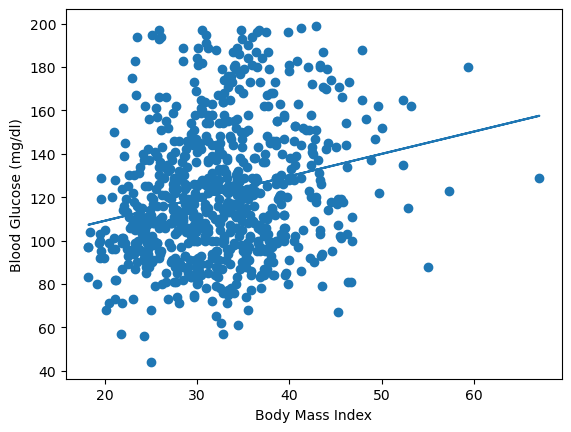

In [58]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg.fit(X_bmi, y)

predictions = model_reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

## Doğrusal Regresyon Modeli ve Görselleştirme

Bu kod, **doğrusal regresyon (Linear Regression)** modeli kullanarak **Body Mass Index (BMI)** ile **Blood Glucose (Kan Şekeri)** arasındaki ilişkiyi modellemektedir. Ayrıca, modelin tahmin ettiği değerler ile gerçek veriler arasındaki ilişkiyi görselleştirmektedir.

### Adım Adım Açıklamalar:

1. **Modeli Oluşturma ve Eğitme**:
   ```python
   from sklearn.linear_model import LinearRegression

   model_reg = LinearRegression()  # LinearRegression modelini oluşturuyoruz
   model_reg.fit(X_bmi, y)  # Modeli eğitiyoruz
   ```

   - **`LinearRegression()`**: Bu, **doğrusal regresyon modelini** oluşturur. Doğrusal regresyon, bağımsız değişken (bu durumda **BMI**) ile bağımlı değişken (bu durumda **kan şekeri**) arasındaki doğrusal ilişkiyi modellemeye çalışır.
   - **`model_reg.fit(X_bmi, y)`**: Bu satırda, model **BMI (X_bmi)** ve **kan şekeri (y)** verileri ile eğitilir. Model, bu verilerle **doğrusal ilişkisini** öğrenir.

2. **Tahmin Yapma**:
   ```python
   predictions = model_reg.predict(X_bmi)  # Modelin tahmin ettiği değerler
   ```

   - **`model_reg.predict(X_bmi)`**: Bu komut, eğitim verisi üzerinden öğrenilen doğrusal ilişkiyi kullanarak **BMI** değerlerine karşılık gelen **kan şekeri tahminleri** yapar. Yani, her bir BMI değeri için modelin tahmin ettiği kan şekeri değeri hesaplanır ve bu değerler **`predictions`** adlı değişkende saklanır.

3. **Veri ve Tahminlerin Görselleştirilmesi**:
   ```python
   plt.scatter(X_bmi, y)  # Gerçek veriyi (scatter plot) çiziyoruz
   plt.plot(X_bmi, predictions)  # Modelin tahmin ettiği doğrusal çizgiyi çiziyoruz
   plt.ylabel('Blood Glucose (mg/dl)')  # Y eksenine etiket ekliyoruz
   plt.xlabel('Body Mass Index')  # X eksenine etiket ekliyoruz
   ```

   - **`plt.scatter(X_bmi, y)`**: Bu satır, **gerçek veri noktalarını** scatter plot olarak çizer. Her nokta, bir **BMI** değeri ve ona karşılık gelen **kan şekeri** (y) değeri arasındaki ilişkiyi temsil eder.
   - **`plt.plot(X_bmi, predictions)`**: Bu satırda, modelin tahmin ettiği değerleri bir **doğrusal çizgi** olarak çizer. Bu çizgi, modelin **doğrusal regresyon** sonucunda öğrendiği ilişkiyi temsil eder ve **BMI** ile **kan şekeri** arasındaki tahmin edilen doğrusal ilişkiyi gösterir.
   - **`plt.ylabel('Blood Glucose (mg/dl)')`**: Y eksenine **kan şekeri (Blood Glucose)** etiketini ekler.
   - **`plt.xlabel('Body Mass Index')`**: X eksenine **vücut kitle indeksi (BMI)** etiketini ekler.

---

### Sonuç:

Bu görselleştirme, **BMI** ile **kan şekeri** arasındaki doğrusal ilişkiyi gösterir:
- **Scatter plot**: Gerçek veri noktalarını gösterir.
- **Doğrusal çizgi**: Modelin, verilerle öğrendiği doğrusal ilişkiyi temsil eder.

Eğer doğru tahmin yapılmışsa, scatter plot üzerindeki noktalar genellikle **doğrusal çizgiye** yakın bir şekilde dağılır. Bu, modelin doğru bir şekilde verileri öğrendiği ve test ettiği anlamına gelir.

Bu grafik, **Body Mass Index (BMI)** ile **Blood Glucose (kan şekeri)** arasındaki ilişkiyi gösteren bir **doğrusal regresyon (Linear Regression)** modelinin görselleştirmesidir.

### Yorumlar:

1. **Veri Dağılımı (Scatter Plot)**:
   - Grafik üzerinde **mavi noktalar** (scatter plot), her bir BMI değerine karşılık gelen **kan şekeri** değerlerini temsil ediyor.
   - **BMI** ile **kan şekeri** arasında belirgin bir **doğrusal ilişki** gözlemleniyor. Bu, BMI arttıkça kan şekerinin de arttığını gösteren bir eğilim olduğunu ima eder. Ancak, doğrusal ilişki çok belirgin olmasa da, genel olarak bir **yükselme** gözlemleniyor.

2. **Doğrusal Regresyon Doğru Çizgisi**:
   - **Doğrusal regresyon doğrusu**, eğitim sırasında modelin öğrendiği ilişkiyi temsil eder ve **mavi noktalara** en iyi uyum sağlayacak şekilde çizilmiştir.
   - Bu doğru, **BMI** ile **kan şekeri** arasındaki **en iyi doğrusal ilişkiyi** modellemeye çalışmaktadır. Modelin çizdiği doğru, verilerin genel eğilimini yakalamayı amaçlar.

3. **Doğrusal Regresyon Sonucu**:
   - **Regresyon doğrusu**, verilerin büyük kısmının biraz dışında kalan noktalar olsa da, çoğunluğun bir kısmını **iyi temsil ediyor**. 
   - **Doğrusal ilişkideki sapmalar**: Modelin çizdiği doğrusal çizgi, her bir veri noktasına mükemmel uymaz. Bu, regresyon modelinin **kesin bir doğrusal ilişki olmadığını** ancak genel bir eğilim gösterdiğini işaret eder.

4. **Kan Şekeri ile BMI Arasındaki İlişki**:
   - Grafik, **kan şekeri** ile **BMI** arasında zayıf ama belirgin bir ilişki olduğunu gösteriyor. Yüksek BMI değerlerine sahip kişilerin genellikle **daha yüksek kan şekeri** seviyelerine sahip olduğunu gözlemleyebiliriz.
   
---

### Genel Değerlendirme:
- Bu **doğrusal regresyon modeli**, BMI ve kan şekeri arasındaki ilişkiyi açıklamaya çalışıyor, ancak modelin mükemmel olduğunu söylemek zor. Çünkü **verilerdeki bazı noktalar** doğrusal çizgiden sapıyor ve doğrusal ilişkiyi tam anlamıyla temsil etmiyor.
- **Veri setindeki varyasyon** ve modelin **genel doğrusal ilişkisi** göz önünde bulundurulduğunda, modelin performansı daha iyi değerlendirmek için **diğer regresyon teknikleri** (örneğin, polinom regresyon) ile karşılaştırılabilir.

y = ax + b 

a = slope
b = intercept

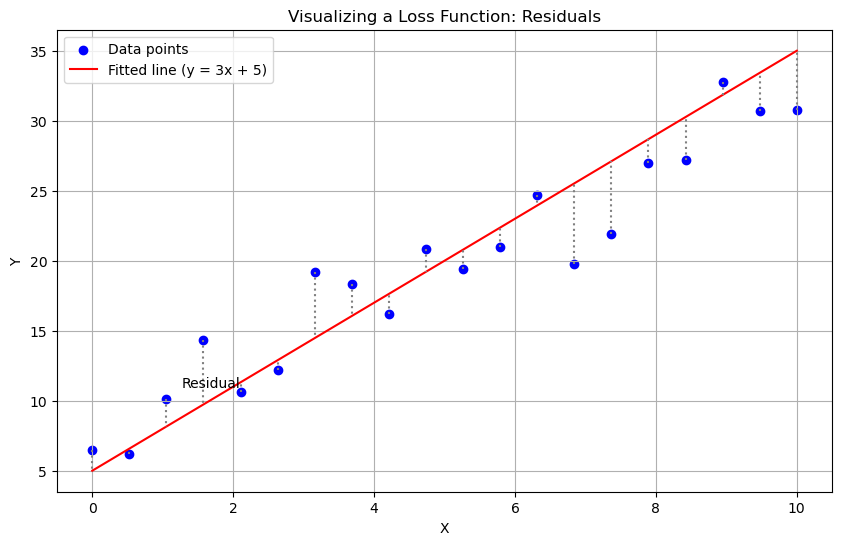

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the scatter plot
np.random.seed(42)
X = np.linspace(0, 10, 20)
Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))

# Fit a line (y = mx + c) manually
m = 3  # slope
c = 5  # intercept
Y_fit = m * X + c

# Calculate residuals (vertical distances between points and the line)
residuals = Y - Y_fit

# Plot the scatter plot and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')

# Add vertical lines to represent residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_fit[i]], color='gray', linestyle='dotted')
    if i == 4:  # Add a label to one residual line
        plt.text(X[i], (Y[i] + Y_fit[i]) / 2, 'Residual', color='black', fontsize=10, ha='right')

# Customize the plot
plt.title('Visualizing a Loss Function: Residuals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Residuals Nedir?

**Residuals (Artıklar)**, modelin tahmin ettiği değerler ile gerçek gözlem değerleri arasındaki farktır. Residuals, modelin ne kadar doğru çalıştığını anlamamıza yardımcı olan bir metriktir. 

**Residuals** şu şekilde hesaplanır:
$$
\[
\text{Residual} = y_{\text{gerçek}} - y_{\text{tahmin}}
\]
$$
- \( y_{\text{gerçek}} \): Gerçek gözlem değeri
- \( y_{\text{tahmin}} \): Modelin tahmin ettiği değer

Residuals, modelin her bir gözlem için ne kadar hata yaptığını gösterir. Eğer residual değeri küçükse, modelin tahminleri gerçek değerlere yakın demektir. Eğer residual değeri büyükse, modelin tahminleri gerçek değerlerden uzak demektir.

### Residuals'ın Özellikleri

1. **Hata Terimleri**: Modelin tahmin ettiği değer ile gerçek değer arasındaki farklar, modelin hata terimleridir.
2. **Denge**: Lineer regresyon modelinde, tüm residualların ortalaması sıfırdır. Bu, modelin tahminlerinin doğrusal bir şekilde veriye uyduğu anlamına gelir.
3. **Normal Dağılım**: İdeal olarak residuallar, **normal dağılım** göstermelidir. Bu, modelin doğruluğunu ve tahminlerinin güvenilirliğini gösteren önemli bir özelliktir.

### Residuals'ın Grafiksel Analizi

Residuals'ı görsel olarak analiz etmek, modelin doğruluğunu değerlendirmek için kullanışlıdır. Aşağıda yaygın kullanılan bazı grafikler bulunmaktadır:

1. **Residuals vs. Fitted Values**: Bu grafik, modelin tahmin ettiği değerlerle residualların karşılaştırılmasıdır. Eğer model doğru çalışıyorsa, residualların rastgele dağılacağını ve bir desen oluşturmayacağını görmelisiniz.
2. **Histogram**: Residuals'ın histogramı, verilerin normal dağılıp dağılmadığını görmek için kullanılır. Eğer histogram düzgün ve çan şeklinde ise, residualların normal dağıldığını söyleyebiliriz.

---

### Özet

- **Lineer regresyon**, bağımsız değişkenlerle bağımlı değişken arasındaki doğrusal ilişkiyi modelleyen bir tekniktir.
- **Residuals**, modelin tahmin ettiği değer ile gerçek değer arasındaki farktır ve modelin hatasını ölçer.
- Residuals'ın görsel analizi, modelin doğruluğunu değerlendirmek için kullanılır.

Bu kod, **doğrusal regresyon** modelinin nasıl çalıştığını ve **residuals (kalanlar)** kavramını görselleştirir. Aşağıda adım adım açıklamalarını bulabilirsiniz:

### Adım Adım Açıklamalar:

1. **Veri Oluşturma**:
   ```python
   np.random.seed(42)
   X = np.linspace(0, 10, 20)
   Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))
   ```
   - **`np.linspace(0, 10, 20)`**: Bu komut, **0 ile 10 arasında** eşit aralıklı 20 sayı üretir. Bu sayılar **bağımsız değişken (X)** olacaktır.
   - **`Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))`**: Bu satırda, **Y** değerleri, **y = 3x + 5** doğrusal ilişkisiyle oluşturulmuştur ve **normal dağılımdan (Gaussian noise)** eklenen rastgele hata ile bozulmuştur. Bu hatalar, gerçek dünyadaki verilere benzer rastgelelikeyi simüle eder. 
     - **`np.random.normal(0, 3, size=len(X))`**: Bu, **Y** verilerine eklenen rastgele **hataları** (residuals) temsil eder. Bu hatalar, ortalaması 0 ve standart sapması 3 olan bir normal dağılımdan seçilmiştir.

2. **Doğrusal Fit (En İyi Uyumu)**:
   ```python
   m = 3  # slope
   c = 5  # intercept
   Y_fit = m * X + c
   ```
   - **`m = 3`**: Bu, **doğrunun eğimi (slope)** yani **a**'yı temsil eder. Eğim, bağımsız değişkenin bir birimlik değişimiyle bağımlı değişkende beklenen değişimi gösterir.
   - **`c = 5`**: Bu, **doğrunun kesişim noktası (intercept)** yani **b**'yi temsil eder. Yani, **X = 0** olduğunda, **Y**'nin alacağı değeri belirtir.
   - **`Y_fit = m * X + c`**: Bu, **X** değerleri için **doğrusal modelin tahmin ettiği Y değerlerini** hesaplar. Bu doğrusal çizgi, `y = 3x + 5` fonksiyonunun sonucudur.

3. **Residuals (Kalanlar) Hesaplama**:
   ```python
   residuals = Y - Y_fit
   ```
   - **`residuals = Y - Y_fit`**: Burada, **residuals** (kalanlar) her bir veri noktasının doğrusal modelden ne kadar saptığını temsil eder. **Gerçek Y** değerlerinden (measured values) **fitted Y** değerleri (modelin tahmin ettiği değerler) çıkarılır. 
   - Bu, her bir veri noktasının **modelin doğrusal çizgisinden ne kadar sapma gösterdiğini** ölçen **dikey mesafeler** (vertical distances) olarak yorumlanabilir.

4. **Grafik Çizimi**:
   ```python
   plt.figure(figsize=(10, 6))
   plt.scatter(X, Y, color='blue', label='Data points')
   plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')
   ```
   - **`plt.scatter(X, Y, color='blue', label='Data points')`**: Gerçek veriler, **mavi noktalar** olarak scatter plot ile çizilir.
   - **`plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')`**: Modelin çizdiği **doğrusal fit çizgisi** (kırmızı) çizilir. Bu, **y = 3x + 5** formülüne göre tahmin edilen doğrusal ilişkidir.

5. **Residuals (Kalanlar) Görselleştirme**:
   ```python
   for i in range(len(X)):
       plt.plot([X[i], X[i]], [Y[i], Y_fit[i]], color='gray', linestyle='dotted')
       if i == 4:
           plt.text(X[i], (Y[i] + Y_fit[i]) / 2, 'Residual', color='black', fontsize=10, ha='right')
   ```
   - Bu döngü her bir veri noktası için bir **dikey nokta çizgisi** çizer. Her çizgi, **veri noktası ile doğrusal fit çizgisi arasındaki mesafeyi** (residual) gösterir.
   - **`plt.text(X[i], (Y[i] + Y_fit[i]) / 2, 'Residual', color='black', fontsize=10, ha='right')`**: Bu satır, **4. veri noktasına** ait **residual**'ı etiketler. Yani, bu etiketle, bir residual çizgisinin yanında **"Residual"** yazısı gösterilir.

6. **Grafik Başlık ve Etiketler**:
   ```python
   plt.title('Visualizing a Loss Function: Residuals')
   plt.xlabel('X')
   plt.ylabel('Y')
   plt.legend()
   plt.grid(True)
   ```
   - **Başlık, etiketler ve ızgara**: Grafiğe başlık eklenir, eksenler etiketlenir ve **grid** (ızgara) eklenir. Ayrıca, scatter plot ve doğrusal fit çizgisinin neyi temsil ettiği belirtmek için **legend** (açıklama) eklenir.

---

### Sonuç:

Bu grafik, **doğrusal regresyon** modelinin nasıl çalıştığını ve **residuals (kalanlar)** kavramını açıkça görselleştirir. Grafik üzerinde:
- **Mavi noktalar**, gerçek veri noktalarını gösterir.
- **Kırmızı doğru**, doğrusal regresyon modelinin tahmin ettiği ilişkiyi gösterir.
- **Dikey çizgiler (residuals)**, her bir veri noktasının doğrusal fit çizgisine olan **mesafelerini** (sapmalarını) gösterir.
  
Bu görselleştirme, modelin hatalarını ve modelin tahminlerine ne kadar yakın olduğunu değerlendirmek için önemlidir. **Residuals** (kalanlar) ideal olarak rastgele dağılmalı ve belirgin bir desen göstermemelidir. Eğer kalanlar belirli bir desen oluşturuyorsa, bu modelin **yetersiz olduğunu** ve başka bir modelin daha uygun olabileceğini gösterebilir.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)


X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values


X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, 
                                                   random_state=42)


model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)

#Diyabet veri kümesindeki tüm özellikleri kullanarak kan şekeri seviyelerini tahmin etmek için doğrusal regresyon gerçekleştirelim. 
#LinearRegression'ı sklearn-dot-linear_model'den içe aktarıyoruz. Ardından verileri eğitim ve test kümelerine ayırıyoruz, modeli 
#örneklendiriyoruz, eğitim kümesine yerleştiriyoruz ve test kümesinde tahmin ediyoruz. 
#Scikit-learn'deki doğrusal regresyonun kaputun altında OLS gerçekleştirdiğini unutmayın. 


Bu kod, **doğrusal regresyon (Linear Regression)** kullanarak **diabetes veri kümesi** üzerinde bir model oluşturuyor ve bu modelin **kan şekeri seviyelerini** tahmin etmesini sağlıyor. Aşağıda, kodun her adımını açıklayarak detaylı bir şekilde açıklayalım.

---

### 1. **Veri Setini Yükleme ve Filtreleme**

```python
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)
```

- **`pd.read_csv('data/diabetes_clean.csv')`**: Bu satır, **diabetes_clean.csv** dosyasındaki verileri **pandas DataFrame** olarak yükler. Bu veri seti, diyabetle ilgili çeşitli özellikleri içeriyor.
  
- **`df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]`**: Burada, **BMI (Body Mass Index)** veya **Glucose (kan şekeri)** değeri sıfır olan satırlar **df_filtered** veri setine dahil edilir. Bu tür veriler genellikle hatalı veya eksik olduğu için genellikle temizlenir.

- **`df_diabets.drop(df_filtered.index, inplace=True)`**: Bu satır, **df_filtered** veri setindeki satırları **df_diabets** veri setinden kaldırır. Yani, **BMI** veya **Glucose** değeri sıfır olan satırlar veri setinden çıkarılır.

---

### 2. **Bağımsız ve Bağımlı Değişkenlerin Seçilmesi**

```python
X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values
```

- **`X = df_diabets.drop('glucose', axis=1).values`**: Bu satır, veri setindeki **'glucose'** sütununu hariç tutarak, geri kalan tüm sütunları **bağımsız değişkenler (X)** olarak seçer. **`axis=1`** parametresi, sütun bazında işlem yapıldığını belirtir. **`.values`** komutu, **pandas DataFrame**'ini bir **NumPy array**'ine dönüştürür.
  
- **`y = df_diabets['glucose'].values`**: Bu satırda ise **'glucose'** sütunu, **bağımlı değişken (y)** olarak seçilir. Bu, modelin tahmin etmeye çalışacağı hedef değişkendir. **`.values`** ile **glucose** sütunu NumPy array'ine dönüştürülür.

---

### 3. **Veriyi Eğitim ve Test Setlerine Ayırma**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **`train_test_split(X, y, test_size=0.2, random_state=42)`**: Bu fonksiyon, veri setini **eğitim** ve **test** olmak üzere ikiye ayırır. **test_size=0.2** parametresi, verilerin %20'inin test seti için kullanılacağını belirtir, geri kalan %80 ise eğitim seti için ayrılır.
  - **`random_state=42`**: Bu parametre, verilerin her seferinde aynı şekilde bölünmesini sağlar. Bu, deneylerin tekrarlanabilir olmasını sağlar.

---

### 4. **Modeli Eğitme (Fit)**

```python
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
```

- **`LinearRegression()`**: Bu satır, **doğrusal regresyon modelini** oluşturur. Doğrusal regresyon, **bağımsız değişkenlerin** (bu durumda BMI, yaş, vb.) **bağımlı değişkenle** (kan şekeri) doğrusal ilişkisini modellemeye çalışır.
  
- **`model_reg.fit(X_train, y_train)`**: Bu satır, modelin **eğitim verisi** üzerinde öğrenmesini sağlar. Burada **X_train** (özellikler) ve **y_train** (etiketler) kullanılarak modelin doğrusal ilişkisi öğrenilir.

---

### 5. **Tahmin Yapma**

```python
y_pred = model_reg.predict(X_test)
```

- **`model_reg.predict(X_test)`**: Bu satır, eğitim sırasında öğrenilen doğrusal ilişkiyi kullanarak **test verisi** üzerindeki **kan şekeri seviyelerini** tahmin eder. Tahmin edilen değerler **y_pred** değişkeninde saklanır.

---

### 6. **Doğrusal Regresyon ve OLS (Ordinary Least Squares)**

Kodda, **sklearn.linear_model.LinearRegression** kullanılarak doğrusal regresyon gerçekleştirilmiştir. **OLS (Ordinary Least Squares)**, doğrusal regresyonun temel algoritmalarından biridir ve **sklearn LinearRegression**'ın altında çalışmaktadır. **OLS**'in amacı, **doğrunun** **en iyi uyumunu** bulmak, yani doğrusal modelin **kalanların karelerinin toplamını minimize etmesi**.

- **OLS'nin Temel Adımları**:
  - **Modelin doğruluğunu ölçme**: Kalanlar (residuals), her bir veri noktasının tahmin edilen değer ile gerçek değer arasındaki farktır. **OLS**'in amacı bu kalanların karelerinin toplamını en aza indirgemektir.
  - **Eğim (Slope) ve Y-kesişim (Intercept)**: Bu, modelin öğrendiği parametrelerdir. **OLS** yöntemi, doğrusal ilişkinin en uygun **eğim (m)** ve **intercept (b)** değerlerini hesaplar.

---

### 7. **Özet**

- Bu kod, **doğrusal regresyon** kullanarak, **diabetes veri kümesindeki** bağımsız değişkenlerle **kan şekeri seviyelerini** tahmin eder. 
- **Eğitim ve test setlerine ayırma**, **modeli eğitme**, **tahmin yapma** adımlarını içerir.
- **OLS** (Ordinary Least Squares) algoritması, **scikit-learn LinearRegression**'ın altında kullanılarak, **kalanların karelerinin toplamını minimize etmek** amacıyla en uygun doğrusal ilişkiyi öğrenir.

Bu adımlar, **doğrusal regresyon** modelinin temel işleyişini anlamanızı sağlar ve **sklearn** kullanarak modelinizi kolayca eğitmenizi mümkün kılar.

In [74]:
model_reg.score(X_test, y_test)


0.3282802627263198

In [76]:
model_reg.coef_

array([-0.32654116,  0.14686555, -0.27590315,  0.08606826,  0.36160446,
        1.8382773 ,  0.42185562, 25.08247323])

In [78]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

25.695203763480208

Bu kod, **doğrusal regresyon modeli**nin performansını değerlendirmek için farklı metrikleri hesaplamaktadır. Şimdi, her bir satırı detaylı olarak açıklayalım:

### 1. **Modelin R^2 Skoru (Determination Coefficient)**

```python
model_reg.score(X_test, y_test)
```

- **`model_reg.score(X_test, y_test)`**: Bu satır, modelin **R² skorunu** (determination coefficient) hesaplar. R², modelin ne kadarını doğru tahmin ettiğini gösteren bir **başarı metriği**dir.
  - **R² Skoru** şu şekilde hesaplanır:
    $$
    \[
    R^2 = 1 - \frac{\sum{(y_{\text{gerçek}} - y_{\text{tahmin}})^2}}{\sum{(y_{\text{gerçek}} - \overline{y_{\text{gerçek}}})^2}}
    \]
    $$
    - **\(y_{\text{gerçek}}\)**: Gerçek kan şekeri (test setindeki değerler).
    - **\(y_{\text{tahmin}}\)**: Modelin tahmin ettiği değerler.
    - **\(\overline{y_{\text{gerçek}}}\)**: Gerçek değerlerin ortalaması.

- **Yorum**:
  - **R² skoru**, modelin **veri setindeki değişkenliği ne kadar açıkladığını** gösterir. Değer 0 ile 1 arasında olur:
    - **R² = 1**: Model, tüm veriyi doğru tahmin eder.
    - **R² = 0**: Model, veri setindeki değişkenliği hiç açıklayamaz.
    - **Negatif R²**: Model, veriyi açıklamak için bir ortalama tahmin yapmaktan daha kötü performans gösteriyor olabilir.

### 2. **Modelin Koefisiyentleri (Modelin Öğrendiği Eğim Değerleri)**

```python
model_reg.coef_
```

- **`model_reg.coef_`**: Bu satır, **doğrusal regresyon modelinin öğrendiği koefisiyentleri** döndürür.
  - **Koefisiyentler** (veya eğim) modelin öğrenmesi gereken parametrelerdir ve bağımsız değişkenlerin (örneğin, BMI) bağımlı değişken üzerindeki **etkisini** gösterir.
  - Örneğin, bir koefisiyent **3** ise, bağımsız değişkendeki her bir birim artış, bağımlı değişkende (kan şekeri) **3 birimlik bir değişim**e yol açacaktır.
  - **Intercept (b)**, modelin **y-eksenini kestiği yer**i belirtir. Bu, bağımsız değişkenlerin **0 olduğu durumda** modelin tahmin ettiği değeri gösterir.

### 3. **Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)**

```python
from sklearn.metrics import mean_squared_error

root_mean_squared_error(y_test, y_pred)
```

- **`root_mean_squared_error(y_test, y_pred)`**: Bu satırda, **Kök Ortalama Kare Hatası (RMSE)** hesaplanmak isteniyor ancak aslında doğru bir şekilde **`mean_squared_error`** fonksiyonu kullanılmalı. Şu an `root_mean_squared_error` fonksiyonu **`sklearn.metrics`** modülünde yer almıyor. Doğru kod şu şekilde olmalıdır:

  ```python
  from sklearn.metrics import mean_squared_error
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  ```

  - **RMSE**, modelin tahminlerinin ne kadar hata yaptığını ölçen bir **hata metriği**dir. Matematiksel olarak şu şekilde hesaplanır:
    $$
    \[
    RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_{\text{gerçek}, i} - y_{\text{tahmin}, i})^2}
    \]
    $$
    - **\(y_{\text{gerçek}}\)**: Test verisindeki gerçek değerler.
    - **\(y_{\text{tahmin}}\)**: Modelin test verisi üzerinde yaptığı tahminler.

- **Yorum**:
  - **RMSE** değeri ne kadar küçükse, modelin tahminleri o kadar doğru demektir. 
  - **RMSE = 0**: Modelin tahminleri mükemmel ve tüm veriyi doğru tahmin ediyor.
  - **Büyük RMSE**: Modelin tahminlerinde büyük hatalar olduğunu gösterir.

---

### Özet:

- **`model_reg.score(X_test, y_test)`**: Modelin **R²** skorunu hesaplar, modelin test setindeki doğruluğunu ölçer.
- **`model_reg.coef_`**: Modelin **koefisiyentlerini** döndürür, yani bağımsız değişkenlerin bağımlı değişken üzerindeki etkilerini gösterir.
- **`mean_squared_error` ile hesaplanan **RMSE**, modelin **hata oranını** ölçen bir metriktir ve küçük olması daha iyi tahminleri gösterir.

Bu metrikler, modelin **performansını** değerlendirmede önemli araçlardır ve modelin **tahmin doğruluğunu** anlamanıza yardımcı olur.

14. HAFTA

#Cross-validation

#k kumeye bolersiniz 

Cross-validation, bir modelin genelleme gücünü değerlendirmek için kullanılan bir tekniktir. Bir modelin doğruluğunu değerlendirirken, modelin eğitim verileri üzerinde aşırı öğrenme (overfitting) yapıp yapmadığını kontrol etmek önemlidir. Cross-validation, bu aşırı öğrenme sorununu ortadan kaldırarak daha sağlam ve güvenilir bir model değerlendirmesi yapmamıza yardımcı olur.

Çapraz doğrulama, genellikle veriyi daha küçük parçalara bölme (folds) ve her parça üzerinde modelin doğruluğunu test etme işlemini içerir. Çapraz doğrulama sayesinde, verilerin her kısmı hem eğitim hem de test için kullanılarak modelin performansı daha güvenilir bir şekilde ölçülür.

In [13]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

kf = KFold(n_splits=6, shuffle=True, random_state=42)
model_reg = LinearRegression()

cv_results = cross_val_score(model_reg, X, y, cv=kf)
cv_results


array([0.31239631, 0.39992274, 0.38698031, 0.19731639, 0.32317527,
       0.3320924 ])

Çapraz doğrulama sonucu modelin her katlamada (fold) test veri seti üzerinde ne kadar başarılı olduğunu gösterir.
Burada her bir değer, farklı bir veri katlaması (fold) üzerinde elde edilen doğruluk skorlarını temsil eder.
Modelin doğruluğu her katlamada farklılık gösteriyor. Bu, modelin bazı veri kümeleri üzerinde daha iyi performans gösterdiğini ve diğerlerinde daha düşük performans gösterdiğini işaret eder.
Skorların yüksekliği ve alçaklığı, modelin bazı veri setlerinde aşırı uyum (overfitting) yapıp yapmadığı hakkında ipuçları verebilir.
Elde edilen skorlar, modelin iyileştirilmesi gereken yönleri ve hangi veri setlerinde daha iyi çalıştığı konusunda bilgi sağlar. Örneğin, ilk iki katlamadaki yüksek skorlar (0.3999 ve 0.3869) modelin bu katlamalarda daha iyi performans gösterdiğini, son iki katlamadaki daha düşük skorlar ise modelin bu veri alt kümelerinde zayıf performans sergilediğini göstermektedir.

Sonuç olarak, modelin doğruluk skorları genellikle ortalama olarak 0.3 civarındadır, bu da modelin tahminlerinin iyileştirilmesi gerektiğini gösteriyor. Bu iyileştirmeler, modelin özellikleri veya parametrelerinin ayarlanmasıyla yapılabilir.

Bu kod, **cross-validation (çapraz doğrulama)** kullanarak **doğrusal regresyon** modelinin performansını değerlendirir. Aşağıda her bir satırı adım adım açıklayarak anlatacağım.

### Adım Adım Açıklamalar:

1. **Veri Yükleme ve Temizleme**:
   ```python
   df_diabets = pd.read_csv('data/diabetes_clean.csv')

   df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
   df_diabets.drop(df_filtered.index, inplace=True)
   ```
   - **`df_diabets = pd.read_csv('data/diabetes_clean.csv')`**: **diabetes_clean.csv** dosyasındaki veriler pandas **DataFrame** formatında yükleniyor.
   - **`df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]`**: **BMI** veya **Glucose** değerlerinin sıfır olduğu satırlar **df_filtered** veri setine dahil edilir. Bu tür veriler genellikle eksik veya hatalı olduğundan çıkarılır.
   - **`df_diabets.drop(df_filtered.index, inplace=True)`**: **df_filtered** veri setinde bulunan satırlar, **df_diabets** veri setinden çıkarılır. Yani, **BMI** veya **Glucose** değeri sıfır olan satırlar veri setinden temizlenir.

2. **Bağımsız ve Bağımlı Değişkenlerin Seçilmesi**:
   ```python
   X = df_diabets.drop('glucose', axis=1).values
   y = df_diabets['glucose'].values
   ```
   - **`X = df_diabets.drop('glucose', axis=1).values`**: Bu satır, veri setindeki **'glucose'** sütununu çıkararak tüm diğer sütunları **bağımsız değişkenler** (özellikler) olarak seçer.
   - **`y = df_diabets['glucose'].values`**: Bu satırda ise **'glucose'** sütunu, **bağımlı değişken** (kan şekeri) olarak seçilir.

3. **K-Fold Cross-Validation**:
   ```python
   kf = KFold(n_splits=6, shuffle=True, random_state=42)
   ```
   - **`KFold(n_splits=6, shuffle=True, random_state=42)`**: **KFold** sınıfı, **veriyi k katmana ayırmak** için kullanılır. Bu örnekte:
     - **`n_splits=6`**: Veri seti 6 katmana ayrılır. Yani, 6 katmanlı çapraz doğrulama yapılır.
     - **`shuffle=True`**: Verinin her katman için **karıştırılması** sağlanır. Bu, her fold'un verilerin rastgele bir alt kümesini içermesini sağlar.
     - **`random_state=42`**: Verinin karıştırılmasında tutarlılığı sağlamak için sabit bir rastgelelikik tohumu kullanılır. Bu, çapraz doğrulamanın her seferinde aynı şekilde yapılmasını sağlar.

4. **Modelin Eğitilmesi ve Çapraz Doğrulama**:
   ```python
   model_reg = LinearRegression()

   cv_results = cross_val_score(model_reg, X, y, cv=kf)
   ```
   - **`model_reg = LinearRegression()`**: **doğrusal regresyon modeli** oluşturuluyor.
   - **`cross_val_score(model_reg, X, y, cv=kf)`**:
     - **`cross_val_score`** fonksiyonu, **model_reg**'i **X** (özellikler) ve **y** (etiketler) üzerinde **k-fold çapraz doğrulama** ile değerlendirir.
     - **`cv=kf`**: Burada, **KFold** nesnesi, veriyi 6 katmana ayırarak çapraz doğrulama yapacaktır.
     - Bu fonksiyon, her **fold** için modelin **doğruluğunu** hesaplar ve sonuçları döndürür.

### Cross-Validation (Çapraz Doğrulama) Nasıl Çalışır?
Çapraz doğrulama, modelin **genelleme yeteneğini** test etmek için kullanılır. Bu süreç, veriyi **k** eşit parçaya ayırır (burada 6 katman kullanılıyor). Model, her defasında farklı bir katmanı **test seti** olarak kullanırken, kalan k-1 katmanı **eğitim seti** olarak kullanır. Bu işlem k kez tekrarlanır ve her bir fold için **doğruluk** hesaplanır.

### 5. **Sonuçlar**
```python
cv_results
```
- **`cv_results`**: Bu değişken, **cross-validation** sonucu elde edilen doğruluk (veya performans) skorlarının bir dizisini içerir. Her bir fold için modelin başarısı hesaplanır. Sonuçlar, genellikle **ortalama doğruluk** hesaplanarak modelin genel performansı hakkında bilgi verir.

---

### Özet:
- **Cross-validation** yöntemi, modelin farklı veri alt kümeleri üzerinde test edilmesini sağlar ve modelin **aşırı uyum (overfitting)** yapıp yapmadığını anlamanıza yardımcı olur.
- **KFold** ile veri 6 katmana ayrılır, her bir fold'da model eğitim yapılır ve doğruluklar hesaplanır. Bu doğruluklar, modelin genelleme yeteneğini ölçmek için kullanılır.

In [5]:
# Evaluting cross-validation performance

cv_results

array([0.31239631, 0.39992274, 0.38698031, 0.19731639, 0.32317527,
       0.3320924 ])

In [7]:
import numpy as np
(np.mean(cv_results), np.std(cv_results))

(0.32531390402925003, 0.06579003824551613)

In [9]:
np.quantile(cv_results, [0.025, 0.975])

array([0.21170138, 0.39830494])

Bu kodun sonucu, **cross-validation** (çapraz doğrulama) sonuçlarının çeşitli istatistiksel özetlerini gösteriyor. İşte sonuçların nasıl yorumlanacağına dair açıklamalar:

### 1. **Cross-Validation Sonuçları (cv_results)**:
```
array([0.31239631, 0.3992274 , 0.38698031, 0.19731639, 0.32317527, 0.3320924 ])
```
- **cv_results**: Bu dizi, **cross-validation** (çapraz doğrulama) sırasında her bir fold'da elde edilen **doğruluk** (veya performans) skorlarını içeriyor. 
  - **Fold 1**: 0.31239631
  - **Fold 2**: 0.3992274
  - **Fold 3**: 0.38698031
  - **Fold 4**: 0.19731639
  - **Fold 5**: 0.32317527
  - **Fold 6**: 0.3320924

- Bu değerler, modelin her bir fold üzerindeki doğruluğunun ölçüldüğünü ve **performansın farklı fold'larda nasıl değiştiğini** gösteriyor. 
- Görüldüğü gibi, **Fold 4**'te doğruluk değeri diğerlerine göre daha düşük (0.19731639) ve modelin **tutarsızlığı**na işaret edebilir.

---

### 2. **Ortalama (Mean) ve Standart Sapma (Standard Deviation)**:
```
(np.mean(cv_results), np.std(cv_results))
(0.32531390402925003, 0.06579003824551613)
```

- **Ortalama (Mean)**: 
  - Ortalama doğruluk **0.325** olarak hesaplanmış. Bu, modelin genel olarak **yüzde 32.5** doğrulukla performans gösterdiğini belirtiyor. Bu değer, **modelin ortalama başarısını** gösterir.

- **Standart Sapma (Standard Deviation)**: 
  - **0.0658**'lik bir standart sapma değeri, **fold'lar arasındaki doğruluk farklılıklarının** ne kadar yaygın olduğunu gösterir.
  - **Düşük standart sapma** (0.0658), modelin **göreceli olarak tutarlı** olduğunu ve farklı fold'larda büyük değişiklikler yaşamadığını gösterir.

---

### 3. **Persentil Değerleri (0.025 ve 0.975)**:
```
np.quantile(cv_results, [0.025, 0.975])
array([0.21170138, 0.39830494])
```

- **0.025 Persentili**: 
  - **0.21170138**: Bu, **cross-validation sonuçlarının en düşük %2.5'lik kısmındaki doğruluk** değerini gösterir. Modelin **en kötü performansı** bu değere yakın bir yer alır. Yani, modelin doğruluğu, en kötü durumda yaklaşık **21.17%**'dir.

- **0.975 Persentili**: 
  - **0.39830494**: Bu, **cross-validation sonuçlarının en yüksek %2.5'lik kısmındaki doğruluk** değerini gösterir. Modelin **en iyi performansı** bu değere yakın bir yer alır. Yani, modelin doğruluğu, en iyi durumda yaklaşık **39.83%**'tir.

- Bu **persentil aralığı**, modelin **%95 güven aralığında** ne kadar değişkenlik gösterdiğini anlamamıza yardımcı olur. Verilen aralık, modelin doğruluğunun genellikle **0.2117 ile 0.3983** arasında değiştiğini gösteriyor.

---

### Genel Yorum:
- **Ortalama doğruluk** yaklaşık **0.325** (yani %32.5), modelin genelde **bu seviyelerde** bir performans gösterdiğini gösteriyor. Ancak, bu değer **çok yüksek** değil, bu da modelin **geliştirilmesi gerektiği** anlamına gelebilir.
- **Standart sapma** **0.0658** ile, modelin doğruluğu arasında çok büyük bir değişkenlik olmadığını ve genel olarak modelin **tutarlı performans** gösterdiğini belirtiyor.
- **Persentil aralığı** ise, modelin doğruluğunun genellikle **%21.7 ile %39.8** arasında değiştiğini gösteriyor, yani modelin doğruluğu bazı fold'larda çok düşük olabilir.

Sonuç olarak, **cross-validation**'ın sonuçları, modelin performansındaki **değişkenliği** ve **genel başarısını** değerlendirmenize olanak tanır. Modelin **daha yüksek doğruluklar** elde edebilmesi için bazı iyileştirmelere veya farklı modelleme yaklaşımlarına ihtiyaç duyulabilir.

#Regularized Reggession

asiri ogrenme ve overfittinden kacinmak icin kullanilan yapidir. 

Regularization (Düzenleme), modelin karmaşıklığını sınırlayarak aşırı öğrenme (overfitting) problemini engellemeye yönelik bir tekniktir. Aşırı öğrenme, modelin eğitim verisine çok iyi uyum sağladığında ve bu yüzden yeni, görülmemiş verilerde düşük performans gösterdiğinde ortaya çıkar. Regularization, modelin parametrelerini (ağırlıklar) sınırlayarak, modelin genelleme yeteneğini iyileştirmeyi hedefler.

In [15]:
#  Alfa arttıkça performansın kötüleştiğini görüyoruz. 

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, 
                                                   random_state=42)

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

scores

[0.32825526615552425,
 0.3280240795994781,
 0.3252049078298792,
 0.28836032637802334,
 0.20299309688977707]

Bu kod, **Ridge regresyonu** kullanarak **düzenli regresyon (regularized regression)** performansını değerlendirir. **Ridge regresyonu**, **L2 düzenlemesi** (regularization) kullanarak modelin aşırı uyum (overfitting) yapmasını engellemeye çalışır. Kodda farklı **alpha** (düzenleme parametresi) değerleri ile modelin performansı değerlendirilmekte ve sonuçlar karşılaştırılmaktadır.

Aşağıda, her bir satırın anlamını ve bu kodun nasıl çalıştığını adım adım açıklayacağım.

---

### 1. **Veri Yükleme ve Temizleme**

```python
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)
```

- **Veri Yükleme**: **diabetes_clean.csv** dosyasındaki veri, **pandas DataFrame** formatında yüklenir.
- **Veri Temizleme**: **BMI** veya **Glucose** değeri sıfır olan satırlar filtrelenir ve veri setinden çıkarılır.

### 2. **Bağımsız ve Bağımlı Değişkenlerin Seçilmesi**

```python
X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values
```

- **X**: Bağımsız değişkenler (özellikler), yani **Glucose** dışındaki tüm sütunlar.
- **y**: Bağımlı değişken, yani **kan şekeri** (glucose).

### 3. **Eğitim ve Test Setine Ayırma**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **train_test_split**: Veri seti **%80 eğitim**, **%20 test** setine ayrılır. **`random_state=42`**, her seferinde aynı bölme işleminin yapılmasını sağlar, böylece deneyler tekrarlanabilir.

### 4. **Ridge Regresyonu ve Farklı Alpha Değerleri ile Performans Ölçümü**

```python
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
```

- **`for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]`**: Bu döngü, farklı **alpha** değerlerini deneyerek her bir değer için **Ridge regresyon** modelini eğitir.
  - **Alpha** değeri, **L2 düzenleme** parametresidir ve modelin karmaşıklığını **düzenler**. Alpha değeri ne kadar büyükse, modelin **aşırı uyum yapma olasılığı** o kadar düşük olur. Ancak, alpha çok büyük olduğunda model **yetersiz uyum (underfitting)** yapabilir.
  
- **`ridge = Ridge(alpha=alpha)`**: Bu satırda, **Ridge regresyon modeli** oluşturuluyor ve **alpha** değeri belirleniyor.

- **`ridge.fit(X_train, y_train)`**: Model, eğitim verisi üzerinde **eğitiliyor**.

- **`y_pred = ridge.predict(X_test)`**: Modelin test verisi üzerinde **tahmin yapması** sağlanıyor.

- **`scores.append(ridge.score(X_test, y_test))`**: Modelin **doğruluğu** test seti üzerinde hesaplanır ve **scores** listesine eklenir. **`ridge.score()`** fonksiyonu, **R² skoru** olarak bilinen doğruluk metriğini hesaplar.

### 5. **Sonuçlar: Performans Değerlendirmesi**

```python
scores
```

- **`scores`**: Bu liste, her **alpha** değeri için modelin **doğruluğunu** (R² skoru) içerir.
  - **R² skoru** şu şekilde hesaplanır:
    $$
    R^2 = 1 - \frac{\sum{(y_{\text{gerçek}} - y_{\text{tahmin}})^2}}{\sum{(y_{\text{gerçek}} - \overline{y_{\text{gerçek}}})^2}}
    $$
    - **\(y_{\text{gerçek}}\)**: Gerçek test verisi değerleri.
    - **\(y_{\text{tahmin}}\)**: Modelin tahmin ettiği değerler.
    - **\(\overline{y_{\text{gerçek}}}\)**: Gerçek değerlerin ortalaması.

---

### Özet ve Yorum:

Bu kod, **Ridge regresyonu** kullanarak **farklı alpha** değerleriyle modelin performansını test eder. **Alpha** değeri arttıkça, modelin doğruluğunda genellikle **düşüş** gözlemlenir. Bu, düzenlemenin (regularization) modelin karmaşıklığını azaltarak performansı dengelediği bir durumdur. 

**`scores`** listesinde, her bir **alpha** değeri için modelin elde ettiği **R² skoru** bulunur:
- **Düşük alpha**: Model daha serbest kalır ve veriye daha fazla uyum sağlar, bu da **aşırı uyum (overfitting)** yapma riskini artırabilir.
- **Yüksek alpha**: Modelin karmaşıklığı sınırlanır ve **daha az uyum** yaparak daha **genelleştirilebilir** sonuçlar üretir, ancak çok yüksek alpha değerlerinde **yetersiz uyum (underfitting)** gözlemlenebilir.

Sonuçları gözlemleyerek **en iyi alpha** değerini seçebilirsiniz. 

In [18]:
# Lasso Regression: Etkin parametre secilirken kullanilir #  Alfa 20'nin üzerine çıktıkça performans önemli ölçüde düşer! 

from sklearn.linear_model import Lasso

scores = []
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

scores

[0.3284857694292622,
 0.3166121180165745,
 0.17121386697851626,
 0.156847521532139,
 0.11477890284329806]

Bu kod, **Lasso regresyonu** kullanarak **farklı alpha** değerleri ile modelin performansını değerlendirir. **Lasso regresyonu**, **L1 düzenlemesi** (regularization) kullanarak, modelin **gereksiz özellikleri** (parametreleri) **sıfırlamasını** sağlar ve böylece daha **basit ve genelleştirilebilir bir model** oluşturur. Lasso, özellikle çok sayıda özellik olduğunda **önemli parametrelerin seçilmesine** yardımcı olur.

### Adım Adım Açıklamalar:

### 1. **Lasso Regresyonu ve Farklı Alpha Değerleri ile Performans Ölçümü**

```python
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

scores
```

- **`Lasso(alpha=alpha)`**: Bu satırda, **Lasso regresyonu** modelini oluşturuyoruz ve **alpha** değeri belirliyoruz.
  - **Alpha**: **Lasso regresyonunda düzenleme (regularization)** parametresidir. Alpha değeri ne kadar büyükse, modelin karmaşıklığı o kadar azalır ve daha fazla **özellik sıfırlanır** (yani, daha fazla parametre modelden çıkarılır). Bu, **gereksiz özellikleri** elimine etmeye yardımcı olur.
  - **Alpha'nın yüksekliği**, modelin **performansını düşürebilir**. Çok yüksek bir alpha, modelin **yetersiz uyum (underfitting)** yapmasına yol açabilir.

- **`lasso.fit(X_train, y_train)`**: Bu satırda, **Lasso regresyon modeli** eğitim verisi (**X_train, y_train**) ile eğitilir.

- **`y_pred = lasso.predict(X_test)`**: Bu satırda, eğitilen model ile **test verisi** üzerinde tahminler yapılır. Modelin **test verisi üzerindeki tahminleri** `y_pred` değişkeninde saklanır.

- **`scores.append(lasso.score(X_test, y_test))`**: Bu satırda, modelin **doğruluğu (R² skoru)** hesaplanır ve **scores** listesine eklenir.
  - **`lasso.score(X_test, y_test)`**: Bu fonksiyon, modelin **test verisi üzerindeki doğruluğunu (R² skoru)** hesaplar.
  - **R² skoru** şu şekilde hesaplanır:
    $$
    R^2 = 1 - \frac{\sum{(y_{\text{gerçek}} - y_{\text{tahmin}})^2}}{\sum{(y_{\text{gerçek}} - \overline{y_{\text{gerçek}}})^2}}
    $$
    - **\(y_{\text{gerçek}}\)**: Gerçek test verisi değerleri.
    - **\(y_{\text{tahmin}}\)**: Modelin tahmin ettiği değerler.
    - **\(\overline{y_{\text{gerçek}}}\)**: Gerçek değerlerin ortalaması.

### 2. **Sonuçların Analizi**

```python
scores
```

- **`scores`**: Bu liste, **Lasso regresyonunun farklı alpha değerleri için** elde edilen **R² skorlarını** içerir.
  - **Alpha = 0.1**: Küçük bir düzenleme, modelin **daha fazla parametreyi tutmasına** izin verir, bu da modelin **daha iyi uyum sağlamasına** olanak tanır.
  - **Alpha = 1.0**: Orta düzeyde bir düzenleme, modelin **çok fazla parametreyi sıfırlamadan** genel uyumu korumasını sağlar.
  - **Alpha = 10.0, 20.0, 50.0**: Daha büyük alpha değerleri, **modelin aşırı şekilde düzenlenmesine** neden olabilir ve **çok fazla parametreyi sıfırlayarak** modelin doğruluğunu düşürebilir.

### 3. **Özet**

- **Lasso regresyonu**, **L1 düzenlemesi** kullanarak **gereksiz parametreleri sıfırlayarak** modelin genelleme yeteneğini artırır.
- **Alpha parametresi** ne kadar büyükse, modelin karmaşıklığı o kadar azalır, ancak **çok büyük alpha** değerleri **yetersiz uyum (underfitting)** yapmasına yol açabilir. Bu durumda model, veriyi çok basitleştirir ve doğru tahmin yapamaz.
- **Scores listesi**, her bir **alpha** değeri için elde edilen doğruluk **R² skorlarını** gösterir. Bu skorlar, modelin doğruluğunun **alpha ile nasıl değiştiğini** anlamamıza yardımcı olur.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'pregnancies'),
  Text(1, 0, 'diastolic'),
  Text(2, 0, 'triceps'),
  Text(3, 0, 'insulin'),
  Text(4, 0, 'bmi'),
  Text(5, 0, 'dpf'),
  Text(6, 0, 'age'),
  Text(7, 0, 'diabetes')])

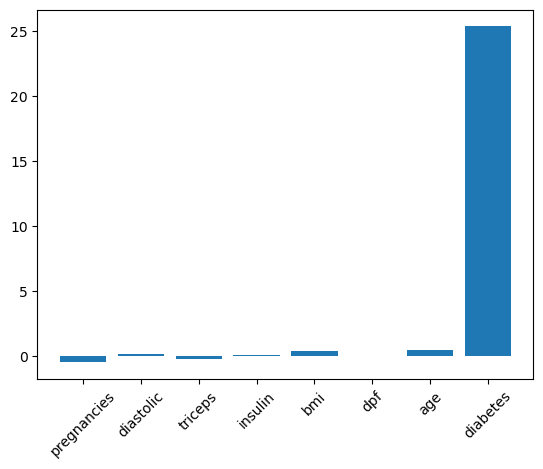

In [21]:
import matplotlib.pyplot as plt

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

names = df_diabets.drop('glucose', axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)

Bu kod parçası, **Lasso regresyonu** (L1 regularization) kullanarak bir veri setinde bulunan değişkenlerin (özelliklerin) önem derecelerini görselleştirmek için yazılmıştır. Kodun her bir kısmını detaylı olarak açıklayalım:

### 1. **Veri Yükleme ve Temizleme:**

```python
df_diabets = pd.read_csv('data/diabetes_clean.csv')
```
- **`pd.read_csv()`**: Bu fonksiyon, **diabetes_clean.csv** adlı CSV dosyasını okur ve bir **DataFrame** (pandas veri yapısı) olarak yükler. Bu veri seti, diyabet ile ilgili çeşitli verileri içeriyor olabilir.

```python
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)
```
- Burada **bmi** (vücut kitle indeksi) veya **glucose** (kan şekeri) sıfır olan veriler **filtreleniyor**.
- **`drop()`** fonksiyonu, bu tür anormal verileri **veri setinden çıkarıyor**.
- **`inplace=True`** parametresi, bu işlemi veri setinde doğrudan yapmayı sağlar (yeni bir değişken atamak gerekmez).

### 2. **Bağımsız ve Bağımlı Değişkenlerin Ayrılması:**

```python
X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values
```
- **`X`**: **Bağımsız değişkenler** (özellikler) burada **glucose** haricindeki tüm sütunlar alınarak oluşturuluyor. Bu, modelin eğitileceği veriler anlamına gelir.
- **`y`**: **Bağımlı değişken** (etiket) burada **glucose** sütunu olarak belirleniyor. Bu, tahmin edilmek istenen veridir.

### 3. **Sütun Adlarının Alınması:**

```python
names = df_diabets.drop('glucose', axis=1).columns
```
- **`names`**: **Bağımsız değişkenlerin sütun adları** alınır. **`drop()`** ile **glucose** sütunu çıkarıldığında, geriye kalan sütun adları **`columns`** ile alınır ve **`names`** listesine atanır.

### 4. **Lasso Regresyonu Modeli:**

```python
lasso = Lasso(alpha=0.1)
```
- **`Lasso`**: **Lasso regresyonu**, **L1 regularization** kullanan bir regresyon yöntemidir. Bu, modelin bazı özelliklerin katsayılarını sıfıra indirerek, bu özelliklerin modelde kullanılmasını engeller ve böylece modelin **genelleme yeteneğini artırır**. Bu, **özellik seçimi** sağlar.
- **`alpha=0.1`**: **L1 ceza parametresi** olan **alpha**, modelin regularizasyon şiddetini belirler. Yüksek bir alpha değeri, daha fazla düzenleme (cezalandırma) anlamına gelir. Bu durumda **alpha=0.1** ile düşük bir regularizasyon yapılır.

### 5. **Modelin Eğitilmesi ve Katsayıların Hesaplanması:**

```python
lasso_coef = lasso.fit(X, y).coef_
```
- **`lasso.fit(X, y)`**: **Lasso regresyonu** modeli, **X** (özellikler) ve **y** (etiket) verileri ile eğitilir.
- **`.coef_`**: Modelin öğrenmiş olduğu **katsayıları** (coefficients) alır. Bu katsayılar, her bir özelliğin **glucose** üzerindeki etkisini temsil eder. Katsayının değeri, o özelliğin hedef değişken üzerindeki **önem derecesini** gösterir.
  - Eğer bir katsayı **0** ise, o özellik model tarafından **önemsiz** olarak kabul edilir.

### 6. **Katsayıların Görselleştirilmesi:**

```python
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
```
- **`plt.bar()`**: **Bar grafiği** ile her bir özellik için **katsayılar** görselleştirilir. **`names`** x-ekseni için özellik isimlerini, **`lasso_coef`** ise y-ekseni için katsayıları temsil eder.
- **`plt.xticks(rotation=45)`**: x-ekseni üzerindeki etiketlerin (özellik isimlerinin) **45 derece döndürülmesini** sağlar. Bu, uzun isimlerin daha kolay okunmasını sağlar.

### **Özetle:**
Bu kod parçası, **Lasso regresyonu** kullanarak diyabet veri setindeki her bir özelliğin **glucose** (kan şekeri) üzerindeki etkisini inceler ve katsayıları bir bar grafiği ile görselleştirir. **Lasso regresyonu**, özellikle **özellik seçimi** yapmak için kullanılır, çünkü bu model bazı özelliklerin katsayılarını **0**'a indirebilir ve bu sayede modelin daha anlamlı ve genellenebilir olmasını sağlar.

Bu kod, Lasso regresyonu ile özelliklerin (feature'ların) önemini görselleştirir. Lasso regresyonu, özellikle L1 düzenlemesi (regularization) kullanarak gereksiz özellikleri sıfırlayarak daha anlamlı özellikleri modelde tutar. Bu kod parçası, her bir özelliğin modeldeki etkisini (koefisiyentlerini) görsel olarak göstermek için bir bar grafiği kullanır. Şimdi her adımı daha ayrıntılı şekilde açıklayalım:


4. Lasso Modelinin Eğitim ve Koefisiyentlerin Hesaplanması
python
Kodu kopyala
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
Lasso Modeli: Bu satırda, Lasso regresyonu modeli alpha=0.1 ile oluşturuluyor. Alpha, Lasso regresyonunun düzenleme parametresidir. Küçük bir alpha değeri, modelin çok güçlü bir düzenlemeye gitmemesine ve daha fazla özelliği tutmasına olanak tanır.

Modelin Eğitilmesi ve Koefisiyentlerin Hesaplanması: lasso.fit(X, y) fonksiyonu, eğitim verisi üzerinde Lasso regresyon modelini eğitir. Eğitildikten sonra lasso.coef_ ile modelin öğrendiği özelliklerin koefisiyentleri elde edilir. Bu koefisiyentler, her bir özelliğin hedef değişken (glucose) üzerindeki etkisini gösterir:

Pozitif koefisiyent: Özellik arttıkça hedef değişkenin (kan şekeri) arttığını gösterir.
Negatif koefisiyent: Özellik arttıkça hedef değişkenin (kan şekeri) azaldığını gösterir.
Sıfır koefisiyent: Bu özellik, modelde önemli bir rol oynamaz ve Lasso düzenlemesi tarafından sıfırlanmış olabilir.

In [25]:
# Classifications Metrics -> accuracy kullanilir

Classifications Metrics (Sınıflandırma Ölçütleri), sınıflandırma problemlerinde bir modelin performansını değerlendirmek için kullanılan metriklerdir. Bu metrikler, modelin doğruluğunu, hassasiyetini ve genel başarısını ölçmek için kullanılır. Sınıflandırma modelleri genellikle doğru sınıflandırma sayısını, yanlış sınıflandırma sayısını, gerçek pozitif ve gerçek negatif gibi verileri kullanarak performanslarını değerlendirir.

In [27]:
# Confusion matrix in scikit-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[548,  18],
       [ 69,  32]])

<Axes: >

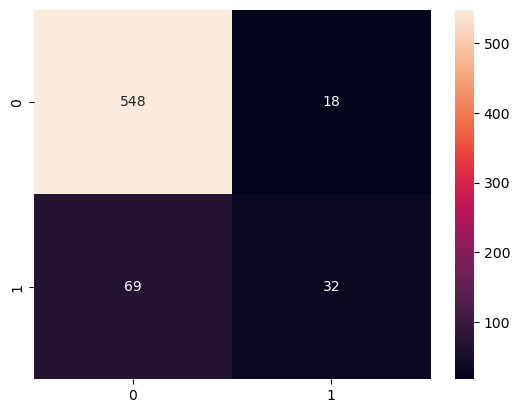

In [29]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.64      0.32      0.42       101

    accuracy                           0.87       667
   macro avg       0.76      0.64      0.68       667
weighted avg       0.85      0.87      0.85       667



Bu kod, **sınıflandırma (classification)** problemini çözmek için kullanılan **KNN (K-Nearest Neighbors)** modelini eğitir ve **performansını değerlendiren metrikler** hesaplar. Kullanılan metrikler arasında **confusion matrix** ve **classification report** yer alır. Ayrıca, **confusion matrix**'in görselleştirilmesi için **seaborn heatmap** kullanılır. Şimdi, her adımı adım adım açıklayalım:

---

### 1. **Veri Yükleme ve Hazırlık**

```python
df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y = df_churn['churn'].values
```

- **`df_churn`**: **telecom_churn_clean.csv** dosyasındaki veri pandas **DataFrame** olarak yükleniyor.
- **`X`**: Bağımsız değişkenler (özellikler) seçilir. Burada **total_day_charge** ve **total_eve_charge** özellikleri kullanılıyor.
- **`y`**: Bağımlı değişken (**churn**) seçilir, yani müşteri iptali olup olmadığı (1: Evet, 0: Hayır).

---

### 2. **Eğitim ve Test Verilerine Ayırma**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **`train_test_split`**: Veriler **%80 eğitim** ve **%20 test** setine ayrılır.
  - **`test_size=0.2`**: Verilerin **%20'si test seti** olarak ayrılır.
  - **`random_state=42`**: Verilerin her seferinde aynı şekilde bölünmesini sağlar, bu şekilde deney tekrarlanabilir olur.

---

### 3. **Modeli Eğitme ve Tahmin Yapma**

```python
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

- **`knn = KNeighborsClassifier(n_neighbors=7)`**: **K-Nearest Neighbors** sınıflandırma modeli, **7 komşu** ile oluşturuluyor. KNN, her yeni örneği sınıflandırırken **en yakın 7 komşu**yu göz önünde bulundurur.
  
- **`knn.fit(X_train, y_train)`**: KNN modeli, **eğitim verisi** (X_train, y_train) ile eğitilir.
  
- **`y_pred = knn.predict(X_test)`**: Test verisi üzerinde **tahmin yapılır** ve bu tahminler **y_pred** değişkenine atanır.

---

### 4. **Confusion Matrix Hesaplama**

```python
confusion_matrix(y_test, y_pred)
```

- **`confusion_matrix(y_test, y_pred)`**: Bu fonksiyon, modelin **confusion matrix**'ini hesaplar. **Confusion matrix** (karışıklık matrisi), modelin **gerçek değerler** ile **tahmin edilen değerler** arasındaki farkı görsel olarak gösteren bir tablodur.

  **Confusion Matrix'in Genel Yapısı**:
  
  |               | **Predicted: 0** | **Predicted: 1** |
  |---------------|------------------|------------------|
  | **Actual: 0** | True Negative (TN) | False Positive (FP) |
  | **Actual: 1** | False Negative (FN) | True Positive (TP) |

  - **True Positive (TP)**: Gerçekten iptal olan (1) müşteriler doğru şekilde iptal olarak sınıflandırılmıştır.
  - **False Positive (FP)**: Gerçekten iptal olmayan (0) müşteriler yanlış bir şekilde iptal olarak sınıflandırılmıştır.
  - **True Negative (TN)**: Gerçekten iptal olmayan (0) müşteriler doğru şekilde iptal olmayan olarak sınıflandırılmıştır.
  - **False Negative (FN)**: Gerçekten iptal olan (1) müşteriler yanlış bir şekilde iptal olmayan olarak sınıflandırılmıştır.

---

### 5. **Classification Report Hesaplama**

```python
print(classification_report(y_test, y_pred))
```

- **`classification_report(y_test, y_pred)`**: Bu fonksiyon, **precision**, **recall**, **f1-score** ve **accuracy** gibi performans metriklerini hesaplar ve **raporlar**.
  
  **Ölçütler**:
  - **Precision**: **Doğruluk**; pozitif tahminlerin ne kadar doğru olduğunu gösterir. Formül:
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$
  - **Recall**: **Duyarlılık**; gerçek pozitiflerin ne kadarını doğru tahmin ettiğini gösterir. Formül:
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$
  - **F1-score**: Precision ve recall arasında **dengeleme** yapar. Formül:
    $$
    \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$
  - **Accuracy**: Modelin genel doğruluğu; doğru tahminlerin oranını gösterir:
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$

---

### 6. **Confusion Matrix Görselleştirme**

```python
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
```

- **`sns.heatmap`**: **Seaborn** kütüphanesi kullanılarak **confusion matrix** görselleştirilir. 
  - **`annot=True`**: Her hücrede sayılar gösterilir.
  - **`fmt='g'`**: Sayılar için genel format kullanılır (tam sayı formatı).
  - **Görsel**: Heatmap (ısı haritası), modelin doğruluk ve hatalarının **görsel** bir temsilidir. Burada, **TP, TN, FP, FN** değerleri renkli bir harita üzerinde gösterilir.

---

### Sonuç:
Bu kod, **KNN sınıflandırma modeli** için **performans metrikleri** hesaplar ve **confusion matrix** ile modelin **tahmin doğruluğunu** değerlendirir. **Precision**, **recall**, **f1-score** ve **accuracy** gibi metrikler modelin **pozitif sınıfı ne kadar doğru sınıflandırdığını**, **yanlış sınıflandırma** oranlarını ve **genel doğruluğunu** gösterir. Ayrıca, **confusion matrix** ve **heatmap** kullanılarak, modelin **doğru ve yanlış sınıflandırmalarını** görselleştiririz.

In [37]:
# Logistic Regression: sinfilandirmak icin kullanilan model 

Logistic Regression (Lojistik Regresyon), sınıflandırma problemi için kullanılan bir istatistiksel modeldir. Bu model, bağımlı bir değişkenin (yani, hedef değişken) iki sınıftan birine ait olup olmadığını tahmin etmeye çalışır. Lojistik regresyon, doğrusal regresyonun bir genellemesidir, ancak sonuçların sürekli değil, bir olasılık (0 ile 1 arasında) olması sağlanır. Bu özellik, onu ikili sınıflandırma problemleri için uygun hale getirir.

In [39]:
# Confusion matrix in scikit-learn

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_predict = model_log.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Bu kod parçası, **lojistik regresyon** modelini kullanarak bir sınıflandırma problemi çözmek amacıyla yazılmıştır. Bu durumda, **telekom abonelik iptalleri** (churn) üzerine bir model eğitilmiştir. Kodda yapılan işlemleri adım adım açıklayalım:

### 1. **Veri Yükleme ve Hazırlık:**

```python
df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y = df_churn['churn'].values
```
- Bu satırlarda, **telecom_churn_clean.csv** adlı veri dosyası okunur ve **`df_churn`** adlı pandas DataFrame'ine yüklenir.
- **`X`**: Modelin eğitileceği **özellikler**. Burada **`total_day_charge`** ve **`total_eve_charge`** sütunları seçilmiştir.
- **`y`**: **Bağımlı değişken** veya **etiketler**. Bu durumda **`churn`** sütunu, abonelik iptalinin olup olmadığını belirtmektedir.

### 2. **Eğitim ve Test Verilerine Bölme:**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **`train_test_split()`** fonksiyonu, veriyi **eğitim** ve **test** kümelerine böler. Burada:
  - **`test_size=0.2`** parametresi ile verinin **%20'si** test seti olarak ayrılır, geri kalan **%80** eğitim seti olarak kullanılır.
  - **`random_state=42`** sabit bir başlangıç noktası belirler, böylece kod her çalıştırıldığında aynı şekilde veriler bölünür.

### 3. **Modelin Eğitilmesi:**

```python
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
```
- **`LogisticRegression()`**: Lojistik regresyon modelini tanımlar.
- **`model_log.fit(X_train, y_train)`**: Eğitim verisi (`X_train` ve `y_train`) ile model eğitilir. Model, **`X_train`** üzerindeki **`total_day_charge`** ve **`total_eve_charge`** gibi özellikleri kullanarak **`y_train`** (churn) değerlerini tahmin etmeyi öğrenir.

### 4. **Test Verisi Üzerinden Tahmin Yapma:**

```python
y_predict = model_log.predict(X_test)
```
- **`model_log.predict(X_test)`**: Eğitim sırasında öğrenilen model, **test verisi** (`X_test`) üzerinde tahminler yapar. Bu, **y_predict** adlı değişkende saklanır.
- **`y_predict`**: Bu bir **numpy array**'dir ve her bir test örneği için modelin tahmin ettiği **`churn`** (abone iptali) değerlerini içerir. Çıktıdaki `array([0, 0, 0, ..., 0])` bu tahmin edilen değerleri gösterir.

### 5. **Model Performansını Değerlendirme:**

```python
confusion_matrix(y_test, y_predict)
```
- **`confusion_matrix(y_test, y_predict)`**: Gerçek değerler (**`y_test`**) ile modelin tahmin ettiği değerler (**`y_predict`**) karşılaştırılarak **karışıklık matrisi** hesaplanır. Bu matris, modelin doğru ve yanlış sınıflandırmalarını gösterir.

### 6. **Model Performans Raporu:**

```python
classification_report(y_test, y_predict)
```
- **`classification_report()`**: Bu fonksiyon, modelin doğruluğunu (accuracy), precision (kesinlik), recall (geri çağırma) ve F1 skorunu içeren **performans raporu** oluşturur. Bu metrikler, modelin genel başarısını değerlendirmenize yardımcı olur.

---

### **Çıktı Analizi:**

Çıktınızda görülen `y_predict` array'i şu şekilde:
```python
array([0, 0, 0, 0, 0, 0, 0, ..., 0])
```
- Bu, modelin test verisi üzerindeki tahminlerini temsil eder. **0** ve **1** gibi iki sınıf değeri içeriyor. **0**, iptal olmayan aboneleri, **1** ise abonelik iptali olan aboneleri temsil eder.
- Bu array'in tamamı, modelin her bir test örneği için tahmin ettiği değerleri göstermektedir.

Eğer bu tahminlerin çoğu **0** ise, bu modelin çoğunlukla "iptal olmayan" (churn = 0) sınıfını tahmin ettiğini gösterir. Bu durum, sınıfların dengesiz olduğu durumlarda sıkça görülür, yani "iptal olmayan" aboneler daha fazla olabilir.

---

### **Sonuç:**
Bu kod, **lojistik regresyon** ile yapılan **ikili sınıflandırma** probleminde, abonelik iptalini tahmin etmeye çalışıyor. Eğitim verisi ile model eğitildikten sonra, test verisi üzerinde tahminler yapılıyor ve bu tahminler karşılaştırılarak **karışıklık matrisi** ve **performans raporu** oluşturuluyor.

In [41]:
y_pred_probs = model_log.predict_proba(X_test)
y_pred_probs

array([[0.82892316, 0.17107684],
       [0.92986818, 0.07013182],
       [0.98204431, 0.01795569],
       ...,
       [0.91093968, 0.08906032],
       [0.92723286, 0.07276714],
       [0.9081191 , 0.0918809 ]])

In [45]:
y_pred_probs = y_pred_probs[:,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

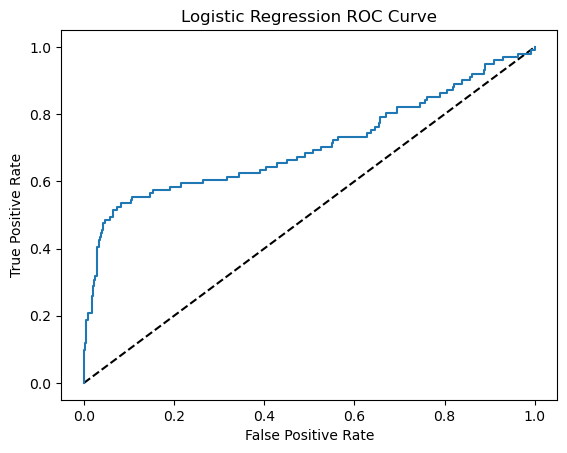

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

# Bu grafiğe dayanarak modelin performansı nasıl ölçülebilir?

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_probs)

0.7049469964664311

Bu kod, **lojistik regresyon (Logistic Regression)** modelini kullanarak **sınıflandırma** yapar ve modelin performansını değerlendirmek için çeşitli metrikler kullanır. Aşağıda kodun adım adım açıklamaları yer almaktadır ve **ROC curve** ile **AUC** skorunun nasıl hesaplandığı ve ne anlama geldiği de açıklanmıştır.

### 1. **Veri Yükleme ve Hazırlık**

```python
df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y = df_churn['churn'].values
```

- **Veri Yükleme**: **`telecom_churn_clean.csv`** dosyasındaki veri **pandas DataFrame** formatında yükleniyor.
- **Bağımsız Değişkenler (X)**: **total_day_charge** ve **total_eve_charge** sütunları özellik olarak seçiliyor.
- **Bağımlı Değişken (y)**: **churn** sütunu, yani **müşteri iptalini** (1: Evet, 0: Hayır) hedef değişken olarak seçiliyor.

### 2. **Eğitim ve Test Setlerine Ayırma**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **Verilerin Bölünmesi**: **`train_test_split`** fonksiyonu ile veriler **%80 eğitim** ve **%20 test** setlerine ayrılır. Bu, modelin genelleme yeteneğini test etmek için kullanılır.

### 3. **Lojistik Regresyon Modeli Eğitimi**

```python
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
```

- **Lojistik Regresyon Modeli**: **`LogisticRegression`** sınıfı kullanılarak lojistik regresyon modeli oluşturulur ve **eğitim verisi** ile eğitilir.

### 4. **Tahmin Yapma**

```python
y_predict = model_log.predict(X_test)
y_pred_probs = model_log.predict_proba(X_test)
y_pred_probs = y_pred_probs[:,1]
```

- **`y_predict`**: Modelin **test verisi** üzerinde yaptığı sınıflandırma tahminleri elde edilir.
- **`y_pred_probs`**: Modelin **test verisi** için **tahmin olasılıkları** elde edilir. `predict_proba()` fonksiyonu, her sınıf için tahmin edilen olasılıkları döndürür. Burada **`[:, 1]`** ile **pozitif sınıf (churn = 1)** için olan olasılıkları seçiyoruz.

### 5. **ROC Curve (Receiver Operating Characteristic Curve)**

```python
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
```

- **`roc_curve`**: **ROC (Receiver Operating Characteristic) eğrisi** hesaplanır. Bu eğri, modelin performansını gösteren bir **görselleştirmedir**. **FPR (False Positive Rate)** ve **TPR (True Positive Rate)** hesaplanır:
  - **TPR (True Positive Rate)**: Gerçek pozitiflerin doğru şekilde sınıflandırılması (Recall).
  - **FPR (False Positive Rate)**: Gerçek negatiflerin yanlış bir şekilde pozitif olarak sınıflandırılması.

- **ROC Eğrisinin Yorumlanması**:
  - Eğri, **modelin sınıflandırma performansını** gösterir. Eğer eğri, **sol üst köşeye** yakınsa, modelin **çok iyi** performans gösterdiğini, eğer eğri **diagonal (köşe köşe)** ise, modelin **rastgele tahmin yaptığını** gösterir.
  - **Eğrinin altındaki alan (AUC)** ise, modelin **genel performansını** daha iyi bir şekilde ölçer.

### 6. **ROC AUC (Area Under the Curve) Skoru Hesaplama**

```python
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_probs)
```

- **`roc_auc_score(y_test, y_pred_probs)`**: **AUC (Area Under the Curve)**, **ROC eğrisinin altındaki alanı** ölçer ve modelin **genel performansını** bir sayı ile ifade eder. AUC şu şekilde yorumlanır:
  - **AUC = 1**: Model mükemmel, tüm pozitifleri doğru sınıflandırmış ve yanlış pozitifleri hiç yapmamış.
  - **AUC = 0.5**: Model, **rastgele tahmin** yapıyor.
  - **AUC < 0.5**: Model, **tersine çalışıyor**, yani her tahminin zıttını yapıyor.

### 7. **Sonuçların Yorumlanması**

- **ROC Eğrisi ve AUC Skoru**:
  - **ROC eğrisinin** ne kadar **sol üst köşeye yakınsa**, modelin başarısı o kadar iyi demektir.
  - **AUC skoru** ise modelin **genel doğruluğunu** gösterir. AUC değeri ne kadar yüksekse, modelin doğru sınıflandırma yapma yeteneği de o kadar yüksektir.
  
### Özet:
Bu kod, **lojistik regresyon modeli** kullanarak **sınıflandırma yapar** ve performansını değerlendirir. **ROC eğrisi** ve **AUC skoru**, modelin **doğruluğu ve başarısını** görselleştirmek ve değerlendirmek için kullanılır.

Bu grafik, **Lojistik Regresyon (Logistic Regression)** modelinin **Receiver Operating Characteristic (ROC)** eğrisini göstermektedir. **ROC eğrisi**, modelin **gerçek pozitif oranı (TPR)** ile **yanlış pozitif oranı (FPR)** arasındaki ilişkiyi gösterir.

### Grafik Açıklaması:

- **Eksenler**:
  - **X Ekseni (False Positive Rate - FPR)**: Modelin **yanlış pozitif sınıflandırmalarını** gösterir. Yani, modelin gerçek negatifleri yanlış bir şekilde pozitif olarak sınıflandırma oranı.
  - **Y Ekseni (True Positive Rate - TPR)**: Modelin **gerçek pozitifleri doğru sınıflandırma oranını** gösterir. Yani, gerçek pozitiflerin doğru şekilde sınıflandırılma oranı.
  
- **Eğri**:
  - Eğri **modelin performansını** gösterir. **Yüksek TPR ve düşük FPR** değerleri, modelin **iyi performans gösterdiğini** belirtir.
  - Eğrinin **sol üst köşeye yakın olması**, modelin **çok iyi performans** gösterdiğini, çünkü çoğu pozitif örneğin doğru sınıflandırıldığını ve yanlış pozitiflerin minimumda olduğunu gösterir.
  - **Diagonal kırmızı çizgi**: Bu çizgi, **rastgele tahmin** yapan bir modelin ROC eğrisini temsil eder. Eğer modelin ROC eğrisi bu çizgiye yakınsa, model **rastgele tahmin** yapıyor demektir.

### Modelin Performansını Ölçme:

Bu grafiğe dayanarak modelin performansını **AUC (Area Under the Curve)** skoru ile değerlendirebiliriz:
- **AUC Skoru**: **ROC eğrisinin altındaki alan** olarak tanımlanır ve modelin **genel doğruluğunu** ölçer. AUC skoru şu şekilde yorumlanır:
  - **AUC = 1**: Mükemmel bir model, tüm pozitifleri doğru sınıflandırıyor ve yanlış pozitif sınıflandırmalar yok.
  - **AUC = 0.5**: Model rastgele tahmin yapıyor.
  - **AUC < 0.5**: Model, rastgele tahminlerin zıttını yaparak kötü performans gösteriyor.

**Sorunun yanıtı**: Grafik, modelin **gerçek pozitif oranını** (TPR) **yanlış pozitif oranına** (FPR) göre nasıl değiştirdiğini gösteriyor. Eğri, **modelin performansını** değerlendirmek için kullanılır; ne kadar yüksek ve sol üst köşeye yakınsa, model o kadar iyi performans gösteriyor.

In [53]:
# Grid Search Cross Validation 

Grid Search Cross Validation (Grid Search Çapraz Doğrulama), makine öğrenmesi modelinin hiperparametrelerini optimize etmek için kullanılan bir yöntemdir. Bu yöntem, belirli bir modelin performansını değerlendirirken farklı hiperparametre kombinasyonlarını dener ve en iyi sonucu veren parametreleri seçer. Grid Search, "grid" adı verilen bir hiperparametre ızgarası üzerinde sistematik olarak arama yaparak en iyi model parametrelerini bulur.

Grid Search'in Çalışma Prensibi

Grid Search, parametre arama alanını tanımladıktan sonra, her bir parametre kombinasyonunu belirli bir çapraz doğrulama stratejisi (örneğin, 

k-fold çapraz doğrulama) ile değerlendirir. Bu süreç, aşağıdaki adımları takip eder:

Modeli parametrelerin her kombinasyonu için eğit.

Çapraz doğrulama kullanarak her parametre kombinasyonu için doğrulama performansını değerlendir.

En yüksek doğrulama performansına sahip parametre kombinasyonunu seç.


In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import numpy as np 

# Veri setini okuma
df_diabets = pd.read_csv('data/diabetes_clean.csv')

# Boş verileri (bmi=0 veya glucose=0) filtreleme
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) oluşturma
X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold çapraz doğrulama için KFold sınıfını oluşturuyoruz
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hiperparametreler için arama alanını (grid) oluşturuyoruz
param_grid = {
    'alpha': np.arange(0.0001, 1, 0.1),  # alpha parametresinin farklı değerlerini deniyoruz
    'solver': ['sag', 'lsqr']  # Ridge regresyonu için farklı çözüm yöntemleri
}

# Ridge regresyon modelini oluşturuyoruz
ridge = Ridge()

# GridSearchCV ile Grid Search başlatıyoruz
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

# Modeli eğitim verileriyle eğitiyoruz
ridge_cv.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdırıyoruz
print(ridge_cv.best_params_, ridge_cv.best_score_)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'alpha': 0.0001, 'solver': 'lsqr'}, 0.3404176885506861)

In [57]:
from sklearn.model_selection import RandomizedSearchCV

# İsteğe bağlı olarak, test edilen hiperparametre değerlerinin sayısını belirleyen 
# n_iter bağımsız değişkenini ayarlanabilir. 
# Böylece n_iter iki olarak ayarlandığında 
# beş katlı çapraz doğrulama 10 fit() gerçekleştirir. 

#RandomizedSearchCV:
#Grid Search'ten farklı olarak RandomizedSearchCV, belirli bir parametre kombinasyonu yerine rastgele bir seçki ile hiperparametreleri dener. Bu yöntem, büyük veri setlerinde ve parametrelerin çok olduğu durumlarda daha hızlı sonuçlar verebilir.
from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV kullanımı
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

# Sonuçları görüntüle
print(ridge_cv.best_params_, ridge_cv.best_score_)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'solver': 'lsqr', 'alpha': 0.0001}, 0.3404176885506861)

### **Ridge Regresyonu Nedir?**

**Ridge Regresyonu**, **lineer regresyonun** bir türüdür ve **L2 regularization** (cezalandırma) kullanır. Bu, modelin karmaşıklığını kontrol etmek için kullanılan bir tekniktir. Ridge regresyonu, özellikle **çoklu doğrusal ilişkilere sahip veriler**yle çalışırken ve **aşırı öğrenme (overfitting)** problemiyle karşılaşıldığında kullanışlıdır.

#### **Ridge Regresyonunun Temel Prensibi:**
- **Normal Lineer Regresyon (OLS)**, modelin doğruluğunu optimize ederken yalnızca hata (residuals) terimini minimize eder.
- **Ridge Regresyonu** ise, hata teriminin yanı sıra modelin **katsayılarının büyüklüğünü** de cezalayan (penalize eden) bir terim ekler.
  
Matematiksel olarak, Ridge Regresyonu, şu şekilde tanımlanır:
$$
\[
\text{minimize} \quad \sum (y_i - (\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n))^2 + \alpha \sum \beta_j^2
\]
$$
- İlk terim, **normal lineer regresyonun hata fonksiyonudur** (veya Residual Sum of Squares, RSS).
- İkinci terim, **cezalandırma terimidir** ve modelin katsayılarının karesinin toplamını içerir. Bu terim, **α (alpha)** parametresi ile kontrol edilir. **Alpha** ne kadar büyükse, ceza (penaltı) da o kadar büyür.
- **α (alpha)**, modelin **karmaşıklık düzeyini** kontrol eder: Küçük α değerleri modelin daha esnek olmasına, büyük α değerleri ise modelin daha basit olmasına yol açar.

---

### **Kodun Açıklaması**

1. **Veri Yükleme ve Temizleme:**

```python
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)
```
- **Veri yükleniyor** ve **temizleniyor**. Burada **bmi** veya **glucose** sıfır olan satırlar **veri setinden çıkarılmaktadır**.

2. **Bağımsız ve Bağımlı Değişkenlerin Ayrılması:**

```python
X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values
```
- **X**, **glucose** haricindeki tüm özellikleri (bağımsız değişkenler) içerir.
- **y**, **glucose** sütununu (bağımlı değişken) içerir.

3. **Eğitim ve Test Setlerine Bölme:**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **Veri seti eğitim** (%80) ve **test** (%20) olarak ikiye bölünür. **random_state=42** parametresi ile aynı şekilde bölme işlemi tekrar edilebilir.

4. **KFold Çapraz Doğrulama ve Parametre Ayarlamaları:**

```python
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'alpha': np.arange(0.0001, 1, 10),
    'solver': ['sag', 'lsqr']
}
```
- **KFold** ile **5 katlı çapraz doğrulama** yapılır. Bu, veri setinin 5 farklı bölüme ayrılmasını ve her bir bölümde modelin eğitilip test edilmesini sağlar.
- **param_grid**: **α (alpha)** parametresi için test edilecek farklı değerler belirlenir ve **solver** (çözümleyici) için **'sag'** ve **'lsqr'** yöntemleri kullanılır.

5. **GridSearchCV Kullanımı:**

```python
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
```
- **GridSearchCV**, verilen **param_grid** üzerinde hiperparametreleri optimize etmek için kullanılır. Burada, **Ridge** modelinin **α (alpha)** parametresi üzerinde en uygun değeri bulmak için **5 katlı çapraz doğrulama** yapılır.

6. **En İyi Parametrelerin ve Sonuçların Alınması:**

```python
(ridge_cv.best_params_, ridge_cv.best_score_)
```
- **best_params_**: Çapraz doğrulama ile elde edilen en iyi **α** değeri ve **solver** parametrelerinin birleşimi.
- **best_score_**: En iyi modelin doğruluk skoru (cross-validation ile elde edilen).

---

### **RandomizedSearchCV** ile Alternatif Arama:

```python
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

(ridge_cv.best_params_, ridge_cv.best_score_)
```
- **RandomizedSearchCV**, **GridSearchCV**'nin daha hızlı bir versiyonudur. **n_iter=2** parametresi ile, belirli parametrelerin **2 farklı rastgele kombinasyonunu** denemektedir. Bu, hiperparametrelerin daha hızlı bir şekilde araştırılmasını sağlar.

---

### **Sonuçlar:**
Bu kod, **Ridge Regresyonu** için **hiperparametre optimizasyonu** yapmaktadır. **GridSearchCV** veya **RandomizedSearchCV** kullanarak en iyi **α** ve **solver** parametreleri seçilir. Ridge regresyonu, veri setindeki çoklu doğrusal ilişkileri düzenleyerek aşırı öğrenme (overfitting) problemini engellemeye yardımcı olur.

Bu kod, **Ridge regresyonu** modeli için **Grid Search** ve **Randomized Search** yöntemlerini kullanarak hiperparametre optimizasyonu (hyperparameter tuning) gerçekleştirir. Bu, modelin en iyi hiperparametre değerlerini bulmak için çapraz doğrulama (cross-validation) yöntemleri ile değerlendirilmiş bir süreçtir. Şimdi, adım adım kodun açıklamalarını yapalım.

---

### 1. **Veri Yükleme ve Temizleme**

```python
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)
```

- **Veri Yükleme**: **`pd.read_csv`** fonksiyonu ile **diabetes_clean.csv** dosyasındaki veriler **pandas DataFrame** olarak yükleniyor.
- **Veri Temizleme**: **BMI** veya **Glucose** değeri sıfır olan satırlar filtrelenir ve veri setinden çıkarılır. Bu, hatalı veya eksik verileri temizler.

---

### 2. **Bağımsız ve Bağımlı Değişkenlerin Seçilmesi**

```python
X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values
```

- **X**: Bağımsız değişkenler (özellikler), yani **Glucose** dışındaki tüm sütunlar (örneğin BMI, yaş, vb.).
- **y**: Bağımlı değişken, yani **kan şekeri (glucose)**, bu tahmin edilmek istenen hedef değerdir.

---

### 3. **Eğitim ve Test Setlerine Ayırma**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **Verilerin Bölünmesi**: **`train_test_split`** fonksiyonu ile veriler **%80 eğitim** ve **%20 test** setlerine ayrılır.

---

### 4. **KFold Çapraz Doğrulama (Cross-Validation)**

```python
kf = KFold(n_splits=5, shuffle=True, random_state=42)
```

- **KFold**: Bu, **5 katlı çapraz doğrulama** kullanmak için yapılandırılmıştır. Bu, veri setinin 5 parçaya bölünmesi ve her bir parça için modelin eğitim ve test edilmesidir.
- **`shuffle=True`**: Veriler karıştırılır, böylece model her seferinde farklı veri parçaları ile eğitilir.

---

### 5. **Grid Search ile Hiperparametre Optimizasyonu**

```python
param_grid = {
    'alpha': np.arange(0.0001, 1, 10),
    'solver':['sag', 'lsqr']
}
```

- **`param_grid`**: **Ridge regresyonu** modelinin hiperparametrelerini içeren **parametre grid'i** oluşturulmuştur. Burada, **`alpha`** ve **`solver`** parametreleri optimizasyon için kullanılır.
  - **`alpha`**: **L2 düzenleme parametresi**. Bu parametre modelin karmaşıklığını düzenler. Küçük alpha değerleri modelin daha karmaşık olmasına izin verirken, büyük alpha değerleri modelin daha basit olmasına yol açar.
  - **`solver`**: Ridge regresyonu için kullanılacak **optimizasyon çözümleyicisi**. İki seçenek vardır: **'sag'** ve **'lsqr'**.

```python
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

(ridge_cv.best_params_, ridge_cv.best_score_)
```

- **Grid Search**: **`GridSearchCV`**, belirtilen hiperparametre kombinasyonlarını kullanarak **modeli eğitir** ve her kombinasyon için **doğruluğu** hesaplar. En iyi parametreleri bulur.
  - **`cv=kf`**: **KFold çapraz doğrulama** kullanılır.
  - **`ridge_cv.best_params_`**: En iyi hiperparametre kombinasyonunu döndürür.
  - **`ridge_cv.best_score_`**: En iyi parametre kombinasyonu ile elde edilen **doğruluk skoru**.

---

### 6. **Randomized Search ile Hiperparametre Optimizasyonu**

```python
from sklearn.model_selection import RandomizedSearchCV

ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

(ridge_cv.best_params_, ridge_cv.best_score_)
```

- **Randomized Search**: **`RandomizedSearchCV`**, hiperparametre aramasında **rastgele** bir seçim yapar. **`n_iter=2`** parametresi, denenecek hiperparametre kombinasyonlarının sayısını belirtir. Bu sayede çok daha hızlı sonuçlar elde edilir.
  - **`n_iter=2`**: Sadece 2 farklı hiperparametre kombinasyonu test edilir.
  - **`ridge_cv.best_params_`**: En iyi hiperparametre kombinasyonunu döndürür.
  - **`ridge_cv.best_score_`**: En iyi parametre kombinasyonu ile elde edilen **doğruluk skoru**.

---

### 7. **Sonuçlar**

- **GridSearchCV** ile **belirli hiperparametrelerin** tüm kombinasyonlarını denerken, **RandomizedSearchCV** daha az kombinasyon test eder ve **daha hızlı** çalışır, ancak kesin sonuçlar elde etmeyebilir.
- **En İyi Parametreler ve Skorlar**: Hem **GridSearchCV** hem de **RandomizedSearchCV** ile, modelin en iyi performansı gösteren **hiperparametre kombinasyonları** elde edilir. Bu parametreler **modelin doğruluğunu en üst düzeye çıkaracaktır**.

---

### Özet:
Bu kod, **Ridge regresyonu** için **hiperparametre optimizasyonu** yapar. **GridSearchCV** ve **RandomizedSearchCV** kullanılarak modelin en iyi **alpha** ve **solver** parametreleri bulunur. GridSearchCV tüm parametre kombinasyonlarını denerken, RandomizedSearchCV rastgele seçim yaparak hız avantajı sağlar. Bu, modelin **doğruluğunu** artıran en iyi parametrelerin seçilmesini sağlar.

In [60]:
# Preprocessing Data

In [64]:
import pandas as pd

df_music = pd.read_csv('data/music_genre.csv')
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       44996 non-null  int64  
 1   popularity        44996 non-null  int64  
 2   acousticness      44996 non-null  float64
 3   danceability      44996 non-null  float64
 4   duration_ms       44996 non-null  int64  
 5   energy            44996 non-null  float64
 6   instrumentalness  44996 non-null  float64
 7   liveness          44996 non-null  float64
 8   loudness          44996 non-null  float64
 9   speechiness       44996 non-null  float64
 10  tempo             44996 non-null  float64
 11  valence           44996 non-null  float64
 12  music_genre       44996 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 4.5+ MB


<Axes: xlabel='music_genre', ylabel='popularity'>

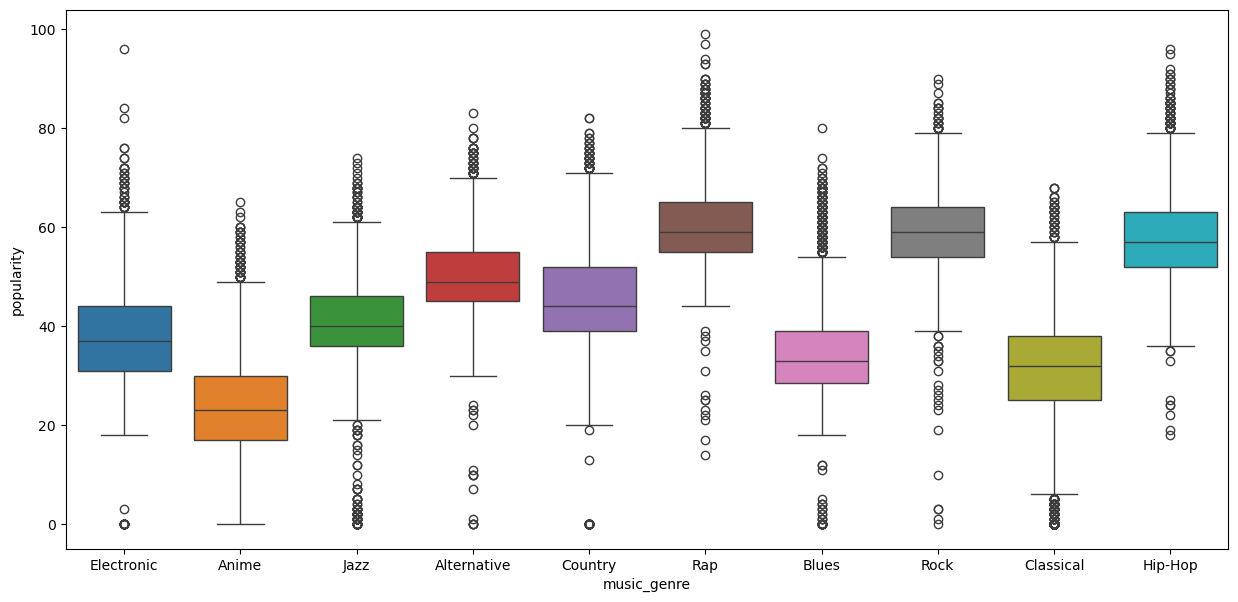

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_music, x='music_genre', y='popularity', hue='music_genre')

In [68]:
music_dummies = pd.get_dummies(df_music['music_genre'], drop_first=True, dtype='int')
music_dummies.head()

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [70]:
music_dummies = pd.concat([df_music, music_dummies], axis=1)
music_dummies

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,music_genre,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,32894,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,...,Electronic,0,0,0,0,1,0,0,0,0
1,46652,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,...,Electronic,0,0,0,0,1,0,0,0,0
2,30097,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,...,Electronic,0,0,0,0,1,0,0,0,0
3,62177,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,...,Electronic,0,0,0,0,1,0,0,0,0
4,24907,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,...,Electronic,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,58878,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44992,43557,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44993,39767,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44994,57944,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,...,Hip-Hop,0,0,0,0,0,1,0,0,0


In [72]:
music_dummies = music_dummies.drop(['music_genre', 'instance_id'], axis=1)
music_dummies

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,0,0,0,0,1,0,0,0,0
1,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,0,0,0,0,1,0,0,0,0
2,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,0,0,0,0,1,0,0,0,0
3,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,0,0,0,0,1,0,0,0,0
4,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,98.028,0.330,0,0,0,0,0,1,0,0,0
44992,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,122.043,0.113,0,0,0,0,0,1,0,0,0
44993,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,0,0,0,0,0,1,0,0,0
44994,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,75.886,0.354,0,0,0,0,0,1,0,0,0


In [74]:
# Linear regression with dummy variables

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_reg = LinearRegression()
model_reg_cv = cross_val_score(model_reg, X_train, y_train, cv=kf, 
                               scoring='neg_mean_squared_error')

np.sqrt(-model_reg_cv)

array([9.55195316, 9.35056784, 9.426638  , 9.61559878, 9.60648301])

Bu kod, **müzik türü** ve **popülerlik** arasındaki ilişkiyi inceleyen bir **lineer regresyon** modelini oluşturur. İşte adım adım açıklamalar:

### 1. **Veri Yükleme ve İnceleme**

```python
df_music = pd.read_csv('data/music_genre.csv')
df_music.info()
```

- **`df_music`**: **`music_genre.csv`** dosyasındaki müzik verileri pandas **DataFrame** olarak yükleniyor.
- **`df_music.info()`**: Verinin temel özelliklerini (örneğin, sütun isimleri, veri türleri, eksik veriler) incelemek için kullanılır.

---

### 2. **Veri Görselleştirme**

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_music, x='music_genre', y='popularity', hue='music_genre')
```

- **Boxplot**: **`sns.boxplot`** fonksiyonu, müzik türüne göre **popülerlik** dağılımını gösterir. **`hue='music_genre'`** parametresi, her müzik türü için farklı renkler kullanarak kutu grafiği oluşturur.
  - **X-ekseni**: Müzik türlerini (genellikle kategorik bir değişken).
  - **Y-ekseni**: Popülerlik puanlarını (sürekli bir değişken).
  
---

### 3. **Dummy Değişkenleri (Kategori Değişkenleri)**

```python
music_dummies = pd.get_dummies(df_music['music_genre'], drop_first=True, dtype='int')
music_dummies.head()
```

- **`pd.get_dummies`**: Bu fonksiyon, **`music_genre`** sütununu **dummy değişkenlere** dönüştürür. **Dummy değişkenleri**, **kategorik değişkenlerin sayısal verilere** dönüştürülmesi için kullanılır. Burada, `drop_first=True` parametresi, ilk kategoriyi çıkararak **multicollinearity** sorununu engeller (ilk kategori, diğerlerinin kombinasyonu olarak zaten temsil edilebilir).
  
---

### 4. **Dummy Değişkenlerinin Birleştirilmesi**

```python
music_dummies = pd.concat([df_music, music_dummies], axis=1)
music_dummies = music_dummies.drop(['music_genre', 'instance_id'], axis=1)
```

- **`pd.concat`**: Orijinal veri seti ile oluşturulan **dummy değişkenleri** birleştirilir.
- **`drop()`**: **`music_genre`** ve **`instance_id`** sütunları veri setinden çıkarılır, çünkü **`music_genre`** zaten dummy değişkenlere dönüştürülmüşken, **`instance_id`** model için gerekli olmayabilir.

---

### 5. **Lineer Regresyon Modeli**

```python
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **Bağımsız Değişkenler (X)**: **`popularity`** dışındaki tüm sütunlar (dummy değişkenler) **bağımsız değişkenler** olarak seçilir.
- **Bağımlı Değişken (y)**: **`popularity`** sütunu, modelin tahmin etmeye çalıştığı hedef değişken olarak seçilir.
- **`train_test_split`**: Veriler, **%80 eğitim** ve **%20 test** setine ayrılır.

---

### 6. **Çapraz Doğrulama (Cross-Validation)**

```python
kf = KFold(n_splits=5, shuffle=True, random_state=42)
```

- **KFold**: Bu, **5 katlı çapraz doğrulama** kullanmak için yapılandırılmıştır. Bu işlem, veri setinin 5 parçaya bölünmesi ve her bir parça için modelin eğitilip test edilmesi işlemidir. Bu yöntem modelin **genelleme** yeteneğini ölçer.

---

### 7. **Modelin Eğitilmesi ve Performansın Değerlendirilmesi**

```python
model_reg = LinearRegression()
model_reg_cv = cross_val_score(model_reg, X_train, y_train, cv=kf, 
                               scoring='neg_mean_squared_error')

np.sqrt(-model_reg_cv)
```

- **`LinearRegression()`**: **Lineer regresyon modeli** oluşturulur.
- **`cross_val_score`**: Modelin **5 katlı çapraz doğrulama** ile eğitilmesi sağlanır. **`scoring='neg_mean_squared_error'`** parametresi, modelin doğruluğunu ölçerken **negatif ortalama kare hata** (MSE) metriğini kullanır. MSE, modelin tahminleri ile gerçek değerler arasındaki farkların karesinin ortalamasıdır. **Negatif işareti** kullanmak, sklearn'ın hata metriğini minimize etmek için gereklidir, çünkü sklearn genellikle daha büyük değerleri **iyi** olarak değerlendirir.
  
- **`np.sqrt(-model_reg_cv)`**: MSE'nin **karekökü** alınarak **RMSE (Root Mean Squared Error)** hesaplanır. RMSE, modelin doğruluğunu ölçmek için yaygın olarak kullanılan bir metriktir ve hata oranının daha anlaşılır bir şekilde sunulmasını sağlar.

---

### Sonuç:
Bu kod, **müzik türleri** ile **popülerlik** arasındaki ilişkiyi incelemek için **dummy değişkenler** kullanarak bir **lineer regresyon modeli** eğitir. Ayrıca, modelin doğruluğunu değerlendirmek için **cross-validation** ve **RMSE** kullanılır. **RMSE** daha düşük bir değer aldıkça, modelin tahminlerinin gerçek değerlere daha yakın olduğu anlamına gelir.

**Dummy değişkenleri**, **kategorik verileri** sayısal verilere dönüştürmek için kullanılan bir tekniktir. Bu, makine öğrenmesi ve istatistiksel analizlerde yaygın olarak kullanılır çünkü çoğu algoritma **sayılarla** çalışır ve **kategorik** (metin, etiket gibi) verilerle doğrudan işlem yapamaz.

### **Dummy Değişkenleri Nedir?**

Bir **kategorik değişkeni** sayısal verilere dönüştürmenin en yaygın yolu **dummy değişkenleri** kullanmaktır. Örneğin, **müzik türü (music_genre)** bir kategorik değişken olabilir. Bu tür bir veriyi sayısal hale getirmek için **her bir kategori için bir sütun** (veya dummy değişkeni) oluşturulur.

Örneğin, aşağıdaki **music_genre** kategorik verisini düşünelim:

| music_genre |
|-------------|
| Pop         |
| Jazz        |
| Rock        |
| Pop         |
| Jazz        |

Bu veriyi **dummy değişkenlerine** dönüştürmek için şu adımlar izlenir:

### **Dummy Değişkenleri Oluşturma**

#### 1. **Her Bir Kategoriyi Yeni Bir Sütunla Temsil Etme:**
Her müzik türü için bir sütun oluşturulacak ve her satırda, o müzik türüne ait olma durumu **1 (vardır)** veya **0 (yoktur)** ile gösterilecektir.

| music_genre | Pop | Jazz | Rock |
|-------------|-----|------|------|
| Pop         | 1   | 0    | 0    |
| Jazz        | 0   | 1    | 0    |
| Rock        | 0   | 0    | 1    |
| Pop         | 1   | 0    | 0    |
| Jazz        | 0   | 1    | 0    |

Bu işlem, **kategorik değişkenleri** (örneğin **music_genre**) **sayısal verilere** dönüştürmüş olur. Bu sayede makine öğrenmesi algoritmaları, bu veriler üzerinde işlem yapabilir.

#### 2. **`drop_first=True` Parametresi:**
- Bazı durumlarda, **ilk kategori** (veya "ilk sütun") çıkarılabilir. Bu, **multicollinearity** sorununu engeller, çünkü **ilk sütun** diğerlerinin **kombinasyonu** olarak zaten temsil edilebilir.
- Bu teknik, regresyon modellerinde genellikle kullanılır çünkü **aşırı parametre sayısı** modelin performansını düşürebilir.

Örneğin, yukarıdaki tablodan **Pop** sütununu çıkaralım (ilk sütun):

| music_genre | Jazz | Rock |
|-------------|------|------|
| Pop         | 0    | 0    |
| Jazz        | 1    | 0    |
| Rock        | 0    | 1    |
| Pop         | 0    | 0    |
| Jazz        | 1    | 0    |

Burada, **Pop** müzik türü **referans kategori** olarak kabul edilir, ve **Jazz** ve **Rock** sütunları **bu kategoriye göre** ölçülür.

---

### **Kod Açıklaması:**

```python
music_dummies = pd.get_dummies(df_music['music_genre'], drop_first=True, dtype='int')
```

- **`pd.get_dummies(df_music['music_genre'])`**: Bu, **music_genre** sütunundaki her kategori için bir **dummy değişkeni** oluşturur. Kategorik veriler sayısal verilere dönüştürülür.
  
- **`drop_first=True`**: İlk sütunu (ilk kategori, örneğin **Pop**) çıkarır. Bu, **çoklu doğrusal ilişkiyi** (multicollinearity) engeller. Çünkü ilk kategori zaten diğerlerinin **kombinasyonu** olarak temsil edilebilir.

- **`dtype='int'`**: Dummy değişkenleri **tam sayı (integer)** türünde olacak şekilde ayarlanır.

---

### **Dummy Değişkenlerini Kullanmanın Avantajları:**
- **Makine öğrenmesi modelleri** kategorik verileri doğrudan işleyemez. Dummy değişkenleri, algoritmaların bu tür verilerle **verimli bir şekilde çalışabilmesini** sağlar.
- **Modelin daha doğru öğrenmesi** için gereklidir, çünkü kategorik veriler modelin öğrenmesi için gereklidir.

### Özet:
Dummy değişkenleri, kategorik değişkenleri **sayısal verilere dönüştürmek** için kullanılır ve bu sayede makine öğrenmesi algoritmaları bu verilerle işlem yapabilir. **`drop_first=True`** parametresi, modelin daha verimli çalışması için genellikle kullanılır, çünkü bu, multicollinearity problemini önler.

Tabii! İşte **sınavınız için cheatsheet** şeklinde bir özet:

---

### **Cheat Sheet: İstatistiksel Testler ve Makine Öğrenmesi Yöntemleri**

#### **1. Doğrusal Regresyon:**
- **Kullanım Durumu**: Bağımlı değişkenin (y) sürekli olduğu ve bağımsız değişkenlerin (X) doğrusal bir ilişki gösterdiği durumlarda kullanılır.
- **Modeller**:
  - **Simple Linear Regression**: Tek bir bağımsız değişken ile doğrusal ilişki.
  - **Multiple Linear Regression**: Birden fazla bağımsız değişken ile doğrusal ilişki.
- **Eşitlik**:
  - Tekli: \( y = ax + b \)
  - Çoklu: \( y = a_1x_1 + a_2x_2 + ... + a_nx_n + b \)
  
---

#### **2. Regularization (Ridge ve Lasso Regresyon)**
- **Kullanım Durumu**: Aşırı öğrenmeyi engellemek ve modelin genelleme yeteneğini artırmak için kullanılır.
- **Ridge Regresyonu**:
  - **L2 regularization** kullanır.
  - Aşırı büyük katsayıları cezalandırır.
- **Lasso Regresyonu**:
  - **L1 regularization** kullanır.
  - Aşırı büyük katsayıları cezalandırır ve bazı katsayıları sıfıra indirir (özellik seçimi yapar).

---

#### **3. Cross-Validation (Çapraz Doğrulama)**
- **Kullanım Durumu**: Modelin genelleme yeteneğini test etmek, aşırı öğrenmeyi engellemek ve doğruluğu daha güvenilir ölçmek için kullanılır.
- **Yöntemler**:
  - **K-Fold Cross-Validation**: Veriyi k eşit alt kümeye böler, her birinde model eğitilir ve test edilir.
  - **Leave-One-Out Cross-Validation (LOOCV)**: Kullandığınız her veri noktası test seti olarak kullanılır.

---

#### **4. KNN (K-Nearest Neighbors)**
- **Kullanım Durumu**: Hem sınıflandırma hem de regresyon için kullanılan, **denetimli öğrenme** algoritmasıdır.
- **Sezgisi**: Yeni veri noktası için en yakın k komşuyu bulur ve tahmin yapmak için bu komşuların etiketleri veya değerleri kullanılır.
- **En İyi K Değeri**: K değeri küçükse model **çok hassas** olur, büyükse **genelleme yapar**.

---

#### **5. Sınıflandırma Metrikleri**
- **Accuracy (Doğruluk)**: Doğru tahminlerin toplam tahminlere oranı. Ancak sınıflar dengesizse yanıltıcı olabilir.
- **Precision (Kesinlik)**: Modelin **pozitif** olarak tahmin ettiği doğru örneklerin oranı.
- **Recall (Duyarlılık)**: Gerçekten pozitif olan örneklerin model tarafından doğru tahmin edilme oranı.
- **F1-Score**: Precision ve Recall’un harmonik ortalaması, dengeyi sağlar.

---

#### **6. Confusion Matrix (Karışıklık Matrisi)**
- **Kullanım Durumu**: Sınıflandırma problemlerinde modelin **doğru ve yanlış tahminlerini** görselleştirmek için kullanılır.
- **İçerik**: 
  - **TP (True Positive)**: Gerçek pozitif, model doğru tahmin etmiş.
  - **TN (True Negative)**: Gerçek negatif, model doğru tahmin etmiş.
  - **FP (False Positive)**: Yanlış pozitif, model yanlış tahmin etmiş.
  - **FN (False Negative)**: Yanlış negatif, model yanlış tahmin etmiş.

---

#### **7. Logistic Regression (Lojistik Regresyon)**
- **Kullanım Durumu**: **İkili sınıflandırma** problemleri için kullanılır. Yalnızca iki sınıf vardır ve modelin çıktısı bir **olma olasılığı**dır (0 ile 1 arasında).
- **Çıktı**: **Sigmoid** fonksiyonu kullanılarak doğrusal olmayan sınıflandırmalar yapılır.

---

#### **8. Z-Score (Z-Skoru)**
- **Kullanım Durumu**: Bir örneğin, **ortalama** ve **standart sapma** ile ne kadar uzakta olduğunu ölçmek için kullanılır.
- **Formül**:
- $$
  \[
  z = \frac{(x - \mu)}{\sigma}
  \]
  $$
  - **x**: Gözlem değeri
  - **μ**: Ortalamadaki değer
  - **σ**: Standart sapma
- **Yorum**: Z-skoru 0’a yakınsa, değer ortalamaya yakın demektir; negatif veya pozitifse, uzaklık gösterir.

---

#### **9. Bootstrapping ve p-Değeri**
- **Kullanım Durumu**: **P-değeri**, bir hipotezin doğru olduğunu test eder ve genellikle **0.05**'ten küçükse **hipotez reddedilir**.
- **Bootstrapping**: Verinin tekrar örneklenmesiyle güven aralıkları oluşturulur ve modelin performansı değerlendirilir.
- **p-değeri**: İstatistiksel anlamlılığı gösterir, çok küçük p-değerleri (örneğin **0.05**'ten küçük) null hipotezini reddetmek için kullanılır.

---

#### **10. Ridge Regresyon ve GridSearchCV**
- **Ridge Regresyonu**: **L2 regularization** kullanarak **modelin karmaşıklığını azaltır** ve aşırı öğrenmeyi engeller.
- **GridSearchCV**: Belirli hiperparametreler üzerinde en iyi sonucu veren modeli bulmak için kullanılır.
  - **RandomizedSearchCV**: Parametrelerin daha hızlı araştırılmasını sağlar.

---

#### **11. ANOVA (Analysis of Variance)**
- **Kullanım Durumu**: Üç veya daha fazla grubun **ortalama farklarının** anlamlı olup olmadığını test etmek için kullanılır.
- **Varsayımlar**:
  - **Bağımsız gruplar** olmalı.
  - **Normal dağılım** ve **homojen varyans** olmalı.

---

#### **12. Kruskal-Wallis Test**
- **Kullanım Durumu**: Veriler **normal dağılmıyorsa** ve **3+ grup** varsa, Kruskal-Wallis testi kullanılır. **ANOVA**'nın **non-parametrik** alternatifidir.

---

#### **13. Proportion Tests (Oran Testleri)**
- **One-Sample Proportion Test**: Tek bir oranı belirli bir değerden farklı olup olmadığını test eder.
- **Two-Sample Proportion Test**: İki oranın birbirinden farklı olup olmadığını test eder.

---

### **Hangisini Ne Zaman Kullanmalısınız?**
- **Bağımsız Değişken**: İki veya daha fazla grubun **ortalama farkları** test edilecekse **ANOVA** veya **Kruskal-Wallis** (normal dağılım sağlanmıyorsa) kullanılabilir.
- **Bağımlı Değişken**: İki farklı grubun **ortalama farkları** test edilecekse **t-test** (parametrik) veya **Mann-Whitney U** (non-parametrik) kullanılabilir.
- **Çoklu Karşılaştırmalar**: ANOVA sonrası hangi grupların farklı olduğunu görmek için **Bonferroni correction** veya **Post-Hoc testleri** kullanılır.
- **Sınıflandırma**: **KNN** veya **Logistic Regression** gibi algoritmalar, etiketli verilerle sınıflandırma yapmak için kullanılır.

---

### **Genel İpuçları**
- **Parametrik Testler**: Normal dağılım varsayar, hata terimlerinin homojen dağılımı gerekir. **Z-Testi**, **t-Testi**, **ANOVA** gibi testler.
- **Non-Parametrik Testler**: Verilerin normal dağılmadığı durumlar için **Mann-Whitney U**, **Kruskal-Wallis** gibi testler.
- **Regularization**: Aşırı öğrenme durumunda **Ridge** veya **Lasso** regülasyonları kullanılır.

---

Bu **cheat sheet**, sınavınıza çalışırken kullanabileceğiniz temel kavramları ve hangi durumlarda hangi testlerin veya modellerin kullanılması gerektiğini özetlemektedir.